+ Lien:
  + https://textblob.readthedocs.io/en/dev/quickstart.html#get-start-and-end-indices-of-sentences
  + https://amueller.github.io/word_cloud/auto_examples/masked.html


#**CHAP: Analyse des sentiments en Python**

###**1) L'analyse de sentiments : les rouages et les boulons**

+ Avez-vous déjà consulté les avis ou les évaluations d'un produit ou d'un service avant de l'acheter ?

+ Dans ce cas, vous avez très probablement été confronté à l'analyse des sentiments.

+ Dans ce chapitre, vous apprendrez la structure de base d'un problème d'analyse des sentiments et commencerez à explorer le sentiment des critiques de films.

|**OBJECTIFS**|
|-------------|
**Éléments d'un problème d'analyse des sentiments**
**Combien de critiques positives et négatives y a-t-il ?**
**Les avis les plus longs et les plus courts**
**Types et approches de l'analyse des sentiments**
**Détecter le sentiment de Tale of Two Cities**
**Comparer le sentiment de deux chaînes de caractères**
**Quel est le sentiment d'une critique de film ?**
**Construisons un nuage de mots !**
**Votre premier nuage de mots**
**Quels mots sont dans le nuage de mots ?**
**Nuage de mots sur les critiques de films**

###**2) Caractéristiques numériques des critiques**

+ Imaginez que vous êtes à la place d'une entreprise offrant une variété de produits. Vous voulez savoir lesquels de vos produits sont les plus vendus et, surtout, pourquoi.

+ Nous entamons l'étape 1 de la compréhension des avis sur les produits, en utilisant un ensemble de données contenant des avis sur les produits Amazon.

+ À cette fin, nous transformons le texte en une forme numérique et considérons quelques complexités dans le processus.


###**3) En savoir plus sur les vecteurs numériques : Transformation des tweets**

+ Ce chapitre poursuit le processus de compréhension des avis sur les produits.

+ Nous aborderons des complexités supplémentaires, notamment lorsque nous travaillons avec des données d'analyse de sentiments provenant de plateformes de médias sociaux telles que Twitter.

+ Nous apprendrons également d'autres façons d'obtenir des caractéristiques numériques à partir du texte.

###**4) Prévisons le sentiment**

+ Nous utilisons l'apprentissage automatique pour prédire le sentiment d'une critique en fonction des mots utilisés dans la critique.

+ Nous utilisons la régression logistique et évaluons ses performances de différentes manières. Ces premiers modèles sont solides !



#**Bienvenue**

###**1. Bienvenue !**

+ Bienvenue au cours ! Dans ce cours, nous nous appuierons sur certaines de vos compétences en Python et présenterons des méthodes d'analyse des sentiments à l'aide de critiques de films et de produits, de données Twitter et de nombreux exemples littéraires.

###**2. Qu'est-ce que l'analyse des sentiments ?**

+ Commençons par définir ce qu'est l'analyse des sentiments.

+ L'analyse des sentiments, également appelée opinion mining, est le processus de compréhension de l'opinion d'un auteur sur un sujet.

+ En d'autres termes, "Quelle est l'émotion ou l'opinion de l'auteur du texte sur le sujet traité ?"

###**3. Que contient un système d'analyse des sentiments ?**

+ Dans un système d'analyse des sentiments, selon le contexte, nous avons généralement 3 éléments :
  + Le premier est **l'opinion ou une émotion**.
  + **Une opinion (également appelée "polarité") peut être positive, neutre ou négative.**
  + **Une émotion peut être qualitative (comme la joie, la surprise ou la colère) ou quantitative (comme noter un film sur une échelle de 1 à 10).**

###**4. Que contient un système d'analyse des sentiments ?**

+ **Le deuxième élément d'un système d'analyse des sentiments est le sujet dont on parle, comme un livre, un film ou un produit**.

+ Parfois, une opinion peut discuter de plusieurs aspects d'un même sujet.

+ Par exemple : "L'appareil photo de ce téléphone est génial, mais l'autonomie de sa batterie est plutôt décevante.""

+ Le troisième élément est le détenteur de l'opinion, ou l'entité, exprimant l'opinion.

###**5. Pourquoi l'analyse des sentiments ?**

+ L'analyse des sentiments a de nombreuses applications pratiques.

+ Dans la surveillance des médias sociaux, nous ne voulons pas seulement savoir si les gens parlent d'une marque ; nous voulons savoir comment ils en parlent.

+ Les réseaux sociaux ne sont pas notre seule source d'information ; nous pouvons également trouver des sentiments sur les forums, les blogs et les actualités.

+ La plupart des marques analysent toutes ces sources pour enrichir leur compréhension de la façon dont les clients interagissent avec leur marque, de ce dont ils sont satisfaits ou mécontents et de ce qui compte le plus pour les consommateurs.

+ L'analyse des sentiments est donc très importante dans la surveillance de la marque et dans des domaines tels que l'analyse des clients et des produits et les études et analyses de marché.

###**6. Regardons les critiques de films !**

+ Examinons le premier ensemble de données que nous utiliserons dans ce cours : **un échantillon de critiques de films IMDB**.

+ Nous avons deux colonnes :

  + une pour le texte de l'avis,
  + et une seconde appelée **"label"**, qui exprime le sentiment général : la catégorie ou classe 1 signifie positif et 0 signifie négatif.



###**Nos bases de données**

In [ ]:
import pandas as pd
data = pd.read_csv("/content/IMDB_sample.csv")
tweets = pd.read_csv("/content/Tweets.csv")
data_2 = pd.read_csv("/content/amazon_reviews_sample.csv")

In [ ]:
tweets.text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

###**7. Combien de commentaires positifs et négatifs ?**

+ Découvrons combien de critiques positives et négatives nous avons dans les données.
  + Pour ce faire, nous appelons la méthode **.value_counts()** sur la colonne **"label"**.
  + **Le résultat est le nombre d'avis négatifs (la classe 0) et d'avis positifs (la classe 1).**



In [ ]:
data.label.value_counts()

0    3782
1    3719
Name: label, dtype: int64

###**8. Pourcentage d'avis positifs et négatifs**
+ Si nous voulons voir le nombre de positifs et de négatifs en **pourcentage, nous pouvons diviser l'expression par le nombre de lignes, que nous obtenons avec la méthode len()**.

+ On voit que l'échantillon est plutôt équilibré : environ la moitié des avis sont positifs et l'autre moitié sont négatifs.



In [ ]:
# data.label.value_counts()/len(data)

# OU

data.label.value_counts(normalize=True)

0    0.504199
1    0.495801
Name: label, dtype: float64

###**9. Combien de temps dure l'examen le plus long ?**

+ Combien de temps dure l'examen le plus long ? Pour trouver cela, nous créons une série de pandas appelée length_reviews en sélectionnant la colonne de révision de l'ensemble de données, suivie de **.str.len()**.

+ **Str est l'abréviation de chaîne**.

+ Nous devons appeler la fonction de chaîne pour transformer la série d'avis en chaîne.

+ Si nous l'ignorons, nous obtenons une **AttributeError** lorsque la fonction len() est appelée.

+ Le résultat renvoie une série de pandas avec le nombre de caractères dans chaque avis.

+ Pour trouver la longueur de la plus longue révision, nous devons appeler la **fonction max() sur la série length_reviews**.



In [ ]:
length_reviews = data.review.str.len()
max(length_reviews)

10321

In [ ]:
type(length_reviews)

pandas.core.series.Series

###**10. Combien de temps dure l'examen le plus court ?**
Pour trouver la revue la plus courte, nous appelons la fonction **min()** sur la série length_reviews, au lieu de la fonction max().


In [ ]:
length_reviews = data.review.str.len()

# Finding the review with min length
min(length_reviews)

52


###**11. Entraînons-nous !**
Mettons en pratique ce que nous avons appris dans les exercices !

####**Éléments d'un problème d'analyse des sentiments**

+ Quels sont les trois éléments typiques d'un système d'analyse des sentiments ?

**Répondre à la question**

**Des réponses possibles**

1) Opinion, émotion et sujet.

**2) Opinion, sujet et détenteur d'opinion.**

3) Émotion, polarité et opinion.

4) Opinion, sujet et polarité.

####**Combien y a-t-il d'avis positifs et négatifs ?**

+ Comme première étape d'une tâche d'analyse des sentiments, similaire à d'autres problèmes de science des données, nous pourrions vouloir explorer l'ensemble de données plus en détail.

+ Vous travaillerez avec un échantillon des critiques de films IMDB. Un jeu de données appelé moviesa été créé pour vous. C'est un échantillon des données que nous avons vues dans les diapositives.

+ N'hésitez pas à l'explorer dans le shell IPython, en appelant la méthode **.head()**, par exemple.

+ Sachez que cet exercice utilise des données réelles et, en tant que tel, il existe toujours un risque qu'il contienne des blasphèmes ou d'autres contenus offensants (dans cet exercice et dans tous les exercices suivants qui utilisent également des données réelles).

####**Des instructions**

+ Trouvez le nombre d'avis positifs et négatifs dans l' ensemble de données movies.
+ Trouvez la proportion (pourcentage) d'avis positifs et négatifs dans l'ensemble de données.

In [ ]:
movies = pd.read_csv("/content/IMDB_sample.csv")

In [ ]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies .label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies .label.value_counts() / len(movies))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


Avis les plus longs et les plus courts
Dans cet exercice, vous continuerez à travailler avec le jeu de moviesdonnées. Vous avez exploré le nombre de critiques positives et négatives. Votre tâche consiste maintenant à explorer la reviewcolonne plus en détail.

Consignes
1/2
50 XP
1
Utilisez la reviewcolonne de l' moviesensemble de données pour trouver la durée de l'examen le plus long.


Prendre Un Indice (-15 XP)
2
De même, trouvez la longueur de l'examen le plus court.

In [ ]:
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))

10321


In [ ]:
length_reviews = movies.review.str.len()

# How long is the shortest review
print(min(length_reviews))

52


#**Types et approches d'analyse des sentiments**

####**1. Types et approches d'analyse des sentiments**

+ Content de te revoir! Dans la vidéo précédente, nous avons appris ce qu'est l'analyse des sentiments et pourquoi elle est utile.

+ Mais comment pouvons-nous même commencer par une tâche d'analyse des sentiments ?

####**2. Niveaux de granularité**

+ Les tâches d'analyse des sentiments peuvent être effectuées à différents niveaux de granularité.

+ Le premier est au niveau du document. C'est quand on regarde l'ensemble de l'examen d'un produit, par exemple. Deuxièmement, le niveau de la phrase.

+ Il s'agit de déterminer si l'opinion exprimée dans chaque phrase est positive, négative ou neutre.

+ Le dernier niveau de granularité est le niveau d'aspect. L'aspect fait référence à l'expression d'opinions sur les différentes caractéristiques d'un produit. Imaginez une phrase telle que "L'appareil photo de ce téléphone est assez bon mais la durée de vie de la batterie est décevante". Il exprime à la fois des opinions positives et négatives sur un téléphone et nous voudrions peut-être pouvoir dire quelles caractéristiques du produit les clients aiment et lesquelles ils n'aiment pas.

####**3. Type d'algorithmes d'analyse des sentiments**
+ Les algorithmes utilisés pour l'analyse des sentiments peuvent être divisés en 2 catégories principales.

+ Le premier est basé sur des règles ou un lexique. Ces méthodes ont le plus souvent une liste prédéfinie de mots avec un score de valence.

+ Par exemple, gentil pourrait être +2, bon +1, terrible -3, etc.

+ L'algorithme associe ensuite les mots du lexique aux mots du texte et additionne ou fait la moyenne des scores d'une manière ou d'une autre.

+ Comme exemple, prenons la phrase, 'Aujourd'hui était une bonne journée.' Chaque mot obtient un score, et pour obtenir la valence totale, nous additionnons les mots. Dans ce cas, nous avons une phrase positive.

+ Une deuxième catégorie est celle des systèmes automatisés, qui sont basés sur l'apprentissage automatique. Cela va être notre objectif dans ce cours. La tâche est généralement modélisée comme un problème de classification où l'utilisation de certaines données historiques avec un sentiment connu,

####**4. Quelle est la valence d'une phrase ?**

+ Nous pouvons calculer le score de valence d'un texte en utilisant la bibliothèque textblob de Python.

+ Nous continuons à travailler avec notre chaîne "Aujourd'hui était une bonne journée".

+ Nous importons la fonction TextBlob du package textblob et l'appliquons à notre chaîne.

+ Un objet TextBlob est comme une chaîne Python, qui a acquis certaines compétences en traitement du langage naturel.

+ Nous pouvons appeler différentes propriétés de l'objet TextBlob. Nous nous intéressons à son sentiment ; c'est pourquoi nous appelons sentiment sur notre TextBlob.

+ La propriété sentiment renvoie un tuple :

  + polarité, qui est mesuré sur l'échelle de [-1.0 à 1.0], où -1.0 est très négatif, 0 est neutre et +1.0 est très positif.

    + Notre exemple « Aujourd'hui était une bonne journée » porte une émotion positive et aura donc un score de polarité positif : 0,7. Le deuxième élément du tuple affiche la subjectivité, mesurée à partir de [0. 0 à 1,0] où 0,0 est très objectif et 1,0 est très subjectif. Notre exemple est donc plutôt positif et subjectif.



In [ ]:
!pip install textblob

In [ ]:

text = "Today was a good day."

from textblob import TextBlob
my_valence = TextBlob(text)
my_valence.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

####**5. Automatisé ou basé sur des règles ?**

+ Quelle méthode doit-on utiliser ?

+ Une analyse des sentiments d'apprentissage automatique repose sur des données historiques étiquetées, tandis que les méthodes basées sur un lexique reposent sur la création manuelle de règles ou de dictionnaires.

+ Les méthodes basées sur le lexique échouent à certaines tâches car la polarité des mots peut changer avec le problème, ce qui ne sera pas reflété dans un dictionnaire prédéfini.

+ Cependant, les approches basées sur le lexique peuvent être assez rapides, tandis que les modèles d'apprentissage automatique peuvent prendre un certain temps à s'entraîner.

+ Dans le même temps, les modèles d'apprentissage automatique peuvent être assez puissants. Donc, le jury est toujours sur celui-là. De nombreuses personnes trouvent qu'une approche hybride a tendance à mieux fonctionner dans de nombreux scénarios, généralement complexes.

####**6. Entraînons-nous !**
+ Testons maintenant ce que nous avons appris en résolvant quelques exercices !

###**Exercice**

####**Détecter le sentiment de Tale of Two Cities**

+ Dans la vidéo, nous avons vu qu'un type d'algorithmes de détection du sentiment est basé sur un lexique de mots prédéfinis et leur score de polarité correspondant.

+ Votre tâche dans cet exercice consiste à détecter le sentiment, y compris la polarité et la subjectivité d'une chaîne donnée à l'aide d'une telle approche basée sur des règles et de la textblobbibliothèque en Python.

Vous travaillerez avec ficelle la two_cities. Il contient la première phrase du roman A Tale of Two Cities de Dickens . N'hésitez pas à l'explorer dans le Shell.

####**Des instructions**

+ Créez un objet blob de texte à partir de la chaîne two_cities.
+ Imprimez la polarité et la subjectivité.

In [ ]:
two_cities = """
It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going
direct the other way – in short, the period was so far
like the present period, that some of its noisiest
authorities insisted on its being received, for good
or for evil, in the superlative degree of comparison only.
"""

In [ ]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


####**Comparer le sentiment de deux cordes**

+ Dans cet exercice, vous allez comparer le sentiment de deux cordes différentes.

+ Une chaîne appelée annaka été définie pour vous et contient la première phrase de Anna Karenina .

+ Une deuxième chaîne appelée catchera été créée et contient la première phrase de The Catcher in the Rye . N'hésitez pas à explorer les deux dans IPython Shell.

+ Votre tâche consiste à nouveau à détecter le sentiment de chaque chaîne - à la fois leur polarité et leur subjectivité. Lequel a le score de sentiment le plus élevé ? Vous attendiez-vous à ce que ce soit le cas ?

####**Des instructions**

+ Importez la fonction requise à partir du package approprié.
+ Créez un objet blob de texte à partir de la chaîne annak.
+ Créez également un blob de texte à partir de la chaîne catcher.
+ Imprimez la polarité et la subjectivité de chacun des blobs créés.



In [ ]:
annak = """
Happy families are all alike;
every unhappy family is unhappy in its own way
"""

catcher = """
If you really want to hear about it,the first thing you'll probably want to know is where I was born,
and what my lousy childhood was like, and how my parents were occupied and all before they had me,
and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth.
"""

In [ ]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

###**Quel est le sentiment d'une critique de film?**

+ Dans un exercice précédent, vous avez détecté le sentiment de la première phrase du roman Tale of Two Cities de Dickens.

+ Vous allez maintenant continuer à travailler avec le jeu de données des critiques de films .

+ Vous souvenez-vous comment vous avez trouvé les avis les plus longs et les plus courts ? L'un des avis les plus longs a été importé pour vous. Il s'appelle titaniccar il traite du film Titanic. N'hésitez pas à l'explorer dans le Shell.

+ Pouvez-vous calculer la polarité et la subjectivité de la chaîne  titanic? Cet avis est positif (c'est-à-dire a un labelde 1). Le score de polarité est-il également positif ?

####**Des instructions**

+ Importez la fonctionnalité requise.
+ Créez un objet blob de texte à partir de la titanicchaîne.
+ Imprimez le résultat de sa propriété de sentiment.



In [ ]:
titanic = """
Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic.
The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense.
The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however.
Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane).
Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game.
If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries.
The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred.
One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic.
With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding.
After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York.
Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson.
Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned.
Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed.
The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted.
They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film.
The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate.
The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed.
The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help.
The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own.
The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship.
Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too.
The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking.
Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.
<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship.
The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real.
The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk.
The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown.
As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic.
Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water.
Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware.
The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs.
The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted.
Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes.
Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken.
The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night.
In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored.
This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.
<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship.
Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.
<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />
"""

In [ ]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object
blob_titanic = TextBlob(titanic)

# Print out its sentiment
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


#**Construisons un nuage de mots !**


####**1. Construisons un nuage de mots !**

+ Content de te revoir! Il y a de fortes chances que vous ayez déjà vu un nuage de mots.

####**2. Exemple de nuage de mots**

+ **Un nuage de mots est une image composée de mots de tailles et de couleurs différentes**.

+ Ils peuvent être particulièrement utiles dans l'analyse des sentiments. Vous êtes-vous déjà demandé comment une telle image est générée ? Dans cette vidéo, nous allons apprendre à créer un nuage de mots en Python.

####**3. Comment fonctionnent les nuages ​​de mots ?***
+ **Les nuages ​​de mots (également appelés nuages ​​de tags) sont utilisés dans différents contextes**.

+ Dans le type de nuage de mots le plus courant - et celui que nous utiliserons dans ce cours - la taille du texte correspond à la fréquence du mot.

+ Plus un mot est fréquent, plus il apparaîtra gros et gras sur le nuage de mots.

####**4. Un exemple de nuage de mots**

+ Rappelez-vous comment nous avons trouvé la critique de film la plus longue? Ce nuage de mots est généré en utilisant uniquement les mots de l'une des critiques les plus longues.

+ De quel film pensez-vous que la critique parle? Je pense que nous pouvons convenir qu'il s'agit du Titanic !

####**5. Pourquoi des nuages ​​de mots ?**
+ Pourquoi les nuages ​​de mots sont-ils si populaires ? Tout d'abord, ils peuvent révéler l'essentiel.

+ Nous avons vu dans notre nuage de mots, le mot Titanic a vraiment surgi. Deuxièmement, sauf indication contraire, ils traceront tous les mots d'un texte, et un balayage rapide de l'image peut fournir une idée générale du texte.

+ Enfin et surtout, ils sont faciles à comprendre et assez amusants. Cependant, ils ont leurs inconvénients.

+ Parfois, ils ont tendance à moins bien fonctionner. Tous les mots tracés sur le nuage peuvent sembler sans rapport et il peut être difficile de tirer une conclusion sur la base d'un nuage de mots encombré.

+ Deuxièmement, si le texte avec lequel nous travaillons est volumineux, un nuage de mots peut nécessiter de nombreuses étapes de prétraitement avant d'apparaître logique et épuré.

####**6. Construisons un nuage de mots en Python !**
+ Créons maintenant un nuage de mots en Python. Pour ce faire, nous pouvons utiliser la fonction WordCloud du package wordcloud.

+ Nous devrons également importer **matplotlib.pyplot**, ce qui permettra à wordcloud de tracer sur sa base.

+ Définissons une chaîne, appelée two_cities, qui capture la première phrase de A Tale of Two Cities de Dickens. Notez comment le texte contient de nombreux mots chargés d'émotion.



In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

two_cities = """
It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going
direct the other way – in short, the period was so far
like the present period, that some of its noisiest
authorities insisted on its being received, for good
or for evil, in the superlative degree of comparison only.
"""


####**7. Définir l'objet WordCloud**

+ Après avoir importé le package, nous construisons le cloud en appelant la fonction WordCloud, suivie de la méthode generate, qui prend comme argument le texte, dans notre cas - la chaîne two_cities.

+ La fonction WordCloud a de nombreux arguments. Nous ne les couvrirons pas tous ici, mais si vous voulez savoir ce qu'ils sont, tapez simplement ? WordCloud dans le Shell.

+ Vous pouvez modifier des éléments tels que la couleur d'arrière-plan, la taille et la police des mots, leur mise à l'échelle, etc.

+ Un argument intéressant que vous pouvez spécifier est les mots vides, qui supprimeront des mots tels que 'le', 'et', 'à', 'de', etc. Nous verrons en détail ce que sont les mots vides dans une vidéo ultérieure. Le résultat cloud_two_cities est un objet wordcloud.





In [ ]:
cloud_two_cities = WordCloud().generate(two_cities)

# To see all arguments of the function
? WordCloud

#Background color Size and font of thewords,scalingS topwords

# How does cloud_two_cities look like?

####**8. Afficher le nuage de mots !**

+ Si nous voulons afficher l'objet nuage de mots généré, nous devons utiliser certaines fonctionnalités de matplotlib.

+ Nous appelons **plt.imshow()**, en spécifiant notre cloud_two_cities comme argument.

+ Nous spécifions également que **l'interpolation doit être bilinéaire**.
Tout cela ne fait que rendre l'image plus fluide.

+ **La fonction imshow()** crée ainsi la figure. Nous spécifions que nous ne voulons pas que l'image affiche les axes x et y, et enfin, appelons la méthode show.

+ **La fonction imshow()** a créé la figure mais nous devons appeler **show() pour l'afficher**. Nous voyons le nuage de mots que nous avons généré sur ce morceau de texte. Quels mots ressortent le plus ?

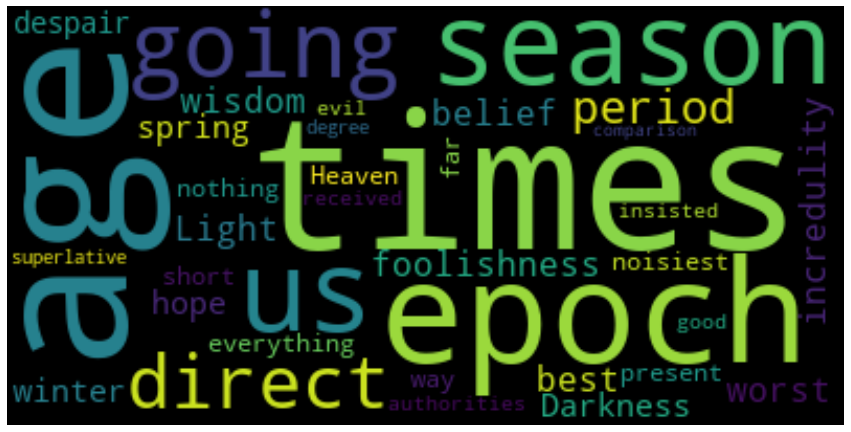

In [ ]:
plt.figure(figsize=(15, 12))
plt.imshow(cloud_two_cities, interpolation='bilinear')
plt.axis('off')
plt.show()

####**9. Entraînons-nous !**
Entraînons-nous à construire différents nuages ​​de mots dans les exercices !

#**Exercice**

####**Votre premier nuage de mots**

+ Nous avons vu dans la vidéo que les nuages ​​de mots sont très intuitifs et constituent un moyen efficace et rapide d'avoir une première impression de ce dont parle un texte.

+ Dans cet exercice, vous allez construire votre premier nuage de mots. Une chaîne east_of_edena été définie pour vous.

+ Il contient l'une des premières phrases du roman East of Eden de John Steinbeck . Vous pouvez inspecter son contenu dans le shell IPython.

+ Le package matplotlib.pyplot a été importé pour vous en tant que plt.

####**Consignes**

+ Importez le package requis pour créer un nuage de mots.
+ Générez un nuage de mots à l'aide de la chaîne east_of_eden.
+ La couleur d'arrière-plan a été spécifiée comme white.

In [ ]:
east_of_eden = """
I remember my childhood names for grasses and secret flowers.
I remember where a toad may live and what time the birds awaken in the summer—and what trees and
seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.
"""

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

+ Créez une figure à partir de l'objet nuage de mots que vous avez généré à l'étape précédente.
+ Affichez l'image.

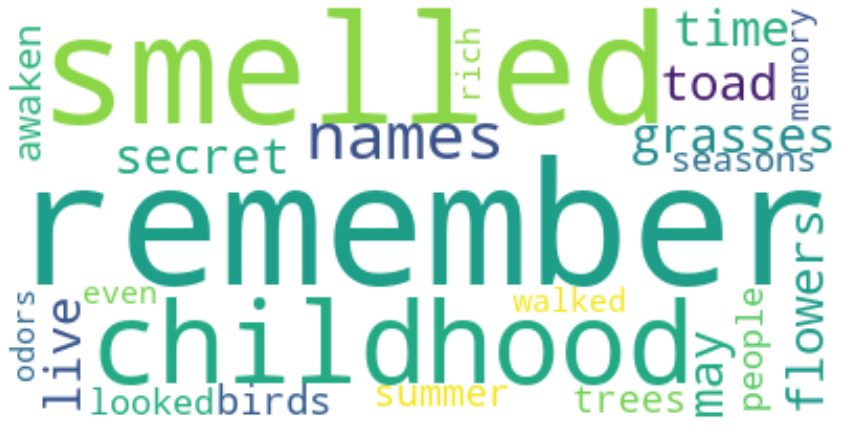

In [ ]:
# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.figure(figsize=(15, 12))
plt.imshow(cloud_east_of_eden, interpolation='bilinear')
plt.axis('off')
# Display the figure
plt.show()

####**Quels mots sont dans le nuage de mots ?**

+ Continuons avec les exercices de nuage de mots.

+ Une chaîne appelée **illuminated** a été définie pour vous.

+ Il contient une citation chargée d'émotion du livre ' Tout est illuminé ' de Jonathan Safran Foer.

+ Générez et affichez un nuage de mots à l'aide de la illuminatedchaîne. Notez que tous les packages requis ont été importés pour vous.

+ Laquelle des réponses suivantes ne contient que des mots que vous voyez dans le nuage de mots ?

####**Des instructions**

####**Des réponses possibles**

+ Triste, autre, heureux.

+ Répétez, discutez, convainquez.

+ **Jour, pire, d'autres.**

+ Savoir, chose, tout.

In [ ]:
illuminated = """
I am not sad, he would repeat to himself over and over, I am not sad.
As if he might one day convince himself or convince others --
the only thing worse than being sad is for others to know that you are sad.
I am not sad.
"""

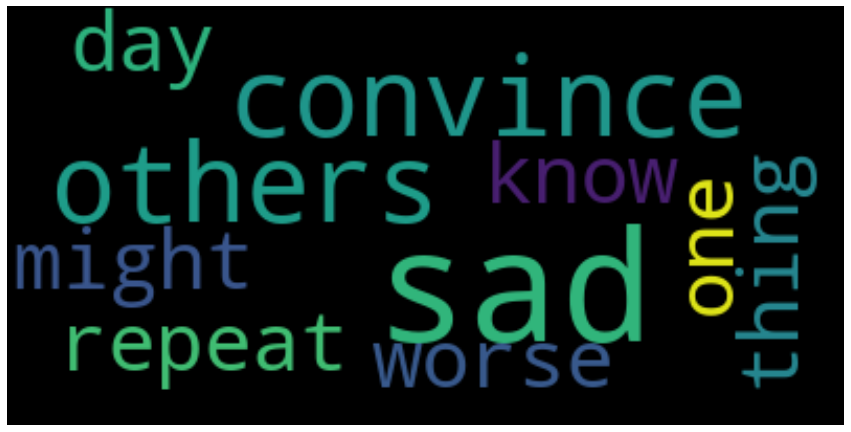

In [ ]:
# Generate the word cloud from the east_of_eden string
cloud_illuminated = WordCloud(background_color="black").generate(illuminated)

# Create a figure of the generated cloud
plt.figure(figsize=(15, 12))
plt.imshow(cloud_illuminated, interpolation='bilinear')
plt.axis('off')
# Display the figure
plt.show()

####**Word Cloud sur les critiques de films**
+ Vous avez travaillé avec l' ensemble de données sur les critiques de films . Vous avez exploré la répartition des avis et vu combien de temps durent les avis les plus longs et les plus courts. Mais de quoi parlent les avis positifs et négatifs ?

+ Dans cet exercice, vous vous entraînerez à créer un nuage de mots des 100 meilleures critiques positives.

+ Quels sont les mots qui apparaissent ? Ont-ils un sens pour vous ?

+ La chaîne descriptions a été créée pour vous en concaténant les descriptions des 100 meilleurs avis positifs.

+ Un ensemble de mots vides spécifiques au film (mots très fréquents, tels que le, un/un, et , qui ne seront pas très informatifs et que nous aimerions exclure du graphique) est disponible en tant que my_stopwords.

+ Rappelez-vous que l'argument interpolation rend le nuage de mots plus fluide.

####**Des instructions**

+ Importez la fonction wordcloud à partir du package respectif.

+ Appliquez la fonction de nuage de mots à la descriptionschaîne.

+ Définissez la couleur d'arrière-plan sur "blanc" et modifiez l'argument stopwords.
+ Créez une image wordcloud.
+ Enfin, n'oubliez pas d'afficher l'image.

In [ ]:
descriptions = """

'{rant start} I didn\'t want to believe them at first, but I guess this is what people are talking about when they say South Korean cinema has peaked and may even be going downhill. After the surprisingly fun and moving monster movie "Gwoemul" (aka "The Host") of 2006-- which actually succeeded in making a sharp satire out of a B-movie genre-- successive Korean blockbusters have become more and more generic, even though their budgets (mainly spent on special effects) have become more and more fantastic. Do South Korean movie-makers really want to squander all the audience and investor goodwill, which their industry has built up since the 1999 break-out film "Shiri/Swiri", by making a whole series of big budget mediocre movies like mainland China did? {rant end}<br /><br />The only "reason" I can fathom for making this movie is to dupe the investors into financing the most detailed and fluid digital animation of a Korean/ East Asian-styled dragon I have seen to date, for the final scenes. Now if they had introduced that dragon at the beginning and given it more personality and purpose like in the 1996 "Dragonheart", the movie might have had a few more redeeming qualities other than having lots of digitally animated dragons. Remember "Dungeons & Dragons" in 2000? Hasn\'t anyone learnt that the trick is not how MUCH special effects you use, but how WELL you use it? I hope there are more (and better) Korean legends they can use, because they have just killed a lot of international interest in Korean dragon legends with the way they filmed this one.<br /><br />In short, I agree with all the negative reviews gone before and wonder how Koreans felt about having their folk anthem "Arirang" being played at the very end. As a creature feature, I would have given it at least 5 stars out of 10 if the special effects or action sequences had been worth it, but I\'ve seen many video games with better camera work and scripting (just less dragons). zero day is based of columbine high school massacre. and its a video diary of two boys. at first you don\'t know whats going to happen you think it is just a bad student film. until they start talking about the horrible things they are going to do in this quite school. until they start talking about pipe bombs and guns and going shooting in the woods. they is a lot to say about this movie. all know this film is well a film you forget you watching a film and watching a real video two boys made.<br /><br />the two boys act like they are in a weird cult. they burn all there stuff. like play station games books dvds homework stuff school stuff. these two boys can be anybody your friends you brothers or the people you see walking down the street. it goes through there daily actives (and that is making a gun. in the videos they make it mentions the bullying that happens to them and how people said stuff about there clothes and the things you are into I\'m not saying its right but many people do do things like that.<br /><br />and also the thing is with this people are suspected to like it because of the sensitive topic they have chosen on this film.<br /><br />so thats my review on zero day.<br /><br />and lets just say the end shooting scene is messed up. you have a strong stomach. Holden was actually 55 years old at filming but looked near 70 and he only lived another 8 years. At one point Holden said, "I am over twice your age." Okay, try triple grandpa! The "old enough to be your father" theme they were shooting for didn\'t work. Granted senior citizens sometimes wind up with legal teens. More power to them, but that doesn\'t mean I want to watch it. It\'s not a matter of judgment but the digestive track. I like my food where it belongs. Lenz is fun to watch and the 70s cars, clothes, furniture, etc. make it worth it if it comes on cable late at night and you want to watch something to wind down for bed. It would have been nice to see the blonde friend of Lenz, the one who hocked her guitar, get more scenes. Pleasingly spacey... Who was this chick? I\'m going to try and find out. yes i have a copy of it on VHS uncut in great condition that i transfered to DVD and if anyone one wants to bring back the memories of a Christmas classic please emil me at dmd2222@verizon.net.i searched everywhere and i found nothing on this and i thought that i cant be the only one on this planet that has this classic on tape there has to be other people and if they do i fit in with them being that very very few that has this classic so i consider myself lucky and i have all of the muppets Christmas except one that john denver did with the muppets again i thinks its called a smokey mountain holiday im not to sure but its close. yeah cheap shot i know, but this movie is a great example of how a collection of signifiers of \'deepness\' (political turmoil, love/lust) can be combined haphazardly to great critical acclaim (see also \'american beauty\'). kaufman\'s movie plods along with gratuitous sex scenes interspersed with often painful dialog sequences (in one scene i counted three different \'generic European\' accents affected by the actors) and displays of state might run amok, yet fails to tie them together into the coherent meditation kundera offered. and in its over-long three hours it manages almost completely to gloss over franz,the missing fourth piece in the love triangle that lies at the heart of the plot, and in this manner sacrifices the novel\'s central mechanism of displaying the spectrum of emotions and of power relations that obtain in love affairs. it also fails to even include token screen time for tomas\' son, used in the novel to exemplify some of the political points kundera was making in the novel. combined with the overweening soundtrack, these flaws make this movie\'s three hours unbearably weighty in tone yet light in content. wow! i watched the trailer for this one and though \'nah, this one is not for me\'. i watched my husband and our friend\'s faces during the trailer, and knew this was a \'boy movie\'. i mean, hallo! a bunch of chick barmaids that dance - another striptease?<br /><br />then, i started watching it, it didn\'t look all that bad. so i carried on watching. i watched it right to the end. what an awesome movie. if anything, this is a chick-flick. these girls have attitude. it is really a feel-good movie, and a bit of a love story. really leaves you with a nice feeling.<br /><br />basically, the story of a small-town girl making it big in the city, after going through the usual big-city c**p. there have been a couple of these, it is almost a new urban legend. but it also makes you think of your life, and what you have achieved. well, me anyway. i think it is because the whole working in a bar scenario is very familiar, not just for me, but for many people i know. Don\'t trust the trailers for this one - it is aimed at bringing the men in. where would one start a review of the film Snitch\'d? James Cahill, god rest his soul, made one of the most daring insights into the human psyche since Encino Man. his beautiful story unravels around a drug squad cop McClure, which is a name synonymous with a character from the simpsons who also happens to be an actor! said cop delves deep into the underworld that is high school drug taking, and discovers a gang war to rival that of Police Academy 1, and i mean the one where Jones is racially vilified by his new partner, but manages to come out with some of the funniest sounds you will EVER HEAR.<br /><br />Cahill\'s grasp of effects, both visual and aural is electrifying, the slight pause between action on screen and from the speakers adds to the drama that is snitch\'d, a real gritty like underground thriller. also, kudos to his brilliant use of makeup, such as the supremely convincing burn marks a gang member suffers in his showdown with an indoor barbecue! YUCK! i feel the world of film is much less from James\' passing, his memory will linger on and on and on, reborn with every passing mention of his flagship production, Snitch\'d. his insightful director\'s commentary released a coke-hit up the nose of any discerning film goer, truly appropriate with the harsh reality that is life on the streets, captured in all the beauty of a roughneck punk knocking over a rubbish bin in a brawl.<br /><br />but i ask you, why did the big bosses swimming pool look so cheap? i\'ll tell you why, because thats life in Santa Ana baby, its not all drive bys and hastily constructed principle\'s offices, oh no. there are some folk who must infiltrate the soft, tattooed underbelly of street life in LA to kick their way through in moves that would not seem out of place at a School For Special Children\'s production of Double Dragon: The Play.<br /><br />the only qualm i have with this film, is that there was never a sequel made. come on Steven Spielberg, come on George Lucas, come on guy that made revenge of the nerds 1 through 23, how hard could it be to step it up a notch and pay tribute to this great man, James Cahill.<br /><br />he discovered Eva Longoria you know. oh yeah, that he did.<br /><br />Jonah when my sister said this movie was gonna be good i had second thoughts but i watched it and it was actually funny. basically the movie is made of a weird girl who goes to a small town where no one likes her and she just wants to go there and get the reading of her aunts will don so she can go. but its not all that easy. In this movie you will come across hilarious humor, a witch, a book of spells/recopies, a mentally challenged uncle and a dog. You will understand the meaning of the word freak a after anyways i hope you run right out and try to find this really old movie. hope you like it in total i will have to give it a 0.... no I\'m totally joking ill give it a 9 hope you understand that you will laugh, you will scream and you may just be offended.<br /><br />love yours truly: Dakota you can email me at dakota_loves_it@hot mail.com if you wanna when discussing a movie titled \'snakes on a plane\', we should point out early that the snakes are pretty darn important to the plot.<br /><br />what we have here are very bad cgi snakes that neither look nor move like real snakes. snakes are scary because they appear to be slimy, they crawl they slither. these snakes do nothing of the sort. they glide along like they would in a video game. they are cartoon snakes. i would go as far to say that even someone that had a major phobia against real snakes would not find these ones scary<br /><br />why on earth then would you want to include extreme close ups of these cgi failures? why not rely on suspense.. the whole \'less is more\' ethic. or better still, why not just make them look good in the first place? and then maybe still use them sparingly<br /><br />take one look at john carpenters \'the thing\'. here we have real slime, and gore of eerie proportions. 20 years go by and we get this pile of stinking sfx crap \'snakes on a plane\'. when are these people going to wake up and smell the coffee? special effects are going backwards!<br /><br />sure you could say.. but the movie is a joke, get it? sure i\'m with that idea, but do it well! in addition to the above, this movie has crap dialogue. and the music and sound effects are not creepy or memorable in any way.<br /><br />i could handle every other actor being part of this movie, except for jackson. what was he doing there? the man who starred in pulp fiction 10 years ago. is this career progression? are you offering people value for money? no. i\'d like to know what Tarantino thought when he was half way through this stinker of a movie<br /><br />the current generation seem to have very low expectations. and Hollywood seems to be offering them just what they want. on leaving the cinema i saw a number of advertisements for some truly horrendous looking future releases including... DOA: dead or alive, (another) cgi animal film called \'flushed away\', and another crap looking comedy named \'click\'. in addition to that i saw some awful trailers, including one for (another) crap British horror/comedy. i\'ve truly not seen the movie industry in a mess like this for a long time<br /><br />expect to see this movie for sale in the DVD bargain section for Â£1 in 6 months time. and if you\'re expecting to see a black comedy with tonnes of great looking snakes, and some bad ass cool dialogue coming from samuel l jacksons lips. forget it. what kind of sh*t is this? Power rangers vs Freddy? It was watchable and as good as the first film in the beginning but from the part where the protagonists get super powers in theirs dreams, it started to become childish. This sh*t should have been rated PG or PG-13 rather than R. I expected to see some very mature stuff but it was only for the 1/3 of the film. The rest are for little kids. Plus it\'s focused too much on Christianity. I know Freddy\'s a demon but there are many religions that have different ways to fight demons. Why does it always have to be Christianity? This is total Orientalism and filled with white men/westerner\'s superiority. Don\'t\' watch this, show it to little kids who loves power rangers. well, i said it all in the summary, i simpley adore the movie and the cast...i would give each actor an Oscar...great, great movie...i\'m 25 now and i watched it 4 times in different periods and i always think i won\'t cry and i always do, about 2 or 3 times...;) meryl s. was absolutely brilliant, jeremy irons also..just brilliant...i wish the movie received more awards... i really don\'t know anybody who watched it and didn\'t loved it... also, glenn close was fantastic... the story was beautiful and sad at the same time... i loved the fact that despite everything clara and esteban loved each other so much, and how blanca was close to her parents... well its official. they have just killed American Pie. The first 3 were absolutely hysterical, but this one and the others have been awful. I mean the story is about two college fraternity\'s who battle each other for its houses, I mean come on talk about a weak plot, the first three dealt with growing up, change and marriage, which are all worthy points of development in human society.<br /><br />The new Stifler is the biggest joke, I know its hard trying to compare yourself with the Steven Stifler but so no cigar. I give this movie a 3 because there is 2-3 funny bits in the film.<br /><br />The best character in this movie of course is Jim\'s dad i don\'t know why he keeps continuing to do these poorly developed films. well done giving the perspective of the other side fraulein doktor captures both the cost and the futility of war. excellent acting especially when german high command refuses in the name of chivalry to present medal kaiser ordered struck. the scenes of carnage are probably too intense for effete US minds who\'d probably prefer some silly speeches and senseless abstractions like 14 points or the league of nations. real americans might appreciate the story line and the action. for all the action and intrigue, fraulein doktor compares favo(u)rably to Jacob\'s Ladder. warning:It contains spoilers. If a movie starts with a sex scene then it\'s a bad movie. (see for example 300). This one confirms the above lemma. The second scene constitutes the spinning center of all the action. The fact that we know the end makes the movie boring. Even more, other plots are revealed as the story goes back and forth several times. And this made more frustrated. To compensate the consequent lack of suspense, we learn more and more about how unbalanced are the characters. And oh yes, they have lots to show. Andy (P.Hoffman), for example, is a drug addict, more?, he is cheating his wife, more?, he plans to rob his father, more?, his wife is cheating with his brother, more?, he doesn\'t regret his complicity to his mother\'s death, more?, he is a serial killer, more? etc etc it\'s not enough space to write here... I wonder how could he have a top job. And why his wife didn\'t leave him before. On the other hand I enjoy much the performances of the actor Hoffman.<br /><br />Even here PSH saves what is left from my 7$ spent for this absurdity. Why absurdity? Because it doesn\'t have sense, why should I care for the despicable characters? Another broken lemma is that a movie should have a sympathetic( at least pleasant) character. <br /><br />Also it\'s a lot of sentimentality, for example we are supposed to care for the sufferance of the widowed father without knowing anything about the parents\'lives before the crime. very few chess movies have been made over the last couple of years ,but this one is more than just a chess movie its a story about the need to be loved and the need to win it,John Toturro plays a psychologically challenged man ,nothing matters to him accept 64 squares and 32 pieces ,the game validates him as a person ,when he looses a game he looses the one thing that makes sense to him and John Torturro expresses this in a beautiful fashion,even the love of a woman was not enough to save him from his sad existence.It makes you wonder if there other Luzon\'s out there who obsess about the game,i am sure they are,if you are a chess enthusiast it won\'t hurt to watch it.Its an intelligent piece of work laid out properly and executed well,it achieves its objectives,unfortunately i doubt if there will be sequel. very badly made film, the action/violence scenes are ridiculous.<br /><br />1 point for the presence of Burton and Mastroianni + 1 point for the real tragic event of the massacre of the innocent italians: 2/10. to communicate in film essential things of life - like what is life, does it have a meaning? - is sheer impossible. Of course possible answers to these questions are demonstrated in every film (story), but communication needs a direct appeal to consciousness. This happens if the input from the senses overrules the "input" from our mind, i.e. our thoughts. Few directors know how to communicate essential things. Tarkovsky, is one. His "Stalker" shows images of existence, communicates life as it shows itself and yet escapes your mind. I think De Zee and De Graaff do the same. this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama. this was one of the funniest and informative shows that I have ever seen. This is a MUST see for anyone over the age of 16. this show had me and my 2 boys laughing out loud from the beginning. I don\'t know if everything on the show was true but the way it was presented left little doubt that Mr Wuhl was not only very knowledgeable but he also had a blast presenting this information to the very lucky college kids who were in attendance. If Mr Wuhl ever decides to do this format again they will have to rent a building the size of the Georgia Dome to hold all the people who will want to see it. I agree with the idea of making this a HBO series. It would have an amazing following this was a very good movie i wished i could find it in vhs to buy,i really enjoyed this movie i would definaetly recommend this movie to watch i would like to see it again but can never find it in tv, it would be well worth the time to watch it again this was a real guilt pleasure ... i saw the trailer and all the advertising, so i figured \'why not check out this vh1 movie?\' and, as they used to say on t.v., \'i can\'t believe i watched the whole thing!\' quinn and harris were believable beatle boys, and, although the accents were sort of over-the-top and difficult to decipher at times, i found the dialogue believable as well. the film touched upon the tenuous relationship of len/mc and showed how, deep down, they were simply two guys who grew up close together and shared a passion for music - coming at it, though, with different sets of issues and personal needs. you find yourself wishing they\'d hopped in the cab to snl for an impromptu reunion that would have knocked the world\'s socks off, but you also gain a greater appreciation for why they didn\'t this short film trailer is basically about Superman and Batman working together and forming an uneasy alliance.obviously,the two characters have vastly differing views on how to deal with crime and what constitutes punishment.it\'s a lot of fun to see these two iconic characters try to get along.i won\'t go int to the storyline here.but i will get into the acting,which is terrific.everyone is well cast.the two actors playing Superman and Batman are well suited to their characters.the same filmmakers that made Batman: Dead End and Grayson also made this short film.of the three,i probably liked this one the least,but i still thought it was well done.for me,World\'s finest is a 7/10 this movie, i won\'t call it a "film," was basically about nothing and functioned mostly for the popular acts of the time. yeah the war was on full swing (pun intended), and this movie gave the troops and our audiences a treat.<br /><br />but let\'s have something with a bit more substance.<br /><br />loved seeing a young Buddy Rich on the drums. the music was good throughout.<br /><br />but one cameo after another gets old fast.<br /><br />i didn\'t even recognize Zero Mostel! so if you\'re one from the "greatest generation," as they say, you\'ll definitely enjoy this...<br /><br />movie. this movie was so gay like its a mom and son cat that have sex, they also get scared of little kitty cats. they get set on fire by them. the mom cat alien thing kills a guy by stabbing him in the back with an ear of corn? they are bullet proof. invisible. and what not. the star of the movie, Clovis, is the cops cat, Clovis leads the cops to find the mom alien, and after the mom kills the cops, Clovis kills the mom by eating her head then she catches on fire. this movie sucks. it was way way more funny than it was scary, it wasn\'t even scaryt at all. the girl hits the alien on the head with a camera, it knoks him out. she then goes and hugs her. the then grabs her and begins to rape her. once again, Clovis comes to the rescue this movie was just plain dumb i do not think it was scary at all i went in hoping to be shocked and scared but was mostly laughing some of the scenes were just to fake and thrown together blood scenes were extremely over cg and some of the mutants were ridiculously gay looking it also sucked because the acting was just plain horrible u think they could get some good actors and most of the characters i hated just because how stupid and lame they acted even though they were supposed to be in the military i get to watch movies for free and seen many people walking out im guessing because it was so dumb kinda glad i didn\'t have to pay for it in short DUMB ASS MOVIE don\'t see it...but then again thats my opinion this movie was horrible. I could barely stay awake through it. I would never see this movie again if I were payed to. The so-called horror scenes in it were increadably predictable and over played. There was really nothing about this movie that would have made it original or worth the $7.50 I payed to see it. Don\'t go see it, don\'t rent it, don\'t read about it online because any of these things would be a complete waste of your time. Sarah Michelle Geller gave a lackluster performance and really should be ashamed of herself for sullying her good name with this movie. Shame on you Sarah for being associated with this horrible, horrible movie. Horrible movie, no need to ever see it. this movie was banned in england? why? tom savini, george romero, dario argento, lucio fulci and others had done far worse before and have continued to so since...<br /><br />this movie has all the basic elements of a decent 70s or early 80\'s horror film. good looking girls (who can\'t act to save their lives, by the way), a terrible lightning storm with a torrential downpour, a scythe, a crazy brother wandering around the family estate, and actually a pretty damn good twist at the end. but banned? seriously. when the English parliament banned this movie, the italians probably laughed their collective asses off at how backwards and prudish the brits really were.<br /><br />there was maybe two minutes of total screen time devoted to the violence and gore (which was greatly underdone). there was nudity but no sex although allusions to sex were made, obviously. but absolutely nothing worthy of being banned.<br /><br />i would like to see what could have been done if the filmmakers had a decent budget to work with. as it stands, the film is entertaining, but the lack of picture and sound quality take away from the end result.<br /><br />banned... what a joke... this movie scared me so bad, i am easily scared though so its no big thing but this movie was scary and whoever wasnt scared by this movie, im surprised because everyone i know said it was scary, i hope everyone sees it, but dont see it with the lights off like i did.... this movie let me down decidedly hard. it was a great concept that was ruined with a horrible script. The story just didn\'t flow and was disjointed at best. There were so many elements to this story that were not explained, or were forced into place with out any real thought. elements like the love story could have been expanded on a bit more, and the cannons need to be written in better. the whole main character growing up thing needed more about the training he was receiving and less standing around. everyone likes a good "little guy overcomes" story and this showed promise but with the scripting failures wasn\'t to be. While it did have some pyrotechnics in the final battle sequence it was lackluster due to a lack of choreography. this made for a maddeningly boring watch<br /><br />it could have been so good :( this movie is not porn, it was not meant to be porn, and unless my uncle runs for president of the world it should never be considered porn.<br /><br />now that that issue was sorted out, i can say i thoroughly recommend this film, as it\'s issues are still widely available. it\'s funny, the acting is great and it raises serious(curious) questions.<br /><br />i can\'t fully understand why this film was so mistreated, probably this is why i plan to never visit the us. Lena is the true pioneer of the modern riot-grrrl movement, confusion, curiosity and wit are her main attributes, she is occasionally angry, but aren\'t we all? this movie is made for Asian/Chinese market, targeting particularly fans of Jay Chou, one of the biggest music star in Asian.<br /><br />Jay Chou is a very talented song writer/singer. He is mediocre as an actor, although he did appear in several big-budget productions ("initial D", "Curse of the Golden Flower "). Amazingly, he won both golden horse (taiwan) and Hong Kong film awards for "initial D".<br /><br />The supporting cast are very well chosen, which appeals basically everyone from China. The cast including many famous movie/TV actors, singers, even sport commentator (Huang Jianxiang from China). However, they were not given enough time to show their talents.<br /><br />The biggest mistake is that Chu took over both director and writer position. He has a reputation of making shallow and brainless movies based off non-coherent scripts. With his poor directing and lam story, the whole talented cast, fancy vision effects and tones of production money was wasted.<br /><br />However, the terrible movie successfully cashed in over 10 million dollars, maybe even more in Asian, which made this one of the biggest box office success in Asian.<br /><br />The bottom line is: you can watch this movie only if you want to see how money and talents are wasted, or if you are simply accompanying your kids who are fans of Jay Chou. this movie is awesome. sort of. it dosent really say much, or do much, but it is an awesome movie to watch because of how stupid it is. the high school is taken over by evil ms.togar that hates the one thing that all the students love, rock& roll. riff randle get everyone tickets for the ramones show, and this movie peaks with a take over of the school led my riff randle & the ramones. this movie has everything, a bad script, questionable directing, bad actors(ie clint howard & p.j. soles), an awesome soundtrack,extreme campyness, these elements & much more come together to make this what it is,a classic.<br /><br />note - during the live ramones set, notice that darby crash of the germs is in the front of the crowd. neat-o. this movie has no plot, no character development, and no budget. it really sucks to put it in short terms. Since there is no development for the movie, it really can\'t even be looked as trying to be artistic or trying to make a statement against torture. Which leaves two other reasons to possibly watch it. To be shocked or to get off on it like a sick little freak. Well it falls short here too. The girl\'s reactions just seem dumb. it\'s extremely easy to tell that it\'s fake (honestly professional wrestling looks more realistic than the crap they try to get by with in this movie. They throw innards on her, but she\'s asleep for most of it, so it\'s just kinda dumb. The only really kind of worthwhile part is the end when they quickly cut from scene to scene just before the needle goes into her eye. But honestly the girl is extremely ugly and everything is incredibly fake, with the exception of the eye. if you want a good movie about torture, go watch Hostel and Hostel 2. Not only do they both contain realistic violence, but there is also an actual storyline that draws you in and makes you care about the people. Plus the tow movies really work on a deeper level considering themes like American fears of foreigners, issues of morality, testing how far a person can go, human instincts vs. civilization, and many other things. Plus they are carefully written and contain some good humor when the story isn\'t focused on the violence. These are much better choices over this piece of crap this movie has lot of downsides and thats all i could see. it is painfully long and awfully directed. i could see whole audience getting impatient and waiting for it to end. run time is way over 3 hrs which could have been edited to less then 2 hrs.<br /><br />transition between stories is average. most people confessed being on seating expecting something better to come out.<br /><br />its funny only in pockets. ambitious project and a below par execution. govinda does a fair job, anil kapoor disappointed me, rest we as expected. if u r expecting anything close to babel or love actually then its no where close. this movie begins with an ordinary funeral... and it insists so hard on this ordinary funeral feel that i lost interest within 5 minutes of watching, and started skipping scenes. it seems to me whomever made this movie is afflicted to the extent of becoming trapped in a permanent morbid trance, unable to contemplate anything else but death and destruction. well, i ain\'t one of the dark kids from Southpark, i want a movie that within 10 minutes gets me well into an interesting story, i won\'t sit and watch 10 minutes of nothing but preparations for a funeral.. my grandma on her last years was fascinated by funerals, perhaps she might have enjoyed this "movie". this is what you would get if you allowed a 10 year old (manic American) to write a story of a moon trip. Absolute garbage with no redeeming qualities Maybe it held some fascination in the 3D dept. but as a narrative and entertaining animation it held nothing to make wasting an hour and a half worth while. Save your time and money and watch BOLT instead<br /><br />Damn. Not enough lines, yet I feel that sums it up... well, I agree with an above review - this is like a cold-war propaganda story. Maybe it would have been more interesting if they had made it about the flies uncovering the hoax of the moon landing, or if the flies had died in the first minute. BTW - why were all the main character flies deformed? - not one had the full compliment of limbs! this is the worst movie i\'ve ever seen. i\'m not kidding. the next time it comes on, i will just continually run my head into a wall. it would me more enjoyable to sit in an emergency room trying to explain to a doctor why my brain is swollen than attempting to make it through this movie again.<br /><br />i hope that black and stiller never work together on a project this bad again. they are both good comedians, so i was shocked this was so awkward.<br /><br />if they had to do it all over again, i\'m pretty sure that they would decide to not do it. the folks that fronted the money, must have lost a ton. not really- because the special effects (all 2 of them) were terrible. this is the first time I\'m writing a comment on a movie on IMDb. but i had to write it for this one. its 3 hrs of unadulterated torture. from the starting u get the idea that the movie is gonna be bad. the acting is pathetic. I\'m a big fan of Ajay devgan (loved him in bhagat singh) but he is at his worst in this movie. amitabh seems to have worked hard for this one, but somehow the fear is missing. prashant raj is a non actor. and the most irritating part of the movie is nisha kothari. i have no clue why the director took her in this movie. the background score is repetitive. somehow i felt that ramu tried to repeat a sarkar, the color theme, the background score, the camera angles, but it didn\'t work. PLEASE Don\'t WATCH IT this is really films outside (not in a motel room). With real costumes (not only strings and swimsuits). You have to see this movie. it\'s the only porn movie I know that is worth watching between the sex scenes.<br /><br />Bon Cinema<br /><br />Laurent this is one of the funniest shows i have ever seen. it is really refreshing to watch and i was in stitches many times. i guess there is a social awareness factor to this too which makes it quite interesting. if these were white girls would they get the same reaction? maybe they would, maybe they wouldn\'t? the characters know no limits (check my lyrics) and do not exclude anyone from their twisted sense of fun!There are so many funny sketches. my favorites is the bob the builder one. it\'s so silly it\'s genius. if you like twisted black comedy then this is for you. if you like keeping up appearances it probably isn\'t.3 non blonde\'s is yet another hilarious British BBC comedy shown on TV! It is such a funny show and the characters unleashed on the unsuspecting public are laugh at loud funny! It would be impossible to keep a straight face watching the crazy characters and the reactions of the public! This series easily adds to the excellent comedies being produced! this is best comedy i ever seen! but not all can understand this you must be from Georgia to understand this amazing movie! :) overall one of best film i ever seen......... Vachtangi(Benjamin) and all supporting actors playing very very good but acting of Kote Daoshvili (Father Germogel) is for my opinion best acting in supporting role in history of films :)) in this movie playing many georgian stars like ipolite xvichia,sergo Zakariadze,sofiko chiaureli,verikoan djafaridze,Sesilia Takaishvili,Dodo Abashidze.... they all are Stars in Georgian cinematography :) plus in this movie is playing great Russian star Evgeni Leonov and of course Director of the film Georgy Danelia is one of the best...... i recommending this movie for everyone but remember you must know good Russian language to watch this movie this is a piece of s--t!! this looks worse than a made for t.v. movie. and i shutter to think that a sequel was even concieved and the results... war is prettier than this. jean claude van shame has done it again and he wonders why his career is where it is now. no script, no story and no time should be wasted on this. i mean that. 1 out of 10 is too high, way too high. goldberg should be jackhammered for this. van shame is no actor. this is a great movie. I love the series on tv and so I loved the movie. One of the best things in the movie is that Helga finally admits her deepest darkest secret to Arnold!!! that was great. i loved it it was pretty funny too. It\'s a great movie! Doy!!! this is a film about life, the triumph over adversity and the wonders of the human spirit. I defy anyone not to shed a tear by the end of the movie. This is more than just a tear-jerker, its an engaging, thought-provoking drama with excellent performances from all the cast but especially derek Luke and denzel washington. 7 years on, I\'m amazed that Luke is still a virtual unknown and washington only directed one other film. Nevertheless, apart from a slow build-up, the story of this foster child\'s trials and tribulations and how it still affects him in adulthood is the sort of movie that stays with you long after you have seen it. Like many fox searchlight pictures, this was more of a sleeper hit and didn\'t get the mass critical acclaim it deserves. The scene where Antwone finally meets his mother summed up the movie for me, there were so many ways that could have been done and it could have been all schmaltzy or it could have been unrealistic but Washington struck exactly the right tone, his mother never said a word and could only shed a tear, while antowne asked simply why. Her overwhelming guilt prevented her from saying anything, what could she say to defend herself? One of the most moving cinematic scenes I have seen. this independent film was one of the best films at the tall grass film festival that i have ever seen there i loved it there are so many things that was great about the film on top of all that the cast and crew that i had the opportunity to meet were absolutely phenomenal.I thought that Avi did a great job in his role. and Ricky Ullman was absolutely true to his role for a Disney actor i was amazed at his talent to be able to go from cheesy teen comedy to such an adult role with no problems the talent in the film was just amazing the cinematography was just great if you want to see an independent film this is one really that you should see.I think that Mr Gruver would have been so proud to have such a submission in his festival and his parents loved the movie so much when it won the audience favorite they went and saw it again. this truly was a great film it was dark and funny and sad and truly emotional it was just fabulous. I am honestly just so enthused by this film and i really don\'t want to spoil it for any one just see it and truly be amazed at it i think that these film makers really have what it takes to go places and I hope to see more work from them in the future. this film was just brilliant,casting,location scenery,story,direction,everyone\'s really suited the part they played,and you could just imagine being there,Robert Redford\'s is an amazing actor and now the same being director,Norman\'s father came from the same Scottish island as myself,so i loved the fact there was a real connection with this film,the witty remarks throughout the film were great,it was just brilliant,so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch,and the fly-fishing was amazing,really cried at the end it was so sad,and you know what they say if you cry at a film it must have been good,and this definitely was, also congratulations to the two little boy\'s that played the part\'s of Norman and Paul they were just brilliant,children are often left out of the praising list i think, because the stars that play them all grown up are such a big profile for the whole film,but these children are amazing and should be praised for what they have done, don\'t you think? the whole story was so lovely because it was true and was someone\'s life after all that was shared with us all. this film takes you inside itself in the early minutes and holds you till the end. it has a very humane story and very good selected music. The acting of Moritz Bleibtreu (Giancarlo Amato) and Barnaby Metschurat (Gigi Amato) is satisfying. Recommended to people who get bored of action films and want to see a good movie. this film is terrible. The characters are completely unbelievable, and wildly inconsistent. The plot is awful and some of the classroom scenes are cringe-worthy and make for uncomfortable viewing.<br /><br />In fact the quality of the script and characterisation would suggest that this film was written by high school students, only the utter lack of credibility to the school environment would suggest that, in fact, the writers probably never went to high school. The acting in most cases was weak too, although a lot of this was down to a poor script and plot, i am not sure that any actors could have made this film watchable.<br /><br />having said that the sound track was OK, and the cinematography was nice in places (although the editing was poor). this film is quite simply one of the worst films ever made and is a damning indictment on not only the British film industry but the talentless hacks at work today. Not only did the film get mainstream distribution it also features a good cast of British actors, so what went wrong? i don\'t know and simply i don\'t care enough to engage with the debate because the film was so terrible it deserves no thought at all. be warned and stay the hell away from this rubbish. but apparently i need to write ten lines of text in this review so i might as well detail the plot. A nob of a man is setup by his evil friend and co-worker out of his father\'s company and thus leads to an encounter with the Russian mafia and dodgy accents and stupid, very stupid plot twists/devices. i should have asked for my money back but was perhaps still in shock from the experience. if you want a good crime film watch the usual suspects or the godfather, what about lock, stock.... thats the peak of the contemporary British crime film..... this by far one of the worst movies I have ever seen in my life. I gave up to watch it after an hour and regretted that hour a lot. the acting is horrible and there is almost no plot. my guess is that someone came up with a strange shape of an animal and started to make a story around of it. borrowing some ideas from movies like Resident Evil and Aliens doesn\'t result in a movie like them. if this going to be a top Korean movie, I\'d rather won\'t bother to see even a Korean movie trailer...<br /><br />By the way, this movies is a good reason to believe that not necessarily a high rating means the movie is promising. I think every Korean who has internet for online gaming rated this movie over the 8, even though has no clue what it is about. this animated Inspector Gadget movie is pretty lame.the story is very weak,and there is little action.most of the characters are given little to nothing to do.the movie is mildly entertaining at best,but really doesn\'t go any where and is pointless.it\'s watchable but only just and is nowhere near the calibre of the animated TV show from the 80\'s.it\'s not a movie that bears repeat viewing,at least in my mind.it\'s only about 74 minutes long including credits,so i guess that\'s a good thing.unlike in the TV show,the characters are not worth rooting for here.in the show,you wanted Inspector Gadget to save the day,but there,who really cares?anyway,that\'s just my opinion.for me Inspector Gadget\'s Last Case is a disappointing 3/10 they have sex with melons in Asia.<br /><br />okay. first, i doubted that, but after seeing the wayward cloud, i changed my mind and was finally convinced that they have sex with watermelons, with people dead or alive. no safe sex of course. the (terrifyingly ugly) leading man shoots it all into the lady\'s mouth after he did the dead lady. never heard of HIV? guess not.<br /><br />the rest of this movie is mainly boring, but also incredibly revolting. as a matter of fact, in parts it got so disgusting i couldn\'t take my virgin eyes off. sex with dead people! how gross is that? and what\'s the message behind it all? we need water, we need melons, we need to be dead to have sex? sorry, but this stinks! there should be a sub-genre in the Western called \'the Robert Mitchum Western\'. Mitchum\'s brilliant, idiosyncratic, usually undervalued Westerns import his film noir persona to etch some compellingly dark character sketches, and bring an elegiac world-weariness more familiar from the films of Sam Peckinpah. \'Man with the gun\' is one of his best. Directed by Orson Welles protege Richard Wilson, it is a stark, monochrome beauty, full of chilling silhouettes and terrifying outbursts of savage violence, as Mitchum comes to tame a town terrorised by a monopolist with a private army. Mitchum\'s regression from soft-spoken stranger to deranged murderer, with a host of dark emotions in between, is a marvel of expressive, physical acting. there are three kinds of bad films - the cheap, the boring, and the tasteless. the only really bad movies are boring and tasteless. <br /><br />boring films are just, well, boring - if you don\'t leave quickly enough, you fall asleep.<br /><br />tasteless films actually have their defenders; but the fact remains that they are masturbatory aids for very sick people.<br /><br />only the cheap bad films are really funny, because the filmmakers wanted to make their films so desperately, they way-over-reached beyond their abilities and available resources.<br /><br />Bo Derek is just naturally boring and tasteless; fortunately, fate and a lack of funds and skill redeem her by making her seem cheap as well. this film is hilarious and it may well be the last really funny-bad film ever made.<br /><br />i first saw this in a theater, may god forgive me; i was laughing so hard i was rolling off my seat, and so too with most of the rest of the audience.<br /><br />it\'s clear that Derek and her husband-promoter, conceived of this film as, partly, a satire; unfortunately, the dereks clearly lacked any of the necessary resources to pull that off; consequently, the \'satirical\' element comes off as some school-girl\'s impression of some gay young man\'s impression of frank gorshin\'s impression of the riddler in batman trying to pretend he\'s robin - it doesn\'t fly over our heads, it has no clue where any human head might be.<br /><br />on the other hand, there are some supposedly serious moments in this film - it is supposed to be an action film, remember - that are so astoundingly cheesy, one wonders if someone squirted spoiled milk in one\'s eye.<br /><br />as for Derek\'s infamous tendency to reveal her breasts - i can\'t imagine a less erotic nudity photographic display, she is so weird looking with those broad shoulders, i can\'t imagine what any one ever saw in her.<br /><br />as for the plot - such as it is - well, it isn\'t; Derek chases around Africa, and god alone knows why. then her father - Harris - pretends to act in some maniacal puppet-show, and then of course there\'s the hunk\'o\'Tarzan that seems to have wondered in from advertisement without knowing that the subject\'s changed - probably because he hasn\'t seen a script - apparently no one has.<br /><br />negligible camera work, shoddy editing - if it weren\'t for the 3-way with the chimp, the film would be unbearable -<br /><br />as it is, it\'s a real hoot. there are those movies that are bad they are funny, then there are those where you scream "i want that one and a half hours of my life back"...thats pretty much what this is.<br /><br />dean cain tries to be an actor but fails. the sfx are really bad (repeated scenes and rocks that look like falling paper) and the fake plastic guns that have torches taped on them...the split screen effect used to show multiple things happening at once is just terrible.<br /><br />this movie cant even be used as one of those simple night entertainers, its just that bad<br /><br />if i could go negative ratings, i would the only enjoyable thing about this highly mockable movie is playing "guess" that location. What Toronto landmark will stand in for what American/international location.<br /><br />who knew that the anti-christ would be russian? obviously he can\'t be american since we need the yanks to save the day - oh Buck... you\'ll tell us all the truth... you\'ll show us the light... and the way outta the building should those nasty anti-christers get their way.<br /><br />Five golden raspberries. Faith is not enough to hope they don\'t make another of this ilk! We don\'t gotta prayer. the movie opens with a beautiful lady in a tattered white gown running through a stereotypical eastern european town. we know she\'s being followed by something, because she keeps looking behind her. and soon we see she\'s being chased by a mysterious man in a black trenchcoat. then we realize that the man is actually the vampire hunter and he is after her. but look is that her reflection in the store window??? no its just her identical twin vampire! but unfortunately they both get it.<br /><br />after this brilliant and amazingly fun throwback to the old hammer films of the 60\'s and 70\'s (in the credits the twins are listed as the twins of evil, which of course is the name of the final instalment in hammer\'s karnstein trilogy), the plot pretty much dies.<br /><br />What little plot there is involves dracula (who conveniently changes his appearance each time he is reborn, so the producer doesn\'t have to rehire the same dracula) coming to a morgue, the med students realizing he\'s undead and thinking....wow what an opportunity, maybe i\'ll just disregard all those movies that say that drinking vampire blood turns you into a vampire and use the vampire\'s blood to find a cure for our jerk friend\'s ailment. obviously this is a mistake and everyone becomes a vampire.<br /><br />A new concept but pulled off excruciatingly badly. The movie keeps setting up wonderful situations and refuses to do anything with them.<br /><br />For example the med students attempt to bring drac back to life by placing him in a bathtub filled with blood in a secluded run down country mansion. The house itself is scary enough to be the center of the film, but do we stay there? no because they decide to take the vampire to an abandoned swimming pool. sigh. This movie has a real problem with "homages" as i mentioned before the opening scene is straight out of hammer, and this house scene would have been perfect for a hammer-like movie, but the movie rapidly switches gears and changes to a medical horror.<br /><br />The other problem is that they introduce so many characters it is almost impossible to feel sorry for any of them. There are the med students and their wheelchair bound professor-type "friend" the med students are all: arrogant, boring, money hungry, and stupid. how they made it to med school at all amazes me, unless the med school had to meet its muscle bound hunk/big breast quota. and then there is the vampire hunter who remains mysterious through the movie. hey i can respect that but it would be nice if they didn\'t set it up like the movie would be about him. then you have random priests, cops, and science types. so many people are introduced and then quickly forgotten about until they need that person to either save the day or jump out for a cheap scare that it becomes quickly tedious.<br /><br />Basically this is a lazy movie. no real scares, just a few predictable jump scares. The set up for these is so elaborate it is hilarious. for examp le the bathtub full of blood. it is so obvious that drac is going to pop out of the murky blood. and yet we have to wait far too long to get to the inevitable jump scare. after this he kills one of the dumber and larger breasted med students. we all know she\'s going to become one of the undead. but what do the others do? bury her in a shallow grave near the house. sigh, so you know who will jump out at you when the cops show up at the house..........<br /><br />Oh well.<br /><br />Maybe someone will get the hint that it is impossible to make a scary vampire movie and just go for atmospheric, and then we will end up with an entire movie that is as good as the opening scene.<br /><br /> the first Scanners may not have been a great movie,but at least it was original.there is no such novelty to this one.the acting is worse,in my opinion,and the story is slower and nothing special.i also didn\'t like the dialogue.and the special effects are no better than in the original.this is movie is inferior to the first one in all ways.the only thing different about it,is that it is loud and chaotic at times.but that doesn\'t make a good movie.if they had done something better with the story and made it interesting,this could have been a decent movie.i actually couldn\'t get through it all without fast forwarding through it.to me,this is a forgettable movie,and not much more.despite all that,there are worse movies.being in a generous mood,i\'ll give Scanners 2 a 4/10. the characters at depth-less rip offs. you\'ve seen all the characters in other movies, i promise. the script tries to be edgy and obnoxious but fails miserably. it throws in some hangover meets superbad comedy but the jokes are way out of left field, completely forced, and are disreguarded almost completely after they are cracked. the hot chick is old and has no personality, shes just some early thirties blonde chick with a few wise ass non-underwear wearing jokes who is less than endearing. the attraction between Molly (the hot chick) and Kirk (the dorky love interest) is barely communicated. the attraction in no where to be found its a completely platonic relationship until they awkward and predictable seat belt- mishap kiss occurs. afer this they are in a full on relationship and its just incredibly lame. the main focus of this movie is not the relationship, but a failed attempt at making a raunchy super-bad-esquire movie with a semi appealing plot. I could compare this to the hangover, in its forced nature. i wont get into that. i could keep going but its just pointless. just don\'t pay to see this movie. the author of the book, by the same title, should not have let her name be used for this movie. if you have read the book, this movie takes such a liberal interpretation of the actual events in the book and its spirit that the movie and book seem to have quite little in common except the title and some superficial details. the movie adds nothing, in terms of artistic merit, to the book\'s own literary achievement.<br /><br />for those who have not read the book: you will also be disappointed. not only does the plot move at an incredibly slow pace, it doesn\'t offer anything more while it is moving slowly (like character development, for example). some viewers might be entertained by some of the graphic lesbian love scenes later on in the movie, but you might as well watch a showtime special for the stuff they show in therese and isabelle--its fairly tame and not imaginative at all. that kid a is such a babe; this movie was no Titan A.E.(of which it is in many ways modeled after) but still came off as entertaining, the fact this lost to a piece of monkey crap like Tomb raider makes wanna cry; includes some of the most entertaining characters i\'ve seen in disney film terribly underrated with matt dillon and tom skerritt, good backdrop for solid story and some memorable lines, well acted and well cast, tommy lee jones and bruce dern make you hate them with passion somewhere i\'d read that this film is supposed to be a comedy. after seeing it, i\'d call it anything but. the point of this movie eludes me. the dialogue is all extremely superficial and absurd, many of the sets seemed to be afterthoughts, and despite all the nudity and implied sexual content, there\'s nothing erotic about this film...all leaving me to wonder just what the heck this thing is about! the title premise could have been the basis for a fun (if politically incorrect) comedy. instead, we\'re treated to cheap, amateurish, unfinished sketches and depravity and weirdness for its own sake. if i want that, i\'ll go buy a grace jones cd. so, being a fairly deep fan of horror movies, it\'s been a while since i\'ve seen one that really made me jump (or fidget nervously.)<br /><br />definitely going to get this on DVD when it comes out... a hell of a lot better than the ring. the thing that i don\'t get is that so many people that we talkd with after the movie thought that it was horrible, well, if that\'s what you think, then so be it... i know what i liked and it takes a fair amount to get me to actually feel scared, so i have to say that this one is worth watching.<br /><br />now, you might be disappointed in the story if you need everything in a neat and tidy line, because the plot goes back an forth a little bit to help build the story (i think that if it was shown in chronological order, it would have ruined the whole thing.)<br /><br />i\'m actually glad that this movie had very little bloody messes in it... maybe the rest of you studio writers and whathaveyous will realize that you don\'t have to splash the red stuff all over the set to make people afraid. shakespeare\'s plays have a way of transcending time. The language somehow breaks the time barrier. but perhaps it is the actors who really do that.<br /><br />after the disappointment in Romeo and Juliet (the version with Claire Danes and Leonardo DiCaprio), was hesitant take on another modern rendition of Shakespeare. To my surprise Othello was great!<br /><br />Iago\'s character was played so well by the Kenneth fellow! even thoough Iago is really evil and despicable, the character was played so well that it does what shakespeare intended for the charater to be, a pleasure for the audience to hate. i have to say that fishburne\'s performance here was really good as well.<br /><br />i recommend this for shakespeare scholars and lazy students (who refuse to read the book) alike. seriously what the hell was this movie about,,simply stupid,,i\'d give it 0 but,,,1"awful" is the lowest you can go,,seriously this movie is not worth watching,,waste of time, i don\'t know what the hell is wrong with you guys voting this movie 7 out of 10,,i seriously can make a better movie than this , hire some other unemployed people,,\'n i promise i\'ll make a movie better than this,,this movie was so bad,,that i\'ll never watch a movie starring Steve Carrel again,bottom line don\'t waste your time to download it off the net or rent it,,i\'d nominate this movie for the worst movie of the century i mean the worst is Something Gotta give but after that this is the second seriously i loved this film..i had started to read the book and i loved it...the way everything was set up and everything had a purpose...i think this film did so well was because Louis Sachar wrote the screenplay..and of course Andrew Davis directed it...Shia Lebouf gives a great performance for his first film...the storyline is very cool and interesting...there\'s humor, heart and intensity...it is very similar to the book..i find this film to be not the least bit boring...i absolutely loved it...and i encourage anyone to read the book..all in all this film is very well put together and carefully crafted...two thumbs up for me in every single way save your money. i have been a fan of fullmoon productions for a long time and i have never seen them make a movie as bad as this. the casting is terrible, the story is even worse and the special affects are worse than any movie iv\'e seen sence the 80\'s. this movie is so bad i cant even suggest renting it. really excellent movie, one of the best i\'ve seen. Touching and simple - just like life, sometimes you cry sometimes you laugh and it\'s just beautiful. not too much of anything, just as it\'s suppose to be. Really loved the idea of the movie, noone is bad or good, all or just people, sometimes make mistakes mostly because of society\'s pressure, everyone tries to stay strong and some succeed more than others and the most important thing is that you don\'t have reasons to get angry - you can do it, but eventually the anger goes away and then you to need to let love come back in although it\'s hard, there lies the true happiness.<br /><br />Great actors and cast, the movie really gets you into the feeling of the movie.<br /><br />nice nice nice.<br /><br />I recommend to see it, especially if you like to see italians\' life... quote by Nicolas Martin (nicmart) from Houston, TX: "Fine film, but DVD "reformatted for TV", 8 April 2002 - This is a charming and emotive film. On the other hand, the DVD I purchased has been "reformatted to fit your TV" by the clods at Columbia Tristar. There is no excuse for not providing the film in widescreen format, except that Hollywood treats all films like the moronic, disposable trash that it is so used to producing. What a shame."<br /><br />What a (criminal!) shame indeed. However, there is another version out though. See here for details http://www.dvdbeaver.com/film/DVDCompare2/kingofmasks.htm<br /><br />Wonderful performances by the two main actors (The King and Doggie) BTW. question: how do you steal a scene from the expert of expert scene stealers Walther Mathau in full, furious and brilliant Grumpy Old Man mode? answer: quietly, deadpan, and with perfect timing as George Burns does here.<br /><br />I know nothing of Vaudeville but this remains a favourite film, the two leads are hilarious, the script funny, the direction and pacing very fine. Richard Benjamin is very funny as straight man - trying to get at Burns through the window etc. Even the small parts are great.<br /><br />There are so many funny scenes, Mathau messing up the commercial, Burns repeating his answers as if senile...<br /><br />A delight.<br /><br />Enterrrrrr! pokemon the movie was a terrible film. unlike the first one, this is not a good film at all. the graphics were decent but the story was flat and no real drama was built up in it. in the first one the interaction between the characters were decent. the subtraction of brock and addition of tracey was bad. tracey really doesn\'t have much to say or do, and unlike brock offers no comic relief. the only good points is you get to see misty actually get jelous over ash, and her early brooding over being called his girlfriend was entertaining. overall this film isn\'t worth renting and the short movie before didn\'t do anything for me or my wife. and we do consider ourselves pokemon fans.oh well, maybe the next one will be better.cant ge t much worse please, future writers, producers, directors - learn from this movie!<br /><br />never before have i seen such a bold and original tale created for the big movie screen. bold, because the script constantly made a step so many fantasy movies safely avoided - a step to something new, creative and daring. just when you think \'oh, i\'ve seen this before\' or \'i am sure this is what will happen now\' - StarDust would make an unexpected twist and involve you more and more into the story.<br /><br />the actors are great - even the smallest part is performed with such talent it fills me with awe for the creators of this movie. Robert De Niro is gorgeous and performs with such energy that he simply steals the show in each scene he\'s in. Michelle Pfeiffer is the perfect witch, and Claire Danes a wonderful choice for the innocent and loving \'star\', Yvaine. Other big names make outstanding roles. I had the filling everyone is trying to give his best for this movie. But once again, the story by Neil Gaiman, all the little things he \'invented\' for this universe - simply outstanding.<br /><br />I watched this movie at a pre-screening today, a day before the official release, and do hope it will have huge success. There is so much humor, but also tense moments as well as lovely tender scenes. The look in the eyes of Yvaine, the \'frivolities\' of Captain Shakespeare, the passion of Lamia the witch - impressive, unforgettable<br /><br />For me this is the number one entertaining movie of 2007, watch it and enjoy it<br /><br />11/10 - Outstanding<br /><br />peace and love please don\'t rent or even think about buying this movie.they don\'t even have it available at the red box to rent which would cost a $1 & i think its worth less than that.the main reason why i rented this d movie was because Jenna Jameson is in the movie lol between 2-5 min.i will give credit that the movie had hot chicks and quite a bit of nudity but other than that you might as well buy another d horror movie that has the same thing with nobody you know.Ginger Lynn has more acting time in this movie than Jenna & she\'s not even on the front cover of the movie nor her name.i recommend people to watch zombie strippers because you see Jenna almost throughout the whole movie & nude most of the time.this movie is a big disappointment & such a huge waste of time. or: It\'s a bird ? It\'s a plane ? No, look... It\'s a disaster ! or: No need to look up in the sky.<br /><br />or: (... OK, that\'s enough.) If singer tried to make a romantic titanic like movie to crash the box office record, he failed. The SR structure can\'t do this, the dark and restricted color scheme (I would call it "wishi-washi"), the boring usual dialogs, the clown with advanced alien technology, the missing fun and magic, etc. makes the movie completely disappointing.<br /><br />It simply doesn\'t work.<br /><br />The main thing at a character like superman is, that he is a superhero. That\'s the core, the most important thing.<br /><br />Love trouble and a sadly lost depressive Supersoftie can maximal only be a facet in a 2:40 long Superman movie, not the whole time.<br /><br />Because then it is not a superman or superhero movie anymore. It\'s like a (and in this case a very bad and boring) social study, where every 30 minutes a person flies around.<br /><br />That\'s a big difference.<br /><br />This movie is a joke. Holy skywalker, this is Superman, so give us Supervillains, Superaction and the most important thing, Superfun.<br /><br />We want ENTERTAINMENT ! Singer, if you want to make a 2:40 long soul love trouble drama about lost and sadly people ? Then take normal human characters and make a yentl remake.<br /><br />They say: Superman returns. And then, supersadlysoftie stands in the door.<br /><br />Maybe singer has tried to kill the legend without kryptonite, but one bad movie can\'t do this. Don\'t give up, they plan a sequel...<br /><br />Next time singer (and Warner Brothers), make a superhero movie, not a depressive superlame soap, or let it be. A superhero movie means a colorful fantasy with a lot of fun and magic.<br /><br />This movie is like a very cheap chocolate box with a super cover. Yes, technically there are all sorts in, yes, there is a lot of small talks, there are a few jokes, a view action scenes, etc, but the only one what all these worse pieces have in common is their poor quality.<br /><br />It\'s not more than a super boring patchwork and one of the worst movies I have ever seen in my live.<br /><br />The ridiculous cast strategy (Cast them young as possible, so we can make sequels in the next 25 years) gives the rest. Kate Bosworth plays a 22 year old star reporter, she\'s looking like 19. Superman was full five years away, so he slept with her 6 years ago, so she was 16, (looking like 13) and a daily planet reporter, wroting "I spend a night with superman". Warner Brothers, that\'s too much.<br /><br />Routh is not so bad, he is playing a little bit wooden, but the whole movie is wooden, so... ?! Temporary good were marsden and sometimes posey. The rest, forget it. Even spacey, this is not his terrain.<br /><br />Reeve/Hackman/Kidder were acting so easy, with fun. What a difference.<br /><br />The Jesus poses at the end are ridiculous too. What the hell should that be ? The problem here is, they mean this serious, not as a joke. Next time Spiderman or Batman or Ironman falls and rises like Jesus or angels ? Or they speak with god directly. Why not ? They are superheroes, saving human lives every day. So at least one talk with god every week should be possible... Oh my god.<br /><br />Maybe this was not the real announced movie, instead it is from a bizarre dull parallel universe.<br /><br />For the warner brothers this superlame depressive flick will be possibly the greatest disaster in history. Not only because of the money.<br /><br />I understand how difficult it (maybe) was to create and transport some messages or feelings, but showing lone, lost and sadly people isn\'t new and thousands of movies or TV-Shows did it better, in very old or new ones like magnolia. And the flying frogs there were more impressive than this flying superwoman, sorry, superman of course.<br /><br />Singer and WB, that\'s simply nothing. In fact it\'s even more than nothing, it\'s like a black hole that destroys the passion for (comic/superhero) movies and steals us three hours of our life.<br /><br />Mrs. Smilla\'s little brother. (Very angry and green like the hulk.) one of the worst films i have seen to date. Pathetic action scene and really bad acting also do not help. The only good point is Gary busey\'s parts but this does not lift the film very much. it lives up to its B film ranking and passes the test with flying colours. A waste of my money although i found entertaining to begin with its gets annoying after a few watches. i do not recommend this film unless you watch it for free or its a gift. ( a gift you can ask for the receipt and send back for a complete refund).<br /><br />Really BAd.<br /><br />1/10. one of the best low budget movies from Germany! is this is the dark side of new age? if you believe in esoteric, please don\'t watch this movie! it blows all your positive fantasies away. this movie shows that beyond the peaceful faÃ§ade of spiritual soul searching lies a world of extreme transgressions and terror. i hope there will be a 35 mm copy soon! Andreas Marschall\'s first film is just the beginning of a new area, making movies with a few euros! i\'m waiting for the second hit! one of the best ensemble acted films I\'ve ever seen. There isn\'t much to the plot, but the acting- incredible. You see the characters change ever so subtly, undr the influence of the rented villa in Italy, and love. And happiness. The film casts a mesmerizing spell on you, much as the villa does on all the women. Truly "enchanted". okay, but just plain dumb. Not bad for a horror/comedy film. I was reading how people switched it with the Michael version and that is a good trick in my opinion because some grown ups hate horrors and when they see this one it will get them interested in horror films like this one or maybe (never seen it) the horror (possibly comedy) uncle Sam, i\'ll have to see about renting or buying that film but the 2nd is way better then this one but i bought this one on VHS of Amazon and got it November 21, the day before thanksgiving. worth the four bucks, l.o.l. at this film.<br /><br />9/10 obviously has some talent attached, Maria Bello is always great. but this is just a dreary wast of time, portraying every character as someone to be loathed and exploited so someone could make a movie out of an \'interesting\' story. well, i hope they got it out of their systems. unfortunately for the audience, there is no insight, no sensitivity, no context, and really no humanity. which would all be fine, except it has no humor, no horror, no context, and nothing constructive to say about the story it\'s trying to tell. bad things happen, you sit and watch it, you don\'t care, so what? 99% of the time, the words \'based on a true story\' constitute an unintentional warning to the audience. it means the director and screenwriter are lazy and fascinated by some events they heard about somewhere, so they just throw them up on the screen and expect the \'true\' nature of the story to make the audience feel something without the filmmakers having to do any of the work. i hope they had a great time making this movie. it stinks on ice. now don\'t get me wrong, i do enjoy christmas movies. i love its a wonderful life and i really enjoy the versions of a christmas carol with george c. scott and alistair sim. but this particular movie is awful. i think the i love life song the ghost of christmas present sings is especially painful. albert finney sings fairly well in annie. i don\'t know whats wrong with him in this movie but it sounds as though someone is trying to sing through a mouthful of dead gerbils. the only thing that saved this movie for us was shutting the sound off and watching the dance numbers accompanied by the south park christmas cd. note to George Litman, and others: the Mystery Science Theater 3000 riff is "I don\'t think so, *breeder*".<br /><br />my favorite riff is "Why were you looking at his \'like\'?", simply for the complete absurdity. that, and "Right well did not!" over all, I would say we must give credit to the MST3K crew for trying to ridicule this TV movie. you really can\'t make much fun of the dialog; Bill S was a good playwright. on the other hand, this production is so bad that even he would disown it. a junior high school drama club could do better.<br /><br />I would recommend that you buy a book and read \'Hamlet\'. no movie with dennis hopper, gary busey, erika eleniak, tom berenger, dean stockwell, marilu henner deserves a rating under 5 on here. This is a poor mans version of movies like 16 blocks or the timeless Midnight run except the prisoner being transported here is the very easy on the eye Ms.Eleniak. Tom Berenger plays another gruff, maverick military type well and William Mcnamara plays his rookie-about to be discharged foil well. The plot on the face of it is absurd because I lost count of the times Eleniak should have and could have escaped but this is an entertaining feel-good movie and there are good cameos from all of the above actors that keep the movie rolling. This isn\'t really a family movie as there is some swearing and a rare nude scene with eleniak but this is a lot better than some of the other guff that came out around this time. myself and 2 sisters watched all 3 series of Tenko and agree this is by far one of the BBC better series.The whole cast were very convincing in the parts they portrayed and although the 3rd series was somewhat slower it was compelling viewing and my evenings wont be the same without it.No doubt we will be watching it again as it is a series which I would never get sick of watching.Excellent viewing and full marks to the BBC for such a brilliant series and the casting.First rate in all departments and would recommend this series to anyone although some age limits must be considered because of some adult material.So grateful to the BBC for releasing this series on DVD and Video. my wife is a fanatic as regards this show. That being the case I bought her seasons one through three and season four is on order. I personally think the show is one big farce the cast is equally bad. Alyssa Milano should have stuck to the other trash movies she made such as Poison Ivy, Embrace of the Vampire to name a few, the other female supporting cast members are equally inept in their portrayals. I\'ve seen better special effects in the old Republic Pictures serials I saw as a child. I can understand why the male leads remained on the show for such short periods of time even though I don\'t know if it was their own choosing or not. Please. please don\'t renew for another season as enough is enough, Bob my friend bought the movie for 5Â\x80 (its is not even 1 cent worth), because they wrote it was like American pie. but we would soon find out that there is a long way from American pie to that piece of crap. it is not even a comedy, its more like a really really really bad documentary. not only the story is bad, the picture and sound also sucks to. they put in some alcohol, chicks, dwarfs and drunken teens. and the result is a disaster. if you see this movie don\'t buy it, rather spend your money on something else, and better. if you are gonna torture yourself, then don\'t invite your friend/s, unless you hate really much and you want to get rid of them. maybe i need to have my head examined,but i thought this was a pretty good movie.the CG is not too bad.i have seen worse.the look of the creatures(and by creatures i mean the good and the bad snake)was pretty cool.the action scenes involving the snakes was really good,i thought.there are some lapses in logic at times,and the story doesn\'t always make sense.but for a creature feature,there are a lot worse.a lot of the other creatures seemed lifted from other movies,so it\'s not wholly original.i think the gist of the story is original though.there is a bit of similarity to Godzilla(the Big budget American version)which liked a lot.i didn\'t like this movie as much,but i still say it was pretty good.i also liked the music.all in all,i think Dragon Wars is about a 7/10 let me first say, i watched this movie around midnight, and usually there only is trash around this hour, but this movie broke the record<br /><br />first of all the main character is an old non attractive creepy guy, yet he gets to f*ck all girls that come on his path for example he goes to a shop, talks to a girl and then you see them f*ck<br /><br />secondly there are loads of sex scenes, and in many of them there is no nudity at all, i would not have been surprised if one of the characters in the movie would say: fast put your clothes on so we can f*ck!<br /><br />thirdly this movie should show what a sexual addiction can do to a man or a family, this movie only shows soft bad acted erotica it makes me wonder why those actors agreed to play in such trash just watched it, me and my better half could not believe how awful and badly acted it was. If anyone else thinks its good then you must be easily pleased. I actually gave up a night out to watch this, its all been done before. IE. hostel springs to mind, but at least that did not make you cringe with the bad acting and lack of story line, same old stuff, re-hatched,i read so much about this film, i even recommended it to my mates, my fault,someone said it was good! no more gory,horror or reeling back in disgust than your average "scary movie" it has to be said, please don\'t bother with this movie. get mary poppins. now thats scary! I\'m off out now, go to the cinema and watch something scarier than this, little miss sunshine maybe its too bad that no one knows anything about this movie, and it gets old telling people it\'s rap\'s version of spinal tap. and you know, im sorry i dont have any better comments, but damnit, go get the movie and watch it, and then make all your friends watch it too, just like im gonna. it\'s amazing that so many people that i know haven\'t seen this little gem. everybody i have turned on to it have come back with the same reaction: WHAT A GREAT MOVIE!!<br /><br />i\'ve never much cared for Brad Pitt (though his turns in 12 monkeys and Fight Club show improvement) but his performance in this film as a psycho is unnerving, dark and right on target.<br /><br />everyone else in the film gives excellent performances and the movie\'s slow and deliberate pacing greatly enhance the proceedings. the sense of dread for the characters keeps increasing as they come to realize what has been really happening.<br /><br />the only thing that keeps this from a 10 in my book, is that compared to what came before it, the ending is a bit too long and overblown. but that\'s the only flaw i could find in this cult classic.<br /><br />if you check this film out, try to get the letterboxed unrated director\'s cut for the best viewing option.<br /><br />rating:9 it\'s a weekend i\'ve been watched this funny film. and i really like it. all the kids are cute, who remind me of my own childhood with those stupid thinking. it\'s a real entertaining movie for a group of families at weekend night, which could make lots of memories and laughters. Kid\'s humor always work. nice acting as well. simple story but cool shooting. nice job for directer to find the kid\'s way. when it comes to the kid movie, i think of "12 and holding". another one this year but differed aspect to the kid\'s world, which is real and cruel. awesome work. H2EFW focuses on the happy side of childhood, which every kid and family need. p.s. Twitch, i think, is the voice of Nemo from "Finding Nemo". it brings to mind the writings of Stephen King and the remembered childhoods filled with terror from stories like IT - as the exact opposite. There is no terror in these childhoods that any of the friends - who are still friends 20 years up the line - remember or seem to suffer from. Up the line all is described as friendly jostling, maybe periodically described as "picking on" one or more of them, but all is forgiven. There is no *angst* embedded as the film and the participants in later life describe the relationships - all we see are young people having grown up to be basically the same persons. More mature, but basically still the same people, and the same power structures.<br /><br />Totally amazing! Not just for the fact that people can in fact grow up relatively unharmed by social conventions - but also that friendships can in fact last. In this respect this movie is a tiny Pearl - as one assumes this has been the intent of the film: A portrait of unforced emotions binding people together. Which, when seen in opposition to films of later years portraying the dark sides of childhood - the violent inhibitions in Bowling for Combine is what easily springs to mind, but since mid 80\'ies along with the growing adoration of children and childhood (accompanied by 1000s of commercials, animations and series directed straight at children) several movies and documentaries have had success with portraying the dark sides of growing up - the abuse, the loneliness, the push to excel - resulting in adults with dark and twisted minds.<br /><br />And here comes a film, that says: It IS possible to have a happy childhood, look\'a\'here!<br /><br />Thank you for that. OR the counterweight illusion ...<br /><br />8/10 irritating, illogical flow of events. pretty much every joke is so simple that it can hardly be regarded as one. no wonder the cinema was empty and people actually walked away, yes away. I stayed, since I was enjoying a wonderful ice-cream with nuts during the whole movie. if you like gangster type of movies, then this is the first one you should buy or at least rent, Al Pacino his performance is top notch. and the story is classic!! 10 / 10 !!!! Why isn\'t this movie in the TOP 250 list?? if you have a chance of seeing this film do see it. it\'s quite shocking in parts and really makes you think about so many important issues but it\'s not didactic. in my opinion it\'s a piece of art... beautifully filmed, fine music of many styles, the typically impressive level of acting that one has come to expect from BBC Drama. Nathalie Press (billed as \'Natalie\' Press) is convincing in her role as depressed teenager exploited by a male classmate. Celia Imrie has that beautifully reassuring quality that gives the sometimes unnerving action stability and the viewer comfort in the knowledge that someone out there is actually \'normal\', but the real star as always is Timothy Spall - surely one of the greatest actors of our time! if my grandma did films they would probably do much better figure than this one... incredible bad... the main characters (the mom, the dad and son) are OK. Specially the mother she\'s a nice actress and the kid also proves to be a nice one specially on the scenes where he is supposed to be scary. But does the the director know the meaning of the words Plot Point, Triller and Good Script. the script hasn\'t any evolving atmosphere to become a suspense thing. If you like being chased by trees you can probably enjoy it, otherwise just stay at home and sleep. oh... actually there was something funny: the movie\'s from 2001 but we couldn\'t realize it since the image is so bad (like on mini-dv) and the cars are so old (like 70 and 80\'s). i\'ve just read the most recent remarks about this movie and i would like to respond. you\'re probably not familiar with the original story of rap group N.W.A. which dates back to the beginning in 1988, in 1989 ice cube left the band to go solo and ultimately in 1991, the band breaking up when Dr.dre left. which led to a lot of beef starting with the departure of ice cube and dr.dre in 1991. this story was somewhat based on that.<br /><br />further more this movie was a 90 minute laughing spree, the way they explained the bootie juice song to be a political statement was hilarious. not to mention the "love song" tasty was hooking up. and when vanilla sherbert got his ass kicked, just like the record company executive is also hilarious and having they\'re managers getting shot every time too.<br /><br />people who didn\'t enjoy this movie probably didn\'t get it or were complete idiots, my opinion i\'m ask... what a f*** are whit the real-TV never i see some b******* in my life is: a******, dirty, f****** bad and other a******* things but anything more is just a piece of American s*** all time Britney saying \'\'oh s***, i wanna see his cock, i wanna f***, and stuck his d***\'\' and he thinking \'\'oh like i gone to still her money\'\' it\'s just another show of s*** any one more the only good are what Britney sell in interior clothes but noting special noting it\'s just like i say another s*** show in this s*** sill out the money pure sex all f******* time, i just see for i sleep on the before show for this i wanna my f****** money i would like to comment the series as a great effort. The story line although requiring a few improvements was pretty well, especially in season 1. Season 2 however became more of a freak show, and lost DA\'s original charm. Season one story line was more interesting, a light side to the life at Jam pony while a focused serious plot with manticore chasing down the X-series. i was looking forward to new seasons, in fact i still am. I hope the FOX guys and DA production crew realize that a lot of ppl still wait for DA to make a comeback. Even after 2 yrs of it being cancelled, DA can make it big if worked on properly, and i think a name like James Cameron should take on this challenge.
"""

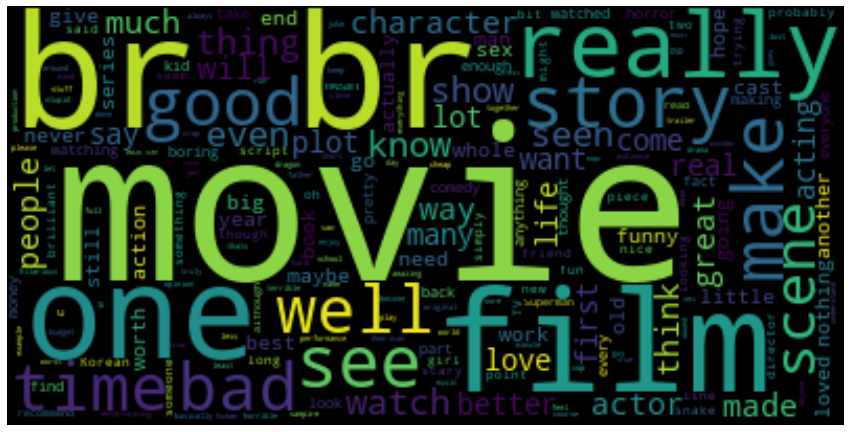

In [ ]:
# Import the word cloud function
from wordcloud import WordCloud, STOPWORDS

my_stopwords = set(STOPWORDS)
# Create and generate a word cloud image
my_cloud = WordCloud(background_color='black', stopwords=my_stopwords).generate(descriptions)

# Display the generated wordcloud image
plt.figure(figsize=(15, 12))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()

#**CHAP II: Sac de mots**

####**1. Sac de mots**
+ Bienvenue au prochain chapitre de ce cours ! Nous poursuivons notre voyage en nous lançant dans la première étape de l'exécution d'une tâche d'analyse des sentiments : transformer nos données textuelles en forme numérique.

+ Pourquoi devons-nous faire cela? Un modèle d'apprentissage automatique ne peut pas fonctionner directement avec les données textuelles, mais plutôt avec des fonctionnalités numériques que nous créons à partir des données.

####**2. Qu'est-ce qu'un sac de mots (BOW) ?**

+ Nous commençons par une méthode basique et grossière, mais souvent très utile, appelée sac de mots (BOW).

+ Une approche par sac de mots décrit l'occurrence, ou la fréquence, des mots dans un document ou un ensemble de documents (appelé corpus).

+ Il s'agit essentiellement de construire un vocabulaire de tous les mots apparaissant dans le document et de garder une trace de leurs fréquences.

####**3. Avis sur les produits Amazon**
+ Avant de poursuivre la discussion sur BOW, nous présenterons les données que nous utiliserons tout au long du chapitre, à savoir les avis sur les produits Amazon.

+L'ensemble de données se compose de deux colonnes : la première contient le score, qui est 1 s'il est positif et 0 s'il est négatif ; La deuxième colonne contient l'examen réel du produit.

####**4. Analyse des sentiments avec BOW : Exemple**

+ Voyons comment BOW fonctionnerait appliqué à un exemple d'examen.

+ Imaginez que vous ayez la chaîne suivante :
  +  "This is the best book ever. I loved the book and highly recommend it."
+ Le but d'une approche BOW serait de construire la sortie de type dictionnaire suivante :

  + 'This', se produit une fois dans notre chaîne, donc il a un compte de 1,
  + 'is' se produit une fois,

  + 'the' se produit deux fois et ainsi de suite .

+ Une chose à noter est que nous perdons l'ordre des mots et les règles de grammaire, c'est pourquoi cette approche est appelée un «sac» de mots, ressemblant à laisser tomber un tas d'articles dans un sac et à perdre tout sens de leur ordre.

+ Cela semble simple, mais parfois décider comment construire le vocabulaire peut être complexe.

+ Nous discutons de certains des compromis que nous devons prendre en compte dans les chapitres suivants.

####**5. Résultat final BOW**

+ Lorsque nous transformons la colonne de texte avec un BOW, le résultat final ressemble à quelque chose comme le tableau que nous voyons :
  + où la colonne est le mot (également appelé jeton),
  + la ligne représente le nombre de fois que nous l'avons rencontré dans l'examen respectif.

####**6. Fonction CountVectorizer**

+ Comment exécuter un processus BOW en Python ?

+ La façon la plus simple de le faire est d'utiliser le CountVectorizer de la bibliothèque de texte dans le sous-module sklearn.feature_extraction.
+ En Python, nous importons le **CountVectorizer() de sklearn.feature_extraction.text**.

+ Dans la fonction CountVectorizer, nous laissons pour le moment les options fonctionnelles par défaut, à l'exception de l'argument **max_features, qui ne considère que les caractéristiques avec la fréquence de terme la plus élevée, c'est-à-dire qu'il sélectionnera les 1000 mots les plus fréquents dans le corpus d'avis**.

+ Nous devons le faire parfois pour l'amour de la mémoire.

+ Nous utilisons la méthode `fit()` du CountVectorizer, en appelant fit() sur notre colonne de texte. Pour créer une représentation BOW, nous appelons la méthode transform(), appliquée à nouveau à notre colonne de texte.


In [ ]:
import pandas as pd
data = pd.read_csv("/content/amazon_reviews_sample.csv")
data.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000)
vect.fit(data.review)
X = vect.transform(data.review)

In [ ]:
X

<10000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 406668 stored elements in Compressed Sparse Row format>


####**7. Sortie de CountVectorizer**

+ Le résultat est une matrice creuse.

+ Une matrice creuse ne stocke que les entités non nulles, où les lignes correspondent au nombre de lignes dans l'ensemble de données et les colonnes au vocabulaire BOW.

####**8. Transformer le vectoriseur**
+ Pour examiner le contenu réel d'une matrice clairsemée, nous devons effectuer une étape supplémentaire pour la transformer en un tableau NumPy "dense", en utilisant la méthode **.toarray()**.

+ Nous pouvons construire un pandas DataFrame à partir du tableau, où les noms des colonnes sont obtenus à partir de la méthode `.get_feature_names()` du vectorizer.

+ Cela renvoie une liste où chaque entrée correspond à une fonctionnalité.



In [ ]:
# Transform to an array
my_array = X.toarray()
my_array

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Transform back to a dataframe, assign column names
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names_out())
X_df.head()

,10,100,12,15,1984,20,30,40,451,50,...,wrong,wrote,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,0


####**9. Entraînons-nous !**
C'était notre introduction à BOW! Appliquons ce que nous avons appris dans les exercices.

#**Exercice**

+ Quelle affirmation à propos de BOW est vraie ?
Vous avez été présenté à un sac de mots (BOW) et à certaines de ses caractéristiques dans la vidéo. Laquelle des affirmations suivantes concernant BOW est vraie ?

####**Répondre à la question**

####**Des réponses possibles**

1) Bag-of-words préserve l'ordre des mots et les règles de grammaire.
presse


2) Le sac de mots décrit l'ordre et la fréquence des mots ou des jetons dans un corpus de documents.
presse


***3) Le sac de mots est une méthode simple mais efficace pour construire un vocabulaire de tous les mots apparaissant dans un document.
presse***


4) Le sac de mots ne peut être appliqué qu'à un document volumineux, pas à des documents plus courts ou à des phrases simples.

####**Votre premier BOW**
+ **Un sac de mots est une approche pour transformer le texte en forme numérique.**

+ Dans cet exercice, vous appliquerez un BOW à la annakliste avant de passer à un ensemble de données plus important dans l'exercice suivant.

+ Votre tâche sera de travailler avec cette liste et d'appliquer un BOW en utilisant le CountVectorizer().

+ Cette transformation est votre première étape pour pouvoir comprendre le sentiment d'un texte. Faites attention aux mots qui pourraient véhiculer un sentiment fort.

+ Rappelez-vous que la sortie de  CountVectorizer() est une matrice creuse, qui ne stocke que les entrées non nulles.

+ Pour examiner le contenu réel de cette matrice, nous la convertissons en un tableau dense à l'aide de la méthode .toarray().

+ Notez que dans ce cas, vous n'avez pas besoin de spécifier l'argument max_features car le texte est court.

####**Des instructions**

+ Importez la fonction de vectorisation de comptage à partir de sklearn.feature_extraction.text.
+ Construisez et ajustez le vectoriseur sur le petit jeu de données.
+ Créez la représentation BOW avec le nom anna_bowen appelant la méthode transform().
+ Imprimez le résultat BOW sous la forme d'un tableau dense.

In [ ]:
# Import the required function
from sklearn.feature_extraction.text import CountVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it
anna_vect = CountVectorizer()
anna_vect.fit(annak)

# Create the bow representation
anna_bow = anna_vect.transform(annak)

# Print the bag-of-words result
print(anna_bow.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


####**BOW utilise les avis sur les produits**

+ Vous avez pratiqué un BOW sur un petit jeu de données.

+ Vous allez maintenant l'appliquer à un échantillon d'avis de produits Amazon. Les données ont été importées pour vous et s'appellent reviews.

+ Il contient deux colonnes. Le premier s'appelle score et c'est 0 quand l'avis est négatif, et 1 quand il est positif.

+ La deuxième colonne est appelée review et contient le texte de l'avis rédigé par un client. N'hésitez pas à explorer les données dans IPython Shell.

+ Votre tâche est de construire un vocabulaire BOW, en utilisant la colonne review.

+ Rappelons qu'on peut appeler la méthode **.get_feature_names()** sur le vectoriseur pour obtenir une liste de tous les éléments de vocabulaire.

####**Des instructions**

+ Créez un objet CountVectorizer, en spécifiant le nombre maximal d'entités.
+ Montez le vectoriseur.
+ Transformez le vectoriseur ajusté.
+ Créez un DataFrame où vous transformez la matrice clairsemée en un tableau dense et assurez-vous de spécifier correctement les noms des colonnes.

In [ ]:
import pandas as pd
reviews = pd.read_csv("/content/amazon_reviews_sample.csv")

from sklearn.feature_extraction.text import CountVectorizer

# Build the vectorizer, specify max features
vect = CountVectorizer (max_features=100)
# Fit the vectorizer
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


#**Obtenir une granularité avec les n-grammes**

####**1. Obtenir une granularité avec les n-grammes**

+ Vous vous souvenez peut-être d'une vidéo précédente qu'avec une approche par sac de mots, l'ordre des mots est ignoré.

####**2. Le contexte compte**

+ Imaginez que vous ayez une phrase telle que « je suis heureux, pas triste » et une autre « je suis triste, pas heureux ».

+ Ils auront la même représentation avec un BOW, même si les significations sont inversées. Dans ce cas, mettre NOT devant le mot (qui est aussi appelé négation) change tout le sens et montre pourquoi le contexte est important.

####**3. Capturer le contexte avec un BOW**

+ Il existe un moyen de capturer le contexte lors de l'utilisation d'un BOW, par exemple en considérant des paires ou des triplets de jetons qui apparaissent les uns à côté des autres.

+ Définissons quelques termes.

  + **Les jetons uniques** sont ce que nous avons utilisé jusqu'à présent et sont également appelés **«unigrammes»**.

  + **Les bigrammes sont des paires de jetons, les trigrammes sont des triplets de jetons et une séquence de n-jetons est appelée "n-grammes".**

####**4. Capturer le contexte avec BOW**

+ Illustrons cela par un exemple. Prenez la phrase "Le temps est magnifique aujourd'hui" et divisez-la en unigrammes, bigrammes et trigrammes.

+ Avec les unigrammes, nous avons des jetons simples, avec les bigrammes, des paires de jetons voisins, avec des trigrammes : des triplets de jetons voisins.

####**5. n-grammes avec le CountVectorizer**
+ Il est facile d'implémenter des n-grammes avec la méthode CountVectorizer.

+ Pour spécifier les n-grammes, nous utilisons le paramètre ngram_range.

+ **Le ngram_range est un tuple où le premier paramètre est la longueur minimale et le second paramètre est la longueur maximale des jetons**.

+ Par exemple, **ngram_range =(1, 1) signifie que nous n'utiliserons que des unigrammes, (1, 2) signifie que nous utiliserons des unigrammes et des bigrammes**, etc.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(min_n, max_n))
# Only unigrams
ngram_range=(1, 1)
# Uni- and bigrams
ngram_range=(1, 2)


####**6. Quel est le meilleur n?**
+ Il n'est pas facile de déterminer quelle est la séquence optimale à utiliser pour votre problème.

+ Si nous utilisons une séquence de jetons plus longue, cela se traduira par plus de fonctionnalités.
+ En principe, le nombre de bigrammes pourrait être le nombre d'unigrammes au carré ; trigrammes le nombre d'unigrammes à la puissance 3 et ainsi de suite.

+ En général, avoir des séquences plus longues se traduit par des modèles d'apprentissage automatique plus précis, mais cela augmente également le risque de surajustement.

+ Une approche pour trouver la longueur de séquence optimale serait d'essayer différentes longueurs dans quelque chose comme une recherche de grille et de voir ce qui donne le meilleur modèle.

####**7. Spécifier la taille du vocabulaire**

+ Déterminer la longueur de la séquence de jetons n'est pas le seul moyen de déterminer la taille du vocabulaire.

+ Il y a quelques paramètres dans le CountVectorizer qui peuvent aussi le faire. Vous vous souvenez peut-être que nous avons défini le paramètre max_features.

+ Les **max_features** peuvent indiquer au CountVectorizer de prendre les jetons les plus fréquents du corpus. S'il est défini sur Aucun, tous les mots du corpus seront inclus.  Ainsi, ce paramètre peut supprimer des mots rares, ce qui, selon le contexte, peut être une bonne idée ou non.

+ Un autre paramètre que vous pouvez spécifier est **max_df**. S'il est donné, il indique à CountVectorizer d'ignorer les termes avec une fréquence supérieure à la fréquence donnée.

+ Nous pouvons le spécifier sous la forme d'un nombre entier - qui sera un nombre absolu, ou flottant - qui sera une proportion.

+ **La valeur par défaut de max_df est 1.0**, ce qui signifie qu'il n'ignore aucun terme.

+ **Min_df** est très similaire à max_df. Il est utilisé pour supprimer les termes qui apparaissent trop rarement. Il peut à nouveau être spécifié soit comme un entier, auquel cas ce sera un compte, soit comme un flottant, auquel cas ce sera une proportion. La valeur par défaut est 1, ce qui signifie "ignorer les termes qui apparaissent dans moins d'un document". Ainsi, le paramètre par défaut n'ignore aucun terme.

####**8. Entraînons-nous !**
+ Passons aux exercices où vous spécifierez la longueur de la séquence de jetons et la taille du vocabulaire.

###**Capturer le contexte avec un BOW**

+ **Unigrammes** : tokens simples
+ **Bigrammes**: paires de jetons
+ **Trigrammes** : triplets de tokens
+ **n-grammes** : séquence de n-éléments de langage

###**Capturer le contexte avec un BOW**
+ Le temps est magnifique aujourd'hui.
  + Unigrammes:{Le,temps,aujourd'hui,est,magnifique}

  + Bigrammes:{Le temps, temps aujourd'hui, aujourd'hui est, est merveilleux}

  + Trigrammes:{Le temps,le temps aujourd'hui, le temps aujourd'hui est, aujourd'hui est merveilleux}


###**Quel est le meilleur n ?**
+ Séquence plus longue de tokens
+ Résultat : plus de caractéristiques
+ Plus grande précision des modèles d'apprentissage
d'apprentissage automatique Risque de surcharge

###**Spécification de la taille du vocabulaire**
+ CountVectorizer(max_features, max_df,min_df)
  + **max_features** : si elle est spécifiée, elle ne comprendra que les mots les plus fréquents du vocabulaire.
    + Si max_features=None, tous les mots seront inclus.

  + max_df:ignore les termes dont la fréquence est supérieure à celle spécifiée
    + Si c'est un nombre entier, alors c'est un nombre absolu ; si c'est un nombre entier, alors c'est une proportion.
    + La valeur par défaut est 1, ce qui signifie qu'il ne tient pas compte de plusieurs termes.

  + **min_df**:ignore les termes dont la fréquence est inférieure à celle spécifiée
    + Si elle est égale à un nombre entier, alors elle est égale à un nombre absolu ; si c'est un nombre entier, c'est une proportion
    + La valeur par défaut est 1, ce qui signifie qu'il ne tient pas compte de plusieurs termes.


#**Exercice**

+ Spécifiez la longueur de la séquence de jetons avec BOW
Nous avons vu dans la vidéo qu'en spécifiant différentes longueurs de jetons - ce que nous avons appelé des n-grammes - nous pouvons mieux saisir le contexte, qui peut être très important.

+ Dans cet exercice, vous travaillerez avec un échantillon des avis sur les produits Amazon. Votre tâche consiste à créer un vocabulaire BOW, en utilisant la reviewcolonne et en spécifiant la longueur de séquence des jetons.

####**Des instructions**

+ Construisez le vectoriseur, en spécifiant la longueur de la séquence de jetons en uni- et bigrammes.
+ Montez le vectoriseur.
+ Transformez le vectoriseur ajusté.
+ Dans le DataFrame, assurez-vous de spécifier correctement les noms de colonne.

In [ ]:
import pandas as pd
reviews = pd.read_csv("/content/amazon_reviews_sample.csv")

from sklearn.feature_extraction.text import CountVectorizer

# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1,2))
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)


In [ ]:
# Create the bow representation
import pandas as pd
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())

In [ ]:
print(X_df.head())

NameError: ignored

####**Taille du vocabulaire des critiques de films**
+ Dans cet exercice, vous allez pratiquer différentes manières de limiter la taille du vocabulaire en utilisant un échantillon de l' ensemble de moviesdonnées des avis.

+ La première colonne est le review, qui est de type objectet la deuxième colonne est le label, qui est 0pour un avis négatif et 1pour un avis positif.

+ Les trois méthodes que vous utiliserez transformeront la colonne de texte en nouvelles colonnes numériques, capturant le nombre d'un mot ou d'une phrase dans chaque révision. Chaque méthode aboutira finalement à la création d'un nombre différent de nouvelles fonctionnalités.

###**Consignes**

+ En utilisant l' ensemble de moviesdonnées, limitez la taille du vocabulaire à 100.

+ À l'aide de l' ensemble de moviesdonnées, limitez la taille du vocabulaire pour inclure des termes qui n'apparaissent pas dans plus de 200 documents.

+ En utilisant l' ensemble de moviesdonnées, limitez la taille du vocabulaire pour ignorer les termes qui apparaissent dans moins de 50 documents.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
movies = pd.read_csv("/content/IMDB_sample.csv")
# Build the vectorizer, specify size of vocabulary and fit
vect = CountVectorizer(max_features=100)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Build and fit the vectorizer
vect = CountVectorizer(max_df=200)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  000  000s  007  0080  0083  0093638  00am  00pm  00s  ...  zukovic  \
0   0    0     0    0     0     0        0     0     0    0  ...        0   
1   0    0     0    0     0     0        0     0     0    0  ...        0   
2   0    0     0    0     0     0        0     0     0    0  ...        0   
3   0    0     0    0     0     0        0     0     0    0  ...        0   
4   0    0     0    0     0     0        0     0     0    0  ...        0   

   zulu  zuniga  zvyagvatsev  zwick  zx81  zy  zzzzzzzzzzzz  zzzzzzzzzzzzz  â½  
0     0       0            0      0     0   0             0              0   0  
1     0       0            0      0     0   0             0              0   0  
2     0       0            0      0     0   0             0              0   0  
3     0       0            0      0     0   0             0              0   0  
4     0       0            0      0     0   0             0              0   0  

[5 rows x 45055 columns]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


# Build and fit the vectorizer
vect = CountVectorizer(min_df=50)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   000  10  100  11  12  13  14  15  1950  1980  ...  york  you  young  \
0    0   0    0   0   0   0   0   0     0     0  ...     0    0      0   
1    0   1    0   0   0   0   0   0     0     0  ...     0    3      0   
2    0   0    0   0   0   0   0   0     0     0  ...     0    0      1   
3    0   0    0   0   0   0   0   0     0     0  ...     0    1      1   
4    0   1    0   0   0   0   0   0     0     0  ...     0    0      0   

   younger  your  yourself  youth  zero  zombie  zombies  
0        0     0         0      0     0       0        1  
1        0     2         0      0     0       0        0  
2        0     0         0      0     0       0        0  
3        0     0         0      0     0       0        0  
4        1     0         0      0     0       0        0  

[5 rows x 2552 columns]


####**BOW avec n-grammes et taille du vocabulaire**
+ Dans cet exercice, vous vous entraînerez une fois de plus à créer un sac de mots, en utilisant l'ensemble de données reviews des avis sur les produits Amazon.

+ Votre tâche principale sera de limiter la taille du vocabulaire et de spécifier la longueur de la séquence de jetons.

####**Des instructions**

+ Importez le vectoriseur depuis sklearn.
+ Construisez le vectoriseur et assurez-vous de spécifier les paramètres suivants : la taille du vocabulaire doit être limitée à 1000, n'inclure que des bigrammes et ignorer les termes qui apparaissent dans plus de 500 documents.
+ Ajustez le vectoriseur à la colonne review.
+ Créez un DataFrame à partir de la représentation BOW.

In [ ]:
#Import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
reviews = pd.read_csv("/content/amazon_reviews_sample.csv")

# Build the vectorizer, specify max features and fit
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(reviews.review)

# Transform the review
X_review = vect.transform(reviews.review)

# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   able to  about how  about it  about the  about this  after reading  \
0        0          0         0          0           0              0   
1        0          0         0          0           0              0   
2        0          0         0          0           0              0   
3        0          0         0          0           0              0   
4        0          0         0          0           0              0   

   after the  again and  ago and  agree with  ...  you think  you to  you ve  \
0          0          0        0           0  ...          0       0       0   
1          0          0        0           0  ...          0       0       0   
2          0          0        0           0  ...          0       0       2   
3          0          0        0           0  ...          0       0       0   
4          0          0        0           0  ...          0       0       1   

   you want  you will  you won  you would  your money  your own  your time  
0  

#**Créer de nouvelles fonctionnalités à partir de texte**

####**1. Créez de nouvelles fonctionnalités à partir du texte**
+ Lorsque nous avons une tâche d'analyse des sentiments, que nous résoudrons avec l'apprentissage automatique, le fait d'avoir des fonctionnalités supplémentaires se traduit généralement par un meilleur modèle.

####**2. Objectif de la vidéo**
Notre objectif dans cette vidéo est d'enrichir l'ensemble de données de votre choix avec des fonctionnalités supplémentaires liées au texte capturant le sentiment.

####**3. Données sur les avis produits**
+ Nous continuons à travailler avec l'ensemble de données des avis sur les produits Amazon.

+ N'oubliez pas que la première colonne contient le score numérique et la deuxième colonne - l'avis lui-même.

####**4. Fonctionnalités de la colonne de révision**
+ D'après ma propre expérience, certaines fonctionnalités très prédictives en disent long sur la complexité de la colonne de texte.

+ Par exemple, on pourrait mesurer la durée de chaque révision, le nombre de phrases qu'elle contient, ou dire quelque chose sur les parties du discours impliquées, les signes de ponctuation, etc.

####**5. Tokénisation d'une chaîne**

+ N'oubliez pas que nous avons utilisé une approche BOW pour transformer chaque avis en fonctionnalités numériques, en comptant le nombre de fois qu'un mot est apparu dans l'avis respectif.
+ Ici, nous nous arrêtons une étape plus tôt et ne divisons les critiques qu'en mots individuels (généralement appelés jetons, bien qu'un jeton puisse également être une phrase entière.)

+ Nous travaillerons avec le package nltk, et concrètement la fonction **word_tokenize**.

+ Appliquons la fonction word_tokenize à notre chaîne anna_k familière.

+ Le résultat renvoyé est une liste, où chaque élément est un jeton de la chaîne.

+ Notez que non seulement les mots mais aussi les signes de ponctuation sont à l'origine attribués en tant que jetons. La même chose aurait été le cas avec les chiffres, si nous en avions dans notre chaîne.



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize

anna_k = """
Happy families are all alike, every unhappy family is unhappy in its own way.
"""

word_tokenize(anna_k)


['Happy',
 'families',
 'are',
 'all',
 'alike',
 ',',
 'every',
 'unhappy',
 'family',
 'is',
 'unhappy',
 'in',
 'its',
 'own',
 'way',
 '.']

####**6. Jetons d'une colonne**

+ Maintenant, nous voulons appliquer la même logique mais à notre colonne d'avis.

+ Un moyen rapide d'itérer sur les chaînes consiste à utiliser la compréhension de liste.

+ Petit rappel sur les compréhensions de listes. Ils sont comme des boucles aplaties.

+ La syntaxe est une opération que nous effectuons sur chaque élément d'un objet itérable (comme une liste).

+ Dans notre cas, une compréhension de liste nous permettra d'itérer sur la colonne d'avis, en symbolisant chaque avis.

+ Le résultat va être une liste; si nous explorons le type du premier élément, par exemple, nous voyons qu'il est également de type liste.

+ Cela signifie que notre word_tokens est une liste de listes. Chaque article stocke les jetons d'un seul avis.



In [ ]:
import pandas as pd
reviews = pd.read_csv("/content/amazon_reviews_sample.csv")

In [ ]:
# General form of list comprehension[expression for item in iterable]

word_tokens = [word_tokenize(review) for review in reviews.review]

type(word_tokens)

list

In [ ]:
type(word_tokens[0])

list

####**7. Jetons d'une colonne**

+ Maintenant que nous avons notre liste de word_tokens, nous n'avons qu'à compter le nombre de jetons qu'il y a dans chaque élément de word_tokens.

+ Nous commençons par créer une liste vide, à laquelle nous ajouterons la longueur de chaque révision au fur et à mesure que nous parcourrons la liste word_tokens.

+ Dans la première ligne de la boucle for, nous trouvons le nombre d'éléments dans la liste word_tokens en utilisant la fonction len().

+ Puisque nous voulons itérer sur ce nombre, nous devons entourer **le len() par la fonction range()**.

+ Dans la deuxième ligne, nous trouvons la longueur de chaque itérable et ajoutons ce nombre à notre liste vide **len_tokens**.

+ Enfin, nous créons une nouvelle fonctionnalité pour la durée de chaque examen.



In [ ]:
len_tokens = []
# Iterate over the word_tokens list
for i in range(len(word_tokens)):
  len_tokens.append(len(word_tokens[i]))


In [ ]:
# Create a new feature for the length of each review
reviews['n_tokens'] = len_tokens

In [ ]:
reviews.head()

,Unnamed: 0,score,review,n_tokens
0,0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,1,The best soundtrack ever to anything.: I'm re...,109
2,2,1,Amazing!: This soundtrack is my favorite musi...,165
3,3,1,Excellent Soundtrack: I truly like this sound...,145
4,4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


####**8. Gérer la ponctuation**

+ Notez que nous n'avons pas abordé la ponctuation, mais vous pouvez l'exclure si cela convient mieux à votre contexte.

+ Vous pouvez même créer une nouvelle fonctionnalité qui mesure le nombre de signes de ponctuation.

+ Dans notre contexte, un avis avec plus de signes de ponctuation pourrait signaler une opinion très chargée émotionnellement.

+ Il est également bon de savoir que nous pouvons suivre la même logique et créer une fonctionnalité qui compte le nombre de phrases, où un jeton sera égal à une phrase et non à un seul mot.



####**9. Avis avec une fonctionnalité pour la longueur**

+ Si nous vérifions à quoi ressemble l'ensemble de données des avis sur les produits, nous voyons la colonne "n_tokens" que nous avons créée.

+ Il indique le nombre de mots dans chaque révision.

####**10. Entraînons-nous !**
+ Résolvons quelques exercices pour mettre en pratique ce que nous avons appris.


#**Exercice**

####**Tokéniser une chaîne de GoT**
+ Une première étape standard lorsque vous travaillez avec du texte consiste à le segmenter, en d'autres termes, à diviser une chaîne plus grande en chaînes individuelles, qui sont généralement des mots simples (jetons).

+ Une chaîne GoT a été créée pour vous et contient une citation de Game of Thrones de George RR Martin . Votre tâche consiste à le diviser en jetons individuels.

####**Des instructions**

+ Importez la fonction de tokenisation de mots à partir de nltk.
+ Transformez la chaîne  GoT en jetons de mots.

In [ ]:
GoT = """
Never forget what you are, for surely the world will not. Make it your strength.
Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.
"""

In [ ]:
# Import the required function
from nltk import word_tokenize

# Transform the GoT string to word tokens
print(word_tokenize(GoT))

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


####**Jetons de mots des Avengers**
+ Maintenant que vous avez tokenisé votre première chaîne, il est temps de parcourir les éléments d'une liste et de les tokeniser également.

+ Un moyen simple de le faire avec une seule ligne de code est avec une compréhension de liste.

+ Une liste avengers a été créée pour vous. Il contient quelques citations des films Avengers . Vous pouvez l'explorer dans le shell IPython.

####**Des instructions**

+ Importez la fonction et le package requis.
+ Appliquez le mot fonction de tokenisation sur chaque élément de notre liste.

In [ ]:
avengers = ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]

In [ ]:
# Import the word tokenizing function
from nltk import word_tokenize
# Tokenize each item in the avengers
tokens_avengers = [word_tokenize(item) for item in avengers]

print(tokens_avengers)

[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd', '*', '*', '*', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


####**Une fonctionnalité pour la durée d'un examen**

+ Vous avez maintenant travaillé avec une chaîne et une liste avec des éléments de chaîne, il est temps d'utiliser un plus grand échantillon de données.

+ Votre tâche dans cet exercice consiste à créer une nouvelle fonctionnalité pour la durée d'une révision, en utilisant le jeu de données familier reviews.

####**Consignes**

+ Importez la fonction de tokenisation de mots à partir du package requis.
Appliquez la fonction à la colonne review de l' ensemble de données reviews.

In [ ]:
# Import the needed packages
from nltk import word_tokenize

# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Print out the first item of the word_tokens list
print(word_tokens[0])

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


+ Itérer sur la word_tokensliste créée.
+ Au fur et à mesure que vous itérez, recherchez la longueur de chaque élément de la liste et ajoutez-le à la len_tokensliste vide.
+ Créez une nouvelle fonctionnalité n_wordsdans le reviewspour la durée des avis.

In [ ]:
# Create an empty list to store the length of reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens

#**Pouvez-vous deviner la langue?**


####**1. Pouvez-vous deviner la langue ?**
+ Souvent, dans les applications réelles, tous les documents porteurs de sentiments ne seront pas en anglais.

+ Nous pourrions vouloir détecter quelle langue est utilisée ou créer des fonctionnalités spécifiques liées à la langue.

####**2. Langage d'une chaîne en Python**
+ En Python, il existe quelques bibliothèques capables de détecter la langue d'une chaîne.

+ Dans ce cours, nous utiliserons langdetect car c'est l'un des packages les plus performants.

+ Mais vous pouvez suivre la même structure en utilisant un autre package. Nous importons d'abord la fonction **detect_langs du package langdetect**.

+ Imaginons maintenant que nous ayons une chaîne appelée étrangère, qui est une phrase dans une autre langue.

+ Notre objectif est d'identifier son langage. Nous appliquons la fonction **detect_langs** à notre chaîne. Cette fonction renverra une liste.

+ **Chaque élément de la liste contient une paire d'une langue et un nombre indiquant la probabilité que la chaîne soit dans cette langue particulière**.

+ Dans ce cas, nous observons seulement 1 élément dans la liste, à savoir l'espagnol. C'est parce que la fonction est assez certaine que la langue est l'espagnol. Dans d'autres cas, nous pourrions obtenir des listes plus longues,


In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect_langs
foreign = 'Este libro ha sido uno de los mejores libros que he leido.'
detect_langs(foreign)

[es:0.9999951379004114]


####**3. Langue d'une colonne**
+ Dans les applications réelles, nous ne travaillons généralement pas avec une seule chaîne mais avec de nombreuses chaînes, souvent contenues dans une colonne d'un ensemble de données.

+ Un problème courant consiste à détecter la langue de chacune des chaînes et à capturer la langue la plus probable dans une nouvelle colonne.

+ Comment faire ça? Nous commençons à nouveau par importer la fonction detect_langs du package langdetect.

+ Nous importons notre ensemble de données familier avec les avis sur les produits.



pd.read_csv(
filepath_or_buffer: 'FilePathOrBuffer', sep=pandas._libs.lib.NoDefault instance, delimiter=None, header='infer', names=pandas._libs.lib.NoDefault instance, index_col=None, usecols=None, squeeze=False, prefix=pandas._libs.lib.NoDefault instance, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None, storage_options: 'StorageOptions' = None)

In [ ]:
?pd.read_csv

In [ ]:
from langdetect import detect_langs
import pandas as pd
reviews = pd.read_csv("/content/IMDB_sample.csv")
reviews.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


####**4. Construire une fonctionnalité pour le langage**
+ Les étapes que nous suivons ensuite sont assez similaires à notre approche lors de la saisie de la longueur d'un examen.

+ Tout d'abord, nous créons une liste vide, appelée langues. Nous voulons parcourir les lignes de notre ensemble de données à l'aide d'une boucle for.

+ Dans la première ligne de la boucle, nous appliquons la fonction **len()** à notre jeu de données, qui renvoie le nombre de lignes.

+ Nous devons encore appeler la fonction **range()** puisque nous voulons itérer sur le nombre de lignes.

+ Dans la deuxième ligne de la boucle, nous appliquons la fonction **detect_lang** sur la colonne de révision du jeu de données, qui est la deuxième colonne dans notre cas, tout en sélectionnant une ligne à la fois.

+ Nous voulons stocker chaque langue détectée en tant qu'élément dans une liste, donc nous ajoutons le résultat de **detect_langs aux langues de la liste vide**.

+ Quand on imprime des langues, on voit que c'est une liste de listes, où chaque élément contient la langue détectée de la ligne respective et la probabilité de cette langue. Dans certains cas, les listes individuelles contiennent plus d'un élément.



In [ ]:
languages = []
for row in range(len(reviews)):
  languages.append(detect_langs(reviews.iloc[row, 1]))


####**5. Construire une fonctionnalité pour le langage**

+ Il nous reste une étape avant de créer notre fonctionnalité de langue. Nous avons vu que les langues sont une liste de listes.

+ Nous voulons extraire le premier élément de chaque liste dans les langues puisque le premier élément est toujours la langue la plus probable.

+ Un moyen rapide de le faire est de comprendre la liste. Décomposons la commande en étapes. Par exemple, prenons le premier élément des langues et divisons-le en deux points.

+ Après cela, nous extrayons le premier élément de la scission résultante, renvoyant '[es'.

+ Enfin, comme il y a un crochet gauche avant la langue, nous sélectionnons tout à partir du 2ème élément, ce qui donne 'es' pour l'espagnol.



In [ ]:
# Transform the first list to a string and split on a colon

str(languages[0]).split(':')

'en'

In [ ]:
str(languages[0]).split(':')[0]

'[en'

In [ ]:
str(languages[0]).split(':')[0][1:]

'en'

####**6. Construire une fonctionnalité pour le langage**

+ Pour écrire la compréhension de la liste, nous rassemblons ces étapes en itérant sur chaque élément de notre liste de listes.

+ Enfin, nous attribuons la liste nettoyée à une nouvelle fonctionnalité, appelée langue.



In [ ]:
languages = [str(lang).split(':')[0][1:] for lang in languages]
reviews['language'] = languages

In [ ]:
reviews.head()

,Unnamed: 0,review,label,language
0,18245,This short spoof can be found on Elite's Mille...,0,en
1,19801,A singularly unfunny musical comedy that artif...,0,en
2,3222,"An excellent series, masterfully acted and dir...",1,en
3,6010,The master of movie spectacle Cecil B. De Mill...,1,en
4,16355,I was gifted with this movie as it had such a ...,0,en


####**7. Entraînons-nous !**
+ Je sais que c'est beaucoup de code mais les exercices vous aideront à le digérer.

#**Exercice**

####**Identifier la langue d'une chaîne**

+ Parfois, vous devrez peut-être analyser le sentiment d'un texte non anglais. Votre première tâche dans un tel cas sera d'identifier la langue étrangère.

+ Dans cet exercice, vous identifierez la langue d'une seule chaîne. Une chaîne appelée **foreign** a été créée pour vous.

+ Il a été extrait de manière aléatoire de l' ensemble de données  reviews et peut contenir des erreurs grammaticales. N'hésitez pas à l'explorer dans le shell IPython.

####**Des instructions**

+ Importez la fonction requise à partir du package de détection de langue.
Détecter la langue de la chaîne foreign.


In [ ]:
foreign ="""
L'histoire rendu était fidèle, excellent, et grande.
"""
# Import the language detection function and package
from langdetect import detect_langs
# Detect the language of the foreign string
print(detect_langs (foreign))

[fr:0.9999941845547811]


####**Détecter la langue d'une liste de chaînes**

+ Vous allez maintenant détecter la langue de chaque élément d'une liste. + Une liste appelée **sentences** a été créée pour vous et elle contient 3 phrases, chacune dans une langue différente.

+ Ils ont été extraits au hasard de l'ensemble de données des avis sur les produits.

####**Des instructions**

+ Itérer sur les phrases de la liste.
+ Détectez la langue de chaque phrase et ajoutez la langue détectée à la liste vide languages

In [ ]:
from langdetect import detect_langs
import re


sentences = ["L'histoire rendu était fidèle, excellent, et grande.",
             'Excelente muy recomendable.',
 'It had a leak from day one but the return and exchange process was very quick.']



languages = []

# Loop over the sentences in the list and detect their language
for sentence in sentences:
    languages.append(detect_langs(sentence))

print('The detected languages are: ', languages)



The detected languages are:  [[fr:0.9999975468908284], [es:0.9999954642449863], [en:0.9999989800446888]]


###**Détection de la langue des avis produits**

+ Vous vous exercerez à la détection de la langue sur un petit ensemble de données appelé non_english_reviews.

+ Il s'agit d'un échantillon de critiques non anglaises issues des critiques de produits Amazon.

+ Vous allez parcourir les lignes de l'ensemble de données, en détectant la langue de chaque ligne et en l'ajoutant à une liste vide.

+ La liste doit être nettoyée afin qu'elle ne contienne que la langue de l'avis, comme 'en'pour l'anglais au lieu de la sortie normale en:0.9987654.

+ N'oubliez pas que la fonction de détection de langue peut détecter plusieurs langues et que le premier élément de la liste renvoyée est le candidat le plus probable. Enfin, vous affecterez la liste à une nouvelle colonne.

+ La logique est la même que celle utilisée dans les diapositives et l'exercice précédent, mais au lieu d'appliquer la fonction à une liste, vous travaillez avec un ensemble de données.

####**Des instructions**

+ Itérer sur les lignes de l' ensemble de données non_english_reviews.
+ À l'intérieur de la boucle, détectez la langue de la deuxième colonne de l'ensemble de données.
+ Nettoyez la chaîne en divisant sur une :expression de compréhension de liste à l'intérieur.
+ Enfin, affectez la liste nettoyée à une nouvelle colonne.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/amazon_reviews_sample.csv", index_col=False)
reviews = df[["score", "review"]]
reviews.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [ ]:
languages = []

# Loop over the rows of the dataset and append
for row in range(len(reviews)):
    languages.append(detect_langs(reviews.iloc[row, 1]))

# Clean the list by splitting
languages = [str(lang).split(':')[0][1:] for lang in languages]


# Assign the list to a new feature
reviews['language'] = languages

print(reviews.head())

   score                                             review language
0      1   Stuning even for the non-gamer: This sound tr...       en
1      1   The best soundtrack ever to anything.: I'm re...       en
2      1   Amazing!: This soundtrack is my favorite musi...       en
3      1   Excellent Soundtrack: I truly like this sound...       en
4      1   Remember, Pull Your Jaw Off The Floor After H...       en


In [ ]:
english_reviews = reviews[reviews["language"] == "en"]
english_reviews.head()

,score,review,language
0,1,Stuning even for the non-gamer: This sound tr...,en
1,1,The best soundtrack ever to anything.: I'm re...,en
2,1,Amazing!: This soundtrack is my favorite musi...,en
3,1,Excellent Soundtrack: I truly like this sound...,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",en


In [ ]:
non_english_reviews = reviews[~(reviews["language"] == "en")]
non_english_reviews.head()

,score,review,language
169,1,Awesume! BEST BLOCKS EVER!: THIS TOY WAS OUR ...,de
1249,1,Il grande ritorno!: E' dai tempi del tour di ...,it
1259,1,La reencarnación vista por un científico: El ...,es
1260,1,Excelente Libro / Amazing book!!: Este libro ...,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,es


In [ ]:
from langdetect import detect_langs
languages = []

# Loop over the rows of the dataset and append
for row in range(len(non_english_reviews)):
  non_english_reviews=non_english_reviews.copy()
  value=non_english_reviews.iloc[row, 1]
  languages.append(detect_langs(value))

# Clean the list by splitting
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature
non_english_reviews['language'] = languages

print(non_english_reviews.head())

      score                                             review language
169       1   Awesume! BEST BLOCKS EVER!: THIS TOY WAS OUR ...       en
1249      1   Il grande ritorno!: E' dai tempi del tour di ...       it
1259      1   La reencarnación vista por un científico: El ...       es
1260      1   Excelente Libro / Amazing book!!: Este libro ...       es
1261      1   Magnifico libro: Brian Weiss ha dejado una ma...       es


#**MOTS VIDES**


####**1. Mots vides**

+ Dans chaque langue, il y a des mots qui reviennent trop fréquemment et qui ne sont pas très informatifs.

+ Parfois, il est utile de s'en débarrasser avant de construire un modèle d'apprentissage automatique.

####**2. Que sont les mots vides et comment les trouver ?**
+ Les mots trop fréquents et peu informatifs sont appelés mots vides.

+ Mais comment savoir quels mots ne sont pas informatifs ? Dans chaque langue, il existe un ensemble de mots qui, selon la plupart des praticiens, ne sont pas utiles et doivent être supprimés lors de l'exécution d'une tâche de traitement du langage naturel.

+ Par exemple, en anglais l'article défini et indéfini **(the, a/an)**, les conjonctions **('and','but','for')**, les propositions**('on', 'in', 'at')**, etc. sont des mots vides.

+ Deuxièmement, selon le contexte, nous pourrions vouloir élargir l'ensemble standard de mots vides. Par exemple, dans l'ensemble de données sur les critiques de films, nous pourrions souhaiter exclure des mots tels que **"film", "film", "cinéma"**, etc.

####**3. Arrêtez les mots avec des nuages ​​de mots**
+ Vous vous souvenez peut-être d'une vidéo précédente que nous avons construit des nuages ​​​​de mots à l'aide de critiques de films.

+ Voici un exemple de deux nuages ​​​​de mots utilisant les critiques de films. Dans l'image de gauche, les mots vides n'ont pas été supprimés. Les mots qui apparaissent sont 'film' et 'br', ce qui indique un saut de ligne.

+ Dans le nuage sur le côté droit, les mots vides ont été supprimés et nous voyons maintenant des mots tels que 'personnage', 'voir', 'bien', 'histoire'.

####**4. Supprimez les mots vides des nuages ​​de mots**

+ Comment supprimer les mots vides lors de la création d'un nuage de mots ? Commençons par revoir comment nous avons construit un nuage de mots.

+ Tout d'abord, nous importons la fonction WordCloud de wordcloud.

+ Nous importons également la liste par défaut des STOPWORDS de wordcloud.

+ Pour créer notre liste de mots vides, nous pouvons prendre un ensemble de la liste par défaut.

+ Un ensemble est comme une liste mais avec des éléments uniques et non répétitifs.

+ Nous pouvons mettre à jour l'ensemble des mots vides en appelant update et en lui fournissant une liste.

+ Nous passons notre liste de mots vides, appelée **my_stopwords à l'argument mots vides dans la fonction WordCloud**. Puis nous l'affichons.

+ Ainsi, le seul nouvel argument que nous avons ajouté ici est la définition de la liste des mots vides. Tout le reste demeure inchangé.



In [ ]:
# Import libraries
from wordcloud import WordCloud, STOPWORDS
# Define the stopwords list
my_stopwords = set(STOPWORDS)
my_stopwords.update(["movie", "movies", "film", "films", "watch", "br"])
# Generate and show the word cloud
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(name_string)
plt.imshow(my_cloud, interpolation='bilinear')

####**5. Arrêtez les mots avec BOW**

+ Supprimer les mots non informatifs lorsque nous construisons une transformation BOW peut également être très utile.

+ Cela peut facilement être incorporé dans la fonction **countvectorizer**.

+ Tout d'abord, nous devons importer la liste des mots vides anglais par défaut à partir du même package **feature_extraction.text de sci-kit learn**.

+ Supposons que nous voulions enrichir cette liste par défaut avec des mots spécifiques au film. Pour ce faire, nous appelons la fonction union sur la liste par défaut.

+ Rappelez-vous qu'une union de deux ensembles A et B se compose de tous les éléments de A et de tous les éléments de B tels qu'aucun élément ne se répète.

+ Dans notre cas, le syndicat ajoutera les nouveaux mots à la liste des mots vides par défaut, si ce mot n'y est pas déjà.

+ Pour utiliser l'ensemble construit, nous spécifions l'argument **stop_words dans le CountVectorizer** pour qu'il soit égal à notre ensemble défini.

+ Tout le reste reste le même et devrait vous sembler assez familier maintenant.

+ Une chose importante à noter est que l'utilisation de mots vides réduira la taille du vocabulaire que nous avons construit en utilisant un BOW ou une autre approche.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
# Define the set of stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['film', 'movie', 'cinema', 'theatre'])
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(movies.review)
X = vect.transform(movies.review)


####**6. Entraînons-nous !**
+ Résolvons quelques exercices où vous vous entraînerez à supprimer les mots vides !

In [ ]:
text_tweet = """@SouthwestAir Another great flight &amp; crew, Las Vegas-Chicago #3397. Thanks! @USAirways thanks. @SouthwestAir got it squared away. Thank you. I had a man on the inside help me out! @JetBlue Not trying to make you look bad, on your website it says: "Due to weather in the Charleston, NC" Its actually in SC, not NC @USAirways thanks for giving away my seat. Another fine job! http://t.co/r7ibqr4CYd @USAirways your pple did a great job w the madness however some of your systems need help. I appreciate the hard work &amp; the push to b better @SouthwestAir I got a flight at 11:55am on Thursday but looking for something tomorrow, anything available? @SouthwestAir thanks I think we\'ve got it figured out @SouthwestAir Thanks for the response. Was able to get my situation resolved. Not a fan of Mother Nature today. :) @USAirways @AmericanAir First Class all the way!!💺✈️ Headed to @portlandjetport http://t.co/kDMq0jps02 @SouthwestAir - just talking to customer service @united makes me appreciate you even more!  They could learn so much from you! @SouthwestAir Thank you so much for stepping up your game and making my day after night of elevator music. Much appreciated. @JetBlue Btw, thanks for responding quickly!! @SouthwestAir Sent. Thanks VP! @USAirways ok thank you we were told ground delay due to snow. @JetBlue Gotcha... thanks for the update. I\'m ready to go whenever you are :) Enjoy your evening. @USAirways Will do. I appreciate the response. @SouthwestAir Awwweesssooomee! @SouthwestAir Black History Commercial is really sweet. Well done. @SouthwestAir though I work for another major airline,  I LOVE your Black history month commercial. I Thank you. @SouthwestAir Hi! I just saw a Black History month commercial on TV &amp; Im excited! In support of this month,will you all grant me 1 free trip @SouthwestAir thanks for the drink tickets hook up! Can\'t wait for my first international flight with you to NAS! #pumped @SouthwestAir Yeah, we figured it out.  Thanks. @SouthwestAir On my flight today from RSW to GRR I was able to snag a free SW Agent to check for me. It looks like we are (finally) all set. @USAirways  thank you! Glad to be heading home! Great people at your call center! @USAirways thx 4 replying. After trying 2 get thru many times, &amp; v-mail or people hanging up on, us we talked 2 tech...cont\'d @USAirways HA!  You\'re fun. @SouthwestAir Hey yea I got thru...everything is good now (well, in 7-10 days when the voucher goes through)  Appreciate it! @USAirways flying high thanks! @SouthwestAir thanks for your assistance..you guys ROCK!!💯 @SouthwestAir all good now. Going to make it to Boston on time. I\'m actually on your wifi right now @USAirways Thanks. It would be better from the gate agent at C14 in Charlotte boarding flight 1791. @SouthwestAir Glad it was finally resolved too. Too bad I can\'t get a free voucher to go with mine so I can have a friend travel next time! @JetBlue I would prefer a similar picture but full of E190 tails, but great shot! @USAirways thanks @SouthwestAir much respect! @SouthwestAir Thank you!  #thankful #feelingtheluv @SouthwestAir I got it added thank you! :) @SouthwestAir Great, thank you. Best of luck dealing with this horrible winter. @southwestair #fattuesday Great job celebrating #mardigras today at Atlanta Airport. Another reason I\'m nuts for you! http://t.co/8WBzOrRn3C @SouthwestAir No worries at all!!! I would rather be safe on the ground than take any chances. Yes! Tomorrow AM if BNA reopens ☺️ @JetBlue Well, thankfully they\'ve got a nice food court here...When will an update be posted? @usairways Thanks to Kevin and team at F38ish at PHL for some great service recovery tonight. Appreciate it. @SouthwestAir About time...and just in time for my next flight Thursday. @SouthwestAir Thank you. I know ya\'ll can\'t control the weather. I appreciate ya\'ll working to get my flight rebooked the last two days. @SouthwestAir Thanks. I\'ll keep checking. I\'m trying to book our first Disney World vacation. @USAirways Marsha M. at Myrtle Beach is the greatest! She deserves all the respect and praise there is! #ThankYouForEverything @USAirways thanks to Betty working gate at ILM and lovely gate agents here in CLT helping me get home 2 Phx tonight instead of tomorrow @SouthwestAir El Paso deals....May❤❤❤😍🌏 @SouthwestAir really appreciate the follow up, I always fly with y\'all for a reason! @SouthwestAir Awesome - thanks! Despite Mother Nature\'s best efforts, @SouthwestAir\'s good-humored folks got us home safely in an area heavily affected by winter storms. @SouthwestAir I did. Thank you. @SouthwestAir Thanks for taking care of me Today!  Michele rocked the customer service! Gate 25 HOU @USAirways thanks for your help! I left a message for DCA lost and found. Fingers crossed we find it! @JetBlue Worked now, ty @SouthwestAir thank you :-) @SouthwestAir All pieces were found and safely delivered to our home this afternoon. @SouthwestAir no worries. You\'re doing the best u can. Already Cancelled Flighted my biz trip. Still $LUV you! -RR 1079871763 @USAirways @AmericanAir @SVLLINDIA provides you the best logistics experience for people all over India.\n#Mumbai #Surat #NaviMumbai @SouthwestAir no worries. We got thru eventually. I was just curious. Best of luck to you dealing with the weather! @JetBlue wouldn\'t mind paying for the snacks but no $ for tix :-) Great job guys! @JetBlue Thanks for the quick reply! Just wanted to make sure it wasn\'t just my account :) @JetBlue I did see that! Working on picking up a trip or two as we type. @JetBlue what are the chances of actually flying out of Charleston today?? Cold, rainy weather in the south of all places... @USAirways she also appreciated having her very own hashtag! :) #lucycat @JetBlue awesome, thanks! on hold now. @JetBlue flight 117. proud to fly Jet Blue! @JetBlue thanks great recap. I wouldn\'t have been able to sleep!  I was nervous the bad guy was getting away. 😉 @JetBlue great. .@USAirways thanks! “@JetBlue: @jannasaurusrex Thanks for the kind words, Janna! #WeAppreciateYou #TrueBlue” and now I\'M feeling like a boss #jetbluefame @JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks @JetBlue sooo earlier i said i couldnt fly with you for my school trip but now i can! 😏 @USAirways Thank you, busy times. @JetBlue thank you for the information. @JetBlue why are you always so amazing! #jetblue #trueblue http://t.co/iIMTJxcvLG @USAirways thanks :) @JetBlue Thanks. I\'m finding lower fares already on other carriers with direct flights. July 8 - 13. @JetBlue incredible PR team. 👏👏👏👏 @JetBlue Was nice to see your Veterans Advantage Program at the gate on Sunday @ MCO.Keep up the good work at  JetBlue @JetBlue sounds great! Thank you!! :) @eatgregeat WOW~Thx for thinking of us, Greg! Heard #SOBEWFF was amazing! We\'ve heard the same about @JetBlue (ps thx for the info) #TeamNKH @JetBlue it will be glowing. Your crew and your aircraft sparkled. You guys know about @nokidhungry right? Might be a good partnership:) @JetBlue you all are the best #flyfi # ondemand #leatherseats #hipunis #legroom @JetBlue Longing to look into the blue eyes. #firstlove @JetBlue you don\'t need to cut services, charge more and give a better flying experience. That\'s why I use jet blue in the first place @JetBlue glad you like it. Feel free to steal it. @JetBlue your blue helped bring out the color of my eyes. And I promise I didn\'t eat all the free snacks. “@JetBlue: @Ruth_Slobodin Why not? We\'d sure love to see you, Ruth! #JustDoIt #YouKnowYouWantTo ;)” you know me too well 💘 @JetBlue great will do once I land in JFK @USAirways thanks for reaching out to me.  My Gold Div no. 2k424j0. My Flights were changed under Confirmation # DNX58V. @JetBlue here you go... Your napkins pretty much say it all! http://t.co/OxY1Jnpjm3 @USAirways yes and our flight attendant (who is wonderful btw) secured the tray table so it\'s not flailing about. http://t.co/JhXWMuTx4G @JetBlue A320 pulling into the gate as the sunrises here at @BostonLogan this morning #jetbluesofly #jetblue #airbus http://t.co/JGdu5us8Dz @USAirways thanks for seating me next to 2 hot athletes. This flight is significantly better now! @USAirways Thank you!!! On our way to get her bag now - thanks to having that number 😊 @JetBlue Thx for the quick response .... yep I tried- but it can\'t find the flight when I Input the Confirmation # @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @JetBlue Wish Everyone felt like you @JetBlue thanks to you customers like me stay loyal. From check in to landing. @SouthwestAir thanks!! We will see what happens!! @JetBlue haha. TY. Do you know what time that lane opens at Logan? @USAirways YOU ARE AMAZING!!! FOLLOW ME BACK, PLEASE!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @JetBlue I like " Follow @JetBlue " @SouthwestAir Karen with customer service was very helpful. Thank you for providing one bright spot in a frustrating situation. @SouthwestAir you guys are awesome... #dontchangeathing #luv @SouthwestAir Finally! Integration w/ passbook is a great Valentine gift - better then chocoLate Flight. You do heart me. @SouthwestAir about time! Thank you! @SouthwestAir is having a sale! I\'m delighted! @USAirways You all work hard at making sure things flow smoothly. Keeping positive. @USAirways we are boarding now but have yet to depart.  Thanks for the response. @USAirways I totally understand the weather. Just frustrated. Thanks! @SouthwestAir LUV Ya Too!!!!  I will sing a song for y\'all when I finally get on that plane back to Nashville!!! #LOVESOUTHWESTAIR @SouthwestAir Thanks a ton! @SouthwestAir thank you, someone finally answered and was able to change my flight that was Cancelled Flighted bc of ice. Thank you for response @USAirways Thx to gate agt John Pascucci for finding us a flight from CLT to PVD after our original one was Cancelled Flightled http://t.co/YiwLhQhZgp @SouthwestAir always when I fly SW. #loyalRRmember @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @USAirways surprisingly quick response time by you and them. Thanks! @SouthwestAir yes. Thank you. Oct 25-oct 31 @USAirways still not in the air for deicing of plane. I\'ll miss connect but customer service was helpful.I\'m hoping to catch the next flight @JetBlue FYI, I\'m onboard #616 comfortably travelling to JFK, seat was no problem as you said. Thanks for making flying more civilized! @SouthwestAir and thanks! @SouthwestAir its all good. flight eventually took off, and landed safely. oh, and I got the free cup o wine. thx @JetBlue Yesterday on my way from EWR to FLL just after take-off. :)\n#wheelsup #JetBlueSoFly http://t.co/9xkiy0Kq2j @SouthwestAir nice work on the update! @SouthwestAir thanks do yall expect to be operational tomorrow out of Nashville? @JetBlue sure is 💙 @USAirways thanks so much! @SouthwestAir Beautiful, thanks a ton! @JetBlue after my second call to customer service and the fifth person I talked to, an amazing rep fixed it in about 5 mins! :) #persistence @JetBlue thanks so much! @USAirways thanks!  Can you help remind the agents it\'s ok?  Ps. Heard rumors of a streaming wifi TV/movie service you might be installing @SouthwestAir finally! @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @SouthwestAir  Thank you. @JetBlue That makes two of us! Lol #Blushing @JetBlue Happy Anniversary!! It\'s hard to believe you\'re 15!! You\'re so young! @JetBlue #1680 Super smooth flight and landing. Nicely done. @SouthwestAir Great job!! Looking forward to my next trip being able to use this new feature! @SouthwestAir Great job with the Passbook integration! It’ll really help streamline the commute to San Fran! 😊☕📲✈ .@SouthwestAir you\'ve got a mess here at DTW but your staff is doing great. @SouthwestAir + @twitter  = outstanding customer service!  Thank you! @SouthwestAir aww thanks!! Other than that, love it! @SouthwestAir thank you for your help resolving my problem Shannon ROCKS - even though Rhonda didn\'t !! @SouthwestAir can\'t wait! Thanks for the response!❤️ @SouthwestAir - I just had a great experience with your customer service team. Thank you! #LuvSW A-list @SouthwestAir @ PIT- Gate A1! Big shout out to the lady trying to track him down! @SouthwestAir luckily, the people working the BSO at Chicago Midway have been very attentive and found our bags in Punta Cana. @SouthwestAir awesome. thank you! @USAirways thanks @USAirways - done :) @USAirways thank you. We filled out a claim and hope to have the bags tomorrow. @SouthwestAir @Imaginedragons @beatsmusic well timed tweet, just boarded and will be listening on my way home! @SouthwestAir that\'s why I fly y\'all, that personalized service @SouthwestAir @Imaginedragons @beatsmusic I\'d love to hear them live at @VelourLive @velourlive this saturday! #destinationdragons @USAirways Will do :) @SouthwestAir So far so good! http://t.co/16c9ex79Rk @USAirways please give Tara G a pat on the back and praise.  She was very very helpful.  She is at PHL member lounge @USAirways  thanks I hope I get to my destination @SouthwestAir thx - fingers crossed they are found. Lmfaooo “@JetBlue: Our fleet\'s on fleek. http://t.co/1G9RnmYUQe” @USAirways thanks for the reply, hoping everything is cleared up in Charlotte by Monday @USAirways will do. Hoping for a voucher for a future flight #Optimistic @SouthwestAir Whoa. Thanks and that\'s what I wanted to hear! Early flight coming up. Thanks for the reply. @SouthwestAir is there a way to know who checked my bag on the curb? She was awesome!!! And want to be sure she gets a high five! @SouthwestAir thank you for handling this for me. Glad Southwest cares about what it\'s flyers think! @SouthwestAir :arrived in San Juan early. Thanks for a great flight. LUV u! @SouthwestAir thanks for the follow up.  I appreciate it. @JetBlue lolol @s_myc88 @JetBlue shows us their sense of humor with these tongue-in-cheek flight etiquette videos: http://t.co/GGuAA1JvDF @SouthwestAir @karajusto OK we will! Thank you!!! @usairways #crew keeping safety top of mind in CLT. http://t.co/a0YoSJHZMc @JetBlue true. Maybe. Wish I had expedited security haha @SouthwestAir @taylormdowns We share that value in common. :) @SouthwestAir JUST GAVE ME TICKETS TO SEE @Imaginedragons  AT @VelourLive ON SATURDAY. I CAN\'T EVEN RIGHT NOW HAHA. THANK YOU!!!! @SouthwestAir once or twice a year. Hard to get vacation time from work sometimes. But love flying with you guys! @SouthwestAir @love_dragonss lol I\'m sorry I\'m just seeing this now but LAUREN OH MY GOD AHHHH Why “@JetBlue: Our fleet\'s on fleek. http://t.co/a7NvbJ8ipx” @SouthwestAir amazing service by your SW stewardesses! From den to Cun and from CUN to Atl and atl to lax. Thank u! @SouthwestAir thanks for the follow up. So glad to get my bag back. @SouthwestAir love..luv the addition of the passbook option. Power Moves RT @JetBlue: Our fleet\'s on fleek. http://t.co/t9s68korSN Bingo! “@SouthwestAir: Thank you for bringing this to our attention. We\'ll be happy to reach out to Noah so we can make this right. ^MR” @USAirways captain on flight 1712 from PHX-PHL at 3:55 tonight was hilarious. "Greetings from the pointy end of the airplane" haha thanks! @SouthwestAir just had a great flight #4223 with Damion! He was the best #damionflight4223 @SouthwestAir woohoo that just made my day. I looked and just couldn\'t find that, thank you! @SouthwestAir One heck of an airline http://t.co/CyoOnZfTdC @AmericanAir I might look into that. My wife travels much more than I do. Could we both use the membership? @AmericanAir Great, thanks. Followed. @AmericanAir This is exactly why ill be flying AA from @Dulles_Airport to Dallas! Only airline I trust! @AmericanAir got another flight. Thanks you @SouthwestAir y\'all the real MVP with these prices... @SouthwestAir Thx Ops Agt Rich Westagard n Flight Att. Nancy @ DEN Airport.Held flight 1027 n even saved seat 4 Bus Select #CustomersFirst! @SouthwestAir Thank you for having flights going out of Nashville! You guys Rock! #DisneyPrincessHalfMarathon #girlsweekend #bffs @AmericanAir I don\'t think you should help him at all based on his behavior. The voucher and cot seem like enough lol 😃 @SouthwestAir DM sent! Thanks so much for responding! Your response was so timely, I missed it! @AmericanAir got back eventually! Was a rollercoaster. Once I got to the airport &amp; got to speak to someone things got fixed very quick. @SouthwestAir I love you guys! Had to take a few other airlines this week...makes me love and appreciate y\'all so much more! #onlywaytofly Lovely! RT @JetBlue: Our fleet’s on fleek. http://t.co/Hi6Fl1AX9E I appreciate the reply. RT @SouthwestAir: @luxclark We’re so sorry to keep you waiting, Laura. An Agent will be with you shortly...^CB @AmericanAir yes yes yes,so glad to be headed home! @AmericanAir thanks!! @AmericanAir thanks keep me updated just hope I make either of my connections to Killeen Tx @SouthwestAir the new logo is going to look amazing on the airplanes “@JetBlue: Our fleet\'s on fleek. http://t.co/3kVkd8yRxa” + lol wow @SouthwestAir love bridesmaid dancing Can\'t wait for you to fly into puerto Vallarta and kick united ass! @AmericanAir thanks @SouthwestAir I ❤️ you! The only airline that understands us military families and our unpredictable changes. Pound it 👊 "LOL you guys are so on it" - me, had this been 4 months ago...“@JetBlue: Our fleet\'s on fleek. http://t.co/LYcARlTFHl” @JetBlue wow, keeping up with the times... @SouthwestAir filing it now. Thank you for your response. @SouthwestAir thanks so much for making my night 😀 cannot wait for my trip next week! http://t.co/NbZ45jCd1r @SouthwestAir thank u for not leaving me \n@me nice job running thru the airport to catch your connecting flight @southwestair thanks for taking it up a notch!! leinenkugels #craftbeer #goodflight @ Norfolk… http://t.co/TgSLjjN6g0 @SouthwestAir Thanks for replying, I sen\'t my conf #! I love aviation and Southwest and all I wanted for my 18th was to fly SWA for the day! @SouthwestAir, I really appreciate you all\'s #BHM commercial that aired today during @BET\'s #BookofNegroes @USAirways — I had exceptional service on flight #403 from IND to PHX!! @AmericanAir Believe me, I understand. Flight #2955. Was originally booked for Sunday. Flight was Cancelled Flighted and rescheduled for today. @SouthwestAir you guys are so clever 😃 http://t.co/qn5odUGFqK @SouthwestAir - Great flight from Phoenix to Dallas tonight!Great service and ON TIME! Makes @timieyancey very happy! http://t.co/TkVCMhbPim @SouthwestAir Fantastic! Thank you! I always look forward to JB RT @JetBlue: @bostongarden :) Looking forward to welcoming you onboard! 💙 Looking forward to using Passbook when I fly  @SouthwestAir in a few weeks! @AmericanAir thank you! @JetBlue toss this ticket...it\'s great PR and I\'m sure every college student following me will be willing to rock out wit too 👀👀 @SouthwestAir can i get tiks for #DestinationDragons omg id love to! Plz 😱❤️im dying @southwestair Amazing view on the approach to LAX tonight. http://t.co/a68d5fULmH @SouthwestAir thanks, already subscribe and have a RR Account. Had received a promo code last month but has since expired. Any new offers? @SouthwestAir thank you kindly. @USAirways Fabulous - thank you so much! Looking forward to taking to the skies with you! :) @SouthwestAir THANK YOU for finally making your boarding passes work with passbook @USAirways thanks! @SouthwestAir de-icing is important! @JetBlue Thanks so much for talking to me! The article about #Twitter chats came out great! http://t.co/rKorHvR9z1 #contentmarketing @USAirways YOU ARE THE BEST AIRWAYS! Follow me please!!!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @SouthwestAir for the win as always- saved my day and got me on a direct to Orlando. 🎉🎉🎉 @SouthwestAir just did last night. Thanks for following up. :) @SouthwestAir thanks for getting me back to Nashville. Big thanks to the pilots on the 6:15 out of Baltimore. Flying in snow landing on ice. @USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE AND I FOLLOW YOU BACK;)🙏🙏🙏✌️😉) @SouthwestAir Oh no worries NL, no disappointments here. Better to have NO lounges than like #Delta who has them but does disappoint! @SouthwestAir @DeltaPoints hey at least you guys are honest with your customers unlike @Delta @SouthwestAir Thanks for the info! Have a good day. @USAirways Sending thanks to employee Freddie in PHL Admiral Club A East for allowing me to give a day pass to my sibling stuck there today. @SouthwestAir Landed in Nashville! Thanks for taking care of us! http://t.co/RYXbPLgMnK @SouthwestAir Thank you for your time! @SouthwestAir Thank you! @USAirways that\'s why u guys are my #1 choice. @USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE 🙏🙏🙏😢😢😢🙏🙏🙏 @USAirways Thank you. And thanks for being so accommodating. @JetBlue: So excited to hear about your move towards international travel from Long Beach Airport! @SouthwestAir I love and appreciate the fact that you guys rarely Cancelled Flight flights and are on time, but I need a Cancelled Flightlation this time. 🙏 @SouthwestAir thanks for your excellent response time and assistance! All set :) @SouthwestAir - total win!! Happy 7th bday on intercom, chocoLate Flight kisses, and a chance to hand out snacks.Thank you. http://t.co/NKloZcNtto @SouthwestAir big thanks to your team. family emerg, same day ticket, experience was excellent. 1st time flying with yall, not my last! @SouthwestAir has the best customer service! @USAirways with the weather mess in the South, I missed my connection in CLT. Impressed though with the Cust Serv phone reps today. @southwestair Flight 4146 Phi to Den was staffed by a great crew. #freecomedyshow #newlifetimecustomer So relieved I\'m flying @JetBlue after listening to everyone at the neighboring gate bitch about Spirit. My airline\'s better than yours. “@JetBlue: Our fleet\'s on fleek. http://t.co/g12sn5qsqZ”- no... Yall better than this @USAirways thanks. 😒 @SouthwestAir hot stewardess flipped me off @USAirways Frustrating days!No flights home, changed airlines. Thank you PHL USAirway employees &amp; @united for help getting me back to IAH. @SouthwestAir Once again, I was able to change my flight without any fees... oh and the two free checked bags.  Best airline ever. @SouthwestAir you are the #Official airlines of #DivadaPouch aka #ThePoopQueen http://t.co/XXY2d2iMnP @SouthwestAir @JohnWayneAir Thank you both very much!! @USAirways Flight # 604. Thanks. @JetBlue We had 2 great flights into and out of the Bahamas, even during the bad weather in the northeast, thanks for the great service!!! @SouthwestAir neveind, it\'s been found and on its way. Thanks for making the process so painless @USAirways YOU ARE THE BEST AIRWAYS!!!!!!!!!! FOLLOW ME BACK, PLEASE 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😢😢😢😢😢😢😢😢🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @SouthwestAir A wonderfully nice agent in Austin helped us out. Wish I remembered her name to give proper kudos. @SouthwestAir Got it covered. Thanks! @SouthwestAir Awesome!!! Sending now. @USAirways nice touch with using my first name.  Very intimate.  I\'ll be filing a claim soon to be reimbursed. Have a us airways day! @USAirways on Sunday! Can\'t wait! See you then @JetBlue loved the service from the staff at Newark today. \n\nGood service goes along way.\n\nI appreciate your preciation  \n\nNj ✈️Tampa \n\n🔵🔵🔵 @USAirways Thank you so much its been a very stressful day “@SouthwestAir: @kirkwoodtiger Hmmm... how does the Caribbean sound? https://t.co/AAY5avg99b ^LD” WARM THANKS! @USAirways landed safely everything worked out. @southwestair#SWADiversity We are ready to be inspired! http://t.co/S3EsW5AgUm @usairways 4 flights in 48hrs &amp; I\'ve had the same flight attendant for 3 of those flights. Freaky coincidence! Plus side she\'s great. :) @USAirways Absolutely!! The staff was amazing!! @USAirways Haha - that will indeed be a great day! @SouthwestAir allows you to change a flight once for no fee, yay! I will always book flights with them. @AmericanAir changes you $200 @SouthwestAir I\'m really craving your pretzels, please send me some. @SouthwestAir just added #passbook support to their iOS application! Finally, I get to add them to my collection. http://t.co/lEdNoCdQee @USAirways thank you! I tried that and they said they didn\'t have it. Anywhere else to try? @USAirways thank you for fixing my 5 hour delay. @USAirways customer service at its finest Don\'t show these to Larry Fedora. RT @JetBlue: Our fleet\'s on fleek. http://t.co/qqlzk2jkzR @southwestair Great job celebrating #MardiGras2015 .  You own the industry . Another reason I\'m nuts for you! http://t.co/8WBzOrRn3C @SouthwestAir - Apology accepted! #customerserviceWIN #itravelalot http://t.co/z5znfwkKWP @SouthwestAir LOVE your TV ad with the girl dancing. Makes me laugh every time, AND now I want to take a trip! :-) @SouthwestAir Yes! I did and the bags came straight to my hotel. Thank you ...you guys rock! @SouthwestAir thank you!!! @USAirways shout out to the pilots and FC attendant(Eliz) of US 673. Super strong crosswinds during landing. Eliz did a super job throughout @SouthwestAir pleasantly surprised to be boarding my flight on time this morning at @Fly_Nashville. Good job! @USAirways ice cream up front! Solid @SouthwestAir OH MY GOSH SERIOUSLY?! you just made my day, week, year!!! No one will appreciate this more than me!!! @USAirways after missing my flight and reFlight Booking Problems 2x, I just walked onto another flight and my phone was still on the seat!! @USAirways on time today and from PHL! Nice work! #ThereIsAFirstForEverything @USAirways thanks Travis at PHL A East checkin for knowing baggage policies. Skis &amp; boots count as 1. Teach your mgr who didn\'t know @USAirways finally rectified my flight situation! Thanks again @USAirways how about a drink voucher for the next flight?? #winkwink @SouthwestAir Thank you thank you thank you @SouthwestAir @love_dragonss oh my god LAUREN OH MY GOD OH MY GOD @SouthwestAir @love_dragonss holy fuckinf shit @SouthwestAir @love_dragonss LAUREN OMG BEST AIRLINE EVER @JetBlue you guys operate a world class company and for that I thank you @SouthwestAir you\'re the best @SouthwestAir @love_dragonss LAUREN OMG IM DEAD IM SO SO HAPPY FOR YOU YES YES @SouthwestAir @love_dragonss LAUREN IM SCREAMING @SouthwestAir @love_dragonss oh my gosh @USAirways right on. Up. Up &amp; away ✈️🌞 @JetBlue Thank you guys! Brilliant customer service @USAirways FA attendant on 4553 PHL to PWM tonight was fab!  An asset to your team.  From 1F. Have a great night team! @SouthwestAir had a great LA flight with Clarence and Frank! Those 2 guys are a hoot! 😜😂 thanks @AmericanAir thanks, I\'ll look forward to the response. @united New Apple crâpe, amazing! Live from UA1207. Really nice crew too.  #AmericanAir has biscuits, UA needs them 2 http://t.co/gZ9GqDT7Jj @JetBlue thanks for the info... Figured that was the case. Hopefully my new hashtag will change that ;) #ABCLetJetBlueStreamFeed @united Thank you for the new Club at O\'Hare. Very comfortable. You made the difficult weather days proficient and enjoyable. @AmericanAir thank you, truly appreciate the help, just sent a DM @JetBlue saved the day:) @Expedia lost a costumer #jetblue #makingthingseasy #feelbetter @united I appreciate the follow up. @united @jsumiyasu I am thankful to the  United ground staff who put me in the last seat on the last flight out. Home Late Flight is still home! @united no worries about the tweets. We all should do what we can to make sure we, as in your tag line, "Fly the Friendly Skies." @united @FlyANA_official pleasantly surprised to find ANA has made major upgrades on their transpacific route in flights, planes and service @AmericanAir Thank you so much. @JetBlue yes! Terra blue chips were my favorite. :) @JetBlue I DM\'d my confirmation code... Thanks again for your help! Mommy, daddy, and kids appreciate it! @united Brandi Zabsonre in Denver deserves a raise for bringing delight into a terrible travel situation. big ups http://t.co/TK3aOpdtSQ Cool! "@JetBlue: @hgeronemus We are 60% there and anticipate completing installation on all our A320\'s this year. http://t.co/sGckBopATA” @JetBlue Love you guys sooooooo much. Ridiculously appreciated! A+ service! @united thankful for great service in Newark. Seats fixed and I was seated with my daughter! Fab landing in Fort Myers! @AmericanAir #AATeam thanks for working in very rigorous weather conditions for all @JetBlue you are officially my favorite, thank you for the wonderful service at JFK @SouthwestAir thank you so much completely made things right! @JetBlue thanks!! @SouthwestAir round-trip tickets just arrived for our auction at the Post-Masters Invitational! Thanks Southwest! http://t.co/mRfBjtePef @SouthwestAir Thanks so much! @SouthwestAir  THANK YOU for your awesome flights. Sweetheart got screwed on @FlyFrontier, managed to scramble and get a SW plane today. !!! @JetBlue thanks! I\'ll do it. @JetBlue @FerrisSalameh Love JetBlue\'s speedy Twitter customer service. @SouthwestAir  I USED to always fly Southwest. @SouthwestAir weather bc of system outage. Hopefully everything goes smoothly now. Thank you for follow up @JetBlue thanks! @SouthwestAir I managed to get sorted out over the phone. Good luck dealing with the snow in Texas! @JetBlue thank you so much for your effort @AmericanAir Delaney and Shawn at DFW showed exceptional customer service today. Will happily choose AA whenever possible now! Thank you! @SouthwestAir never mind, I moved my flight to tomorrow. Thanks for the help! @JetBlue thanks for letting us know. Hoping for no more delays! @SouthwestAir  thanks Southwest for saving our trip. my sweetheart isn\'t going to miss seeing #AltonBrownLive thanks to y\'all! #SOhappy @USAirways thank you @AmericanAir thanks... I finally got through this afternoon.  :) @SouthwestAir thx. Make it right. Help Meagan Fouty Brancato fl#2771 dfw gate 4 preboard w/kids - b4 group A please. Please. @SouthwestAir love them! Always get the best deals! @United WiFi onboard 737-800 far superior in pricing and performance (user-perceived bandwidth and Late Flightncy) to recent @GoGo experiences. @JetBlue Airways Corporation (NASDAQ:JBLU) Reaches on New High Range ... - StreetWise Report http://t.co/C7tpdKqULM @united stay warm - I will be passing through Chicago next week @AmericanAir Well, you guys are totally kicking a million pounds of ass. Bar none, the best SM team in the airline industry in my opinion. @JetBlue Please come to Indianapolis! @united thank you! I wish the lady in Little Rock had told me that in the morning when I asked her @JetBlue okay thanks. Hope to be flying with you guys soon! @JetBlue he loved the #natural #beefjerky snacks😉 @JetBlue thanks for your reply. It was flight 1572. @JetBlue who is he I must send a note!!! Too good for words! @united You might be dealing with frustrated passenegers. hope you all have a great day :) thank you very much for an amazing airline :) @JetBlue - loving Capt Joe on our flight from BOS to SFO #633. This should be fun! @united JT thanks for your help I’ll complete the form once we are back home @AmericanAir thanks @JetBlue It was fabulous! Very pleased. @AmericanAir THANK YOU!!! 👍👍👍👍👍 @JetBlue u the real MVP http://t.co/jWL26G6lRw @JetBlue No worries. Time flew in the terminal and now we\'re taking off. Thanks again! @united Thanks! @united Elizabeth at Washington Dulles just hooked me up with a new connecting flight at my gate! I\'m super pleased! @united Thank you for the speedy response! I figured it may be something of that nature. You guys and your "fine print," haha @united holy high speed internet batman!  Speeds at United Club at IAD are insanely fast!  Thanks @AmericanAir Thank you!!!! I will be there to pick her up on time. @JetBlue - looking forward to it when we finally take off. @JetBlue thanks... @united doing a good thing, holding flight for a few for 11 peeps on Late Flight connecting flight. We\'ll still make destination on time @AmericanAir thank you for the assistance @united on a good note, the 2 employees I encountered @ Newark were fabulous. I was very Late Flight for my connecting flight and they got me on!!! @united Thanks, ^KP. Please also mention the Quiche breakfast and Tandoori chicken dinner entrees and accompaniments are truly First Class. @USAirways connection made. Thanks again this week. #daddyshome @united looks like I\'m settled in to where I\'m going.  Thx. Is expiring the @united offer to buy or transfer #United #MileagePlus miles with discount? Many offers during a year http://t.co/6tz6imqZlG @AmericanAir yes, it says it should be deliver within 6 hours after pick up line. @united took this picture on Thursday. #awesome http://t.co/IVGpZSjtkW @AmericanAir thanks. Delivery status?? @united Sure did! Only waited about 15min. Yay! @JetBlue thanks! @USAirways yes I did thank you! They did a great job turning the flight in jan ! @united thank you! 😊 @AmericanAir Hey Becky Piela at the Orange County airport has been really kind and helpful with rescheduling our flight! @united done just now, thanks. @united Thanks for the timely service &amp; great staff getting my wife and me to and from Cancun this past week for our honeymoon. @AmericanAir Chicago seen from seat 6A, AA 1620. So far a great ride! On to PDX! http://t.co/X4rsvAGIjN @SouthwestAir tv stream means I get to spend my flight watching 1999 and 2011 Women\'s World Cup Finals. #throwback #bestflightever @JetBlue thank you @SouthwestAir @heavenlychc9 I\'d at least enjoy a free cocktail...or two. @SouthwestAir beyond ready @SouthwestAir thanks for the great customer service today! 👍👌 @SouthwestAir happy to enter your sweepstakes again #nutsaboutsouthwest @JetBlue ok thank you for the quick response JetBlue still the best comp @JetBlue im in a session presented by one of your beloved travelers, @paulgordonbrown,I see why you love him so much http://t.co/vv8cFyhKVb @SouthwestAir thankyou :))❤️ @SouthwestAir crew on flight 206 is awesome! Tell them I sent this tweet and maybe they will give me free wifi... #canthurtasking @SouthwestAir Katie, Gate C47, Denver International, fantastic customer service helping me and 2 new flyers; thx for amazing staff! @JetBlue oh definitely. I kind of only fly JetBlue. @JetBlue thanks for getting me to Orlando early #happiness @SouthwestAir /I really love your customer service Lou Ann in Phx rocks. Thanks SW. #be Ourguest @SouthwestAir Thanks for two smooth, safe and fast flights! #Boston #Houston #LUVSWA http://t.co/elhxUV0Uj1 @SouthwestAir thanks! @SouthwestAir great day in the air. http://t.co/YNc2ZUt4zz @SouthwestAir in flight wifi + @TMobile wifi calling makes for the best combination. Who doesn\'t love texting 40,000 feet in the air :D @USAirways - Check-in staff at PHX are awesome! Great traffic control for general boarding. @SouthwestAir What an awesome flight Dallas 2 NY. Virgin America refused bc of my child\'s peanut allergy but u guys didn\'t. Thanks! 👍😊 @AmericanAir no kidding! Gonna take some beating on the apron... And there are some good lookin\' planes out there! @USAirways   Just talked to reservation. Must congratulation to them. Very friendly.  Good for usair. The ONLY airline we fly. @SouthwestAir is my favorite airlines. I\'ve never had issues with them. Plus there crew is entertaining. @SouthwestAir your flight attendants are really funny!! The sass is giving me life!!! 😂 @AmericanAir thanks for following up- it finally worked!! Fingers crossed the new flight works. @JetBlue Kudos to JetBlue social media team for jumping in an helping me out during the last snow storm while web site was down..Thanks!! @AmericanAir Was not on board you today just watched report unfold on Twitter but still am very proud! @JetBlue thanks so much for your condolences and quick response. It is very much appreciated @SouthwestAir thanks for the quick response. Should I call daily it wait the 5 days. @JetBlue Thank you Alicia!  #ExceptionalService @SouthwestAir thank you. Great customer service so far. Accidents happen I understand. Hopefully everything works out. @SouthwestAir 2/22-MDW 2 SAN flt 1687 attendant Melissa was awesome! Fast, smiling, great. After weather Cancelled Flight day b4, it was welcome @SouthwestAir The Fact That U See Black History Month 12 Months A Year Is Honorable! We WILL BE An Economic Base For Corp. Like U In Future! @SouthwestAir eyes next steps for improving #inflight #Wifi - Runway Girl http://t.co/h46HT1Oz40 @SouthwestAir Thank you Thank you Thank you!!! My last attempt to win #DestinationDragons tickets was a success! I could not be happier!! :) @SouthwestAir oh no worries. Just have never seen that before until today. I mean…it is a great card 😀 @JetBlue thanks. I chatted with a nice fella about it and he gave me the lowdown. @JetBlue mission accomplished: gave @paulgordonbrown  a hug http://t.co/LT1pYKfvRq @AmericanAir Thank you for the response, we got it resolved at the counter. @SouthwestAir thank you :) @SouthwestAir It\'s all good. Thanks! @SouthwestAir following. Thank you. @SouthwestAir Flight 1700. (PHX TO LAX) Wheels stop.  Glad to be home!  Thanks to the professionals both up front and in the cabin!!! @AmericanAir thank you. They are processing my refund. @SouthwestAir 👏👏👏 on that Late Flightst ad. Makes me happy to be flying you in a few days. #BETHonors @SouthwestAir I love this airline so much! Thanks so much! The service is great! The snacks are amazing! Everything is outstanding thanks!! @SouthwestAir @intuit @jhamilton2007 4 moms, 4 careers, 1 day trip to LA. #intuitlife #leanin http://t.co/2qJbCv5jzq" #southwestairlines @SouthwestAir ok thank you  i hope  so too @SouthwestAir Customer Centricity is knowing people #ANAMarketers @JetBlue ah no the staff was perfect this morning at JFK, more sleep for me!! :) @JetBlue @Airbus  Wow, awesome videos guys https://t.co/dbcvEPn5QC Great work. #Bluemanity #CoreValues  #Passion #AeroJobMarket #avgeek @JetBlue @Airbus Wow what an amazing video https://t.co/dbcvEPn5QC Great world Guys #Bluemanity #CoreValues #Passion #AeroJobMarket @JetBlue today my family gets to experience #mosaic status w/ me! #LifeIsGood @SouthwestAir strives to be \'Customer Centric\' in everything they do - communications, advertising, customer journey, etc. #ANAmarketers @SouthwestAir Thanks! Sent a DM to you. Let me know if oyu need any additional information. @JetBlue word thanks @USAirways Yes thank you. Appreciate u checking... @SouthwestAir Thx for your quick response and action! bf will make good use of the voucher #satisfied #happycustomer @JetBlue 162, SMF to JFK! @AmericanAir Flight for tomorrow was Cancelled Flightled. New one booked. Seats taken care of. Just a tweet to commend you all on the service. Thanks! @SouthwestAir "Airport snow removal method #22.."\nKeep up the good work folks, this is where Cessna\'s become 747\'s! http://t.co/7poFSXOjSY @JetBlue of course !!!! @SouthwestAir I agree! RT @9NEWS: One airline is the fly-away favorite at DIA  #9NEWSBusiness http://t.co/o3WlaInImY @USAirways I\'m enjoying my flights so far! You\'re doing a great job. Today\'s been tough, so thanks for making my flights comfortable. @JetBlue Thanks for the complimentary upgrade to first.  You are the best! @SouthwestAir is the best airline hands down. Amazing customer service, bags free and affordable flights. #happycamper @SouthwestAir thanks to Ella-Mae at LAS counter for going above and beyond to help us get back to ABQ after our flight was Cancelled Flightled! @AmericanAir Thanks to AA for the upgrade today and getting me on a new flight after my first one was Cancelled Flightled! @SouthwestAir Looking forward to flying once again with #SWA on Friday! The #LUV airline. #DTW #MDW #TUS @southwestair cool shot of the moon and one of your fleet http://t.co/kl9BAiMES6 @SouthwestAir loving the new planes and the lighting, only wish windows were larger. http://t.co/h44uJ63CJG @SouthwestAir can anyone help me upgrade to buisness select !? Cant seem to get hail of the right area at all .. I know you guys are good @SouthwestAir - We left iPad in a seat pocket.  Filed lost item report. Received it exactly 1 week Late Flightr.  Is that a record?  #unbelievable @USAirways Shavon at customer service desk in Charlotte was fantastic! So helpful and smiling evn after what sounds like long day.Reward her @AmericanAir first ride on new 737-800 with new interior and in seat video. Nice improvement! #Newplanesmell http://t.co/dJJjN9sLHT @SouthwestAir had a great flight to and from Cabo last week with my family #smoothflight #frequentflyer @AmericanAir No worries at all. Y’all have a good one!! @JetBlue Even though this flight #226 didn\'t have much needed hot beverages 4 us NY-ers, the landing was super smooth 👍👍 😊 #happytweet @SouthwestAir bumped me to preboard on both flights (because I\'m fat?) Whatever the reason, thanks! @SouthwestAir Thanks to your team for dealing with Flight 1700 to Houston. @SouthwestAir Thank you for the tip! @JetBlue thanks for getting me to Boston early for @TuftsEnergyConf "Breaking Barriers To a Clean Energy Future" @JetBlue Thanks! @SouthwestAir has the smoooothest flight attendants. #SouthwestSmoothie http://t.co/Vr9k180LaI @SouthwestAir Thank you for taking good care of people with ALS! http://t.co/m1yyWAFkFI @KevinSwan_ @ALSTDI @A_Life_Story_ @JetBlue got it. Thanks Thank U 😘 “@JetBlue: @ItsLaLoca But of course! Safety is always 1st!  We\'ll make sure to handle her with CARE and LOVE!  :)” @united thanks! :) @AmericanAir Thanks for asking On second plane after maintenance issue, for flight from ORD to LIT. Sitting at gate in very very warm plane That would be great! I never thought I\'d be the sort who\'d be into them, but it really makes the flying experience more bearable @JetBlue @united Will have to try standby in Denver tonight or will have to Cancelled Flight father son trip till next year. Thx for trying. @JetBlue thanks to the gent on the phone who fixed my BOS-MCO flight and the fee waiver! A320 now :) #flyfi ! I forget her name :( @united they are all -pilots, FA and ground personnel doing a great job. Weather is to blame... Who do I talk to about that :) .@AmericanAir @TyWinter it\'s really the small things--the details--that make an excellent experience or a really irritating one. @AmericanAir Thanks! Great stuff! I can only imagine how jammed everything is. @united hey awesome!  Thanks for the reply, will be filling the form out! @AmericanAir Thanks! Hope I don\'t look like a complainer, I\'ve written of good experiences w/you in the past and am making do in terminal 5 :) @JetBlue @united have reported it.  Still in Istanbul at the moment apparently.  On the other plane haha.  Hats off to the pilot! @united #1007 Houston-Bogota boarding again, safety first, it seems the mechanics fixed the problem faster, good energy to fly home/family @united Honestly, I stopped trying to report things via website. Now I just laugh. Flights work. Miles accrue. I\'m sure it\'s just cosmetic. @USAirways Got it, thanks! @united @parryaftab done thnx @JetBlue Success! Good work JetBlue team @JetBlue great flight! Great view! :-) http://t.co/Yxn00pnOav @JetBlue beautiful ride. Thanks again:) @AmericanAir Yay, thanks! Appreciate the help, I know it\'s NUTS right now with the cold and ice! @AmericanAir F-A-N-T-A-S-T-I-C!! thanks again for coming thru with great customer service! @united thanks for the re-upgrade to 1st class. It may be a 45 min flight, but it is appreciated. @united well, thanks for not charging me for switching my two Cancelled Flightled flights anyway. That was pretty nice. #stillmakingmepoorthough @united thank you! Love united!! Have 4 flights today! @united I am blown away by stellar #custserv !! Thank you &lt;3 http://t.co/JOrEScfb4x @united Boeing 777 Star Alliance short finals @Heathrowairport 27L on an amazing winters morning #777 #Avgeek http://t.co/owMaXOyEhZ @AmericanAir will award me 50,000 air miles!!! Yes I am going to take a vacation! \n#thanksamericanairlines @JetBlue gr8 #Mint crew on #flight 123 to #LAX they\'re #Mintalicious #TrueBlueLove #ShelleyandMarcRock #travel #air @USAirways Just spoke with a representative. Moved my flight earlier. Thank you so much for the follow up. @AmericanAir sure, thank you! @JetBlue Thanks for offering this service, guys! http://t.co/xDjzkC34GB @united all good! Next flight was a little delayed so it all worked 👍 @JetBlue what can I say, I\'m #LostinLove w/our #brandmance https://t.co/Bzwgp7aDVE #wemosaictogether #Mint #Love @united sweet, follow back and I\'ll get the dm off @united Thank you Margo at Houston\'s Bush Intercontinental for getting me home earlier. @united Thanks - it\'s very helpful to understand that the reduced price seats that are sold at check-in have priority over the certificates. @united thank you! @JetBlue you guys rock!! http://t.co/LA397zaoAY @united can I just go ahead and live in your premium cabins? I\'m in heaven now en route to LHR @united Fantastic job by your people today on ua22 from Dublin. A jam packed plane but the crew was wonderful!! @united Just did, thanks for checking! :) @united well it IS John Hughes\' birthday. But I will stick w the plane &amp; hold off on trains &amp; automobiles. Gate workers are doing well. @united thank you for getting our daughter home when @americanair Cancelled Flightled all their flights to Nashville @united great. Looking forward to your response to my DM then @united it\'s kinda funny. No worries. @united okay - thanks for your help, JT! I appreciate your time! @United is the best way to re-unite me with my one true love, shopping in USA\'s fashion capital #NewYork #unitedVUSA http://t.co/rBn7StUij1 @united thanks @united Okay, thank you for your help :) @JetBlue PDX to JFK was suuuuper HOT. @united I forgot that Intl flights out of LAX don\'t go from Intl Terminal! Easiest re-check in ever! woo! @AmericanAir thanks! a response is better than nothing at all {ahem, @USAirways} @AmericanAir those were snacks we left on purpose for your team. :) for being so helpful this morning at the desk and on the phone! @USAirways a big thanks to the gate agent flt5127..keeping us informed of the delay#greatcustomerservice @united yes, Thx! At 10:35 (landed at 9:20). @united flight to RSW tonight -me &amp;  twin 3 year olds. A pilot who was in row by me stayed to help me get the boys &amp; bags off. Lifesaver!! @united did I win :) @JetBlue Love you, bae. #JetBae @united please give special thanks to Aaron in Tampa office for helping me for literally two hours! He\'s amazing. Mission accomplished! @JetBlue You definitely will! @JetBlue you don\'t remember our date Monday night back to NYC? #heartbroken @united OMG THANK U😻😻😻 @united @staralliance was there few weeks ago AWESOME,bright vibrant, and NO habitrails @AmericanAir it\'s always nice coming home but I wish you\'d fly LAX-MAD and keep me away from Iberia 😜✈️ #GoingForGreat @united no worries - after everyone boarded, the cushions were brought in. Took a while, but they made it here. @JetBlue Really!? That\'s good to hear! Thanks for the update @walls29 We may make that business meeting after all. @united \nI will admit, you\'ve been rather good to me over the years.\nYou\'ve still got me hooked.\n(for now!)\nPeace. @united thnx @united landing in anchorage, then on our way to fairbanks! http://t.co/FjkvQMbmaS @JetBlue perfect! Probably need some coffee to stay awake during the night ;) Then you better #HoldOn - #EverythingsGonnaBeAlright @jetblue 4 our #brandloveaffair https://t.co/64kN6GEEP8 #TrueBlueLove #travel #business @AmericanAir Thank you. @JetBlue haha no need to apologize 😁 I\'ll be Flight Booking Problems sooner than Late Flightr. I love JetBlue @united Your staff, both on deck and in the cabin on UA768 SFO -&gt; BOS were exceptional today. Please tell them well done :) @united you have the nicest gate attendant at Newark airport gate 101 right now. Multiple delays and she is still pleasant with everyone. @united I was protected on that flight by gate agent Kerry at LAS. She also did an excellent job getting me to my destination today. Thanks! @united is officially my favorite airline. They have created magic for me all day!!! #friendlyskies #careyon @USAirways ok. Thank you @united Thanks, I will! @JetBlue can\'t wait! I\'ll be the one who can\'t contain herself. 😄 @united yes #LHRT2 lounge is fantastic, if only the US ones could be remotely similar! @united Very good flight, thank you! @JetBlue Big thanks to Ricardo Olavarria at Reagan Airport. Fixed our ticket and made sure we made it for our friend\'s wedding #greatservice @AmericanAir me too. Despite the chaos, I\'m still grateful for a flight home ✈️ @united we had a wonderful flight attendant named Leah that was with us from lga to den, then den to anchorage! @JetBlue Oh that totally looks on par with @AmericanAir\'s Admirals Club; any way you can slide us a couple passes? ;) @JetBlue Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more! @AmericanAir thanks..... @united our flight attendant @superben was super helpful in finding a bag we left on a flight today. Excellent customer service. Name fits. @united Give Cyndi &amp; Troy each a gold star. @united be  "Chicago\'s hometown airline" care about your neighbors #SaveTheDiagonals #FlyQuiet #ORDNoise @JetBlue I\'ll see you on board again soon! @AmericanAir thx, just sent the DM Cc @DadBoner  #boldflavors “@united: We’re bringing Bourbon St. to 35,000 ft. with bold flavors, fresh ingredients and more dining options" @JetBlue heading to Buffalo... trading the cold in Boston for colder in Buffalo... Maybe the Caribbean next time? @USAirways Kudos to Robin at @PHXSkyHarbor Lost/Found for reuniting me w/ my iPad. She was delightful to work with! @united Got me home amid snow &amp; Cancelled Flightlations; delivered bag w/o hassle; plus no wait on phone &amp; an upgrade. Thank you! @united Sivi Stewart at Lax was fantastic tonight helping to find a lost item for us at the airport.  Much thanks! @JetBlue Of course U know I would like 2 lay you down in a #BedofRoses as long as they\'re #mint colored! https://t.co/3QYEzHjGsb #brandmance @AmericanAir Kudos to the crew of Flt 167 today. Specially to Carlton. Loved your new 767-300. Keep up the good work AA! @united big up the pilot of 644 for turning 1hr on the tarmac to just a 20min delayed arrival @united The only thing you fella have done right today is get me to the pacific time zone. @united That made me so mad, but then I called the bag number, and that person was helpful and told me where the bag really was. (2/2) @united :take note of this great example of @JetBlue actually making good for an extremely inconvenient situation. http://t.co/t3Gnk2N7LD @AmericanAir Thank you. It\'s much appreciated. We have been on the plane for 90 min now at the gate. @USAirways experience exceptional service from Cherry at #DenverAirport.  #GreatService. #professionalism @JetBlue @AmericanAir ah ha! I misread the end date as being 2014 not 2015. Thanks for clarifying :) @united and they were traveling as guests of a mileage plus member using that members miles. Great customer service. @AmericanAir Let\'s all have a extraordinary week and make it a year to remember #GoingForGreat 2015 thanks so much American Airlines!!! @JetBlue Thank you very much! @USAirways you can thank supervisor Jeanine and her coworkers for the excellent customer service they provided @united ooh thanks! @AmericanAir great job and great service in and out of SDF this weekend during the winter storm. @united She met me from customer service at the arrival of flight UA3787 PVD-IAD. Thanks, you guys have really handled this storm! @JetBlue I will. Thank you! @AmericanAir welcome anyone who works in those conditions deserves a thank you even though I am other side of #Atlantic lol xx @united amazing flying over 25,000 miles on #UnitedAirlines &amp; alliance last year; still got jilted out of status! #moneyelsewhere This is so smart it makes me angry MT @JetBlue: We’ve partnered with @WSJ to bring you free digital access onboard! http://t.co/0LiwEcAsOe @united thanks for not getting my BusinessFirst priority tagged bag onto my connecting flight at EWR despite a 2+ hour layover. Nice job @united awesome. Thx. And thx for replying so damn fast, sure as hell beats 80s cheeze hold music!! @AmericanAir yes I have. Thanks @united - I think she was having a rough moment w/ a bad passenger from an earlier flight. Things got considerably better. Thanks! @USAirways me too! @AmericanAir i got a new reservation for tomorrow. Thanks! @United Bringing your "A" game with premium cabin dining. Nice! https://t.co/zgOQoxjBQY @AmericanAir $90 dollar RT ticket to Chicago? Yes, Please! @JetBlue Thanks for the reminder of a few older flights I\'d taken and the easy access to add points to my new JB account! Awesome service. @AmericanAir Thanks gang! Mind if I ask, do you handle all of your Social Media in house? @JetBlue messaged you, thanks @united received my bag. I appreciate taking care of the matter and following up! @JetBlue OOH! Good one! Speaking of #MiAmore - Just know that #IAdore https://t.co/fWZClBvuG4 Loving #LoveSongFriday @united Great, thank you! @JetBlue I can\'t wait to hear back from you regarding the internship opportunity! 😊 @united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks @united Thanks to supervisor Miriam who provided me with great customer service. #finally @JetBlue Thanks for the $100 credit because of the 4hr delay. I can tell customer service means a lot to YOU #Thankful @AmericanAir My pleasure, next AA flight - this Wednesday to Milan, Italy for @MIDOExhibition -- See you then! :) @AmericanAir THANK YOU FOR ALL THE HELP!  :P You guys are the best.  #americanairlines #americanair @JetBlue thank you for always have the most amazing customer service! Bring on The Disney Princess Half Marathon @united no worries Your customer service gets a bad wrap but just spoke w agent who saved me huge amounts of time &amp; apologized for yesterday @united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS @united thank you. There was one here a few months ago, but none now. Weird you don\'t have a club in one of the busiest airports in the US. @JetBlue I definitely will. Thanks! @AmericanAir exceptional customer service from AA - my misplaced item was waiting for me at checkin followed by a smooth flight. Thank you! @JetBlue I\'m #MakingLoveOutofNothingAtAll on my #brandloveaffair to #LAX https://t.co/kdHRUF54sW @united it\'s amazing really. @USAirways hey guys just want to say I had the best flight ever! Thank you so much. I fell asleep and actually had a wet dream. @united Thanks for explanation. It seems like an odd incentive structure, tho, because it dramatically diminishes the value of the certs. @AmericanAir thanks for keeping us safe @JetBlue sent :-) curious to see what kind of comp we get. @USAirways but don\'t worry! They found a hotel, it\'s only 45min away. I got there around 11:30pm, no problem. @united Club in Denver is dope 👌 @united you guys have such big hearts.. keep up the good work @AmericanAir I love very much your planes, can you please follow me back? It\'s an amazing bussines! @JetBlue i love this song &lt;3 thanks @JetBlue @united You delayed a connection for customer service today now I\'ll be able to pay my final respects to a dear family member. Thank you :) @AmericanAir SFO. Natt (the agent who helped me) really did an awesome job. @JetBlue currently dancing in the terminal. love Stevie! @AmericanAir thanks! @AmericanAir well Done all of you xx @AmericanAir All of the nicest people in the world work at Admiral\'s clubs. Gladys in San Juan es mi Amiga @AmericanAir Thanks. Having issues checking in for flight, please check our DM convo for more info. chair #selfie "@JetBlue: @StacyCrossB6 @PHLAirport @SaharaSams  Everyone looks #FLAWLESS ;) We\'re so PROUD of our PHL crew! #BlueHeros” @AmericanAir My father loved working for you as well as PanAm @JetBlue @WSJ #JETBLUE treated me right as a #disabledtraveler thanks for a no hassle flight to @jamaica @united cool, thanks. @AmericanAir  CXL flight. rebooked 2 PAX no problems. Thank you and everyone at AA for helping us all out! @JetBlue flight booked! Heading out to California with the @WikiPearl team for  @NatProdExpo on March 6-8! Can\'t wait! #ExpoWest @united sorry to hear outsourcing plan. Boise is best staff/cust service in the country. #boise @JetBlue totally would have.... but the outside view was even more camera ready haha #EvenMoreSpace #EvenMoreView http://t.co/dXuX6DBfd3 @JetBlue thank you for being jetblue and not jetgreen or jetred. blue is my favorite color! and jet blue makes it better :) @JetBlue thanks for replying-I feel a little better we\'ll see how it goes ☺️✈️ @JetBlue thank you! I\'m excited to fly with you for the first time. @SouthwestAir Travel agent Darrel here at Love Field hosting a paper airplane contest to entertain all the children was so awesome to see! @SouthwestAir Great flight yesterday from MSY to AUS!! Thank you for such great safety,service and beautiful skies!! http://t.co/X1EqYAHfvZ @SouthwestAir I\'ve DM\'d you. Thanks! @SouthwestAir FINALLY!  A Passbook option for the SWA App. Thank you!!!!! @JetBlue 😭😭😭😭 yall are really better then American Airlines though. What can I say other than when it comes to my #BrandLoveAffair w/ @jetblue ur my #soulandinspiration https://t.co/IGkoGyWksr #umosaicmecrazy @JetBlue Great service from PBI to HPN! Thanks. @JetBlue done, thank you! @SouthwestAir Make the world a better place: Visit an elderly relative. @SouthwestAir @AmericanAir y\'all are better then @united @SouthwestAir Although the wait was long due to weather r/scheduling, a phone call and super rep solved the issue! Thank you!! @SouthwestAir @AARP #tfw1 Appreciate the tweet back - It was unexpected. @SouthwestAir I will say that your customer service has consistently been the very best!!! @SouthwestAir last week I flew from DAL to LAX. You got us in almost an hour early. Thank You. @JetBlue  FLL to MDE, great flight, great customer service, THANKS! 2 mths waiting  @AmericanAir  to speak to a human at customer service @SouthwestAir \n\nJust realized I had the wrong departure date. Thanks for making changes easy! @SouthwestAir was in a line a mile long at sky harbor this morning. Your staff was courteous and expeditious.  Thank you. \n#onechildfourbags @JetBlue okay thank you! I\'ll check with them again! @JetBlue they miraculously fixed the plane #kudos to shoe ever it was “@JetBlue: @sylvie75015 Good morning, Sylvie! Have a great flight! #yourock” &gt; Thank you #JetBlue! @mxo42 @henrikwagner73 #JetBlueRocks @jetblue always #mosaicmecrazy #sunrise #bestairline #nofilterneeded &amp; how can you not love #FlyFi… http://t.co/NY6CS7jRuV @SouthwestAir Offers Atlanta Unprecedented Perk http://t.co/nustgpElSf http://t.co/Be0B4K1Xbt @USAirways @AmericanAir I am so going to miss US Airways.  You always provided great service and NEVER LET ME DOWN. @SouthwestAir Thx for the GRAND view today! FLT 3825 SEATAC to PHX. #GrandCanyon #Arizona #Wow #Love #Photography http://t.co/D7pQOUAtdF @SouthwestAir male flight attendant on flight 3913 from Orlando to Indy was AMAZING! He needs a raise 👍 Had the best experience with him @SouthwestAir Kudos for adding #Passbook to your app! I LOVE IT! @JetBlue well, the last update was in the right direction, at least! I\'ll keep my fingers crossed. @SouthwestAir Thanks for helping out! Class act, all the way... see you in the air! @USAirways thank you for refunding me on my baggage ! really appreciate it @SouthwestAir The pilots&amp; crew on flt 3999 and customer service professionals at baggage claim are OUTSTANDING!! Thank you!! @SouthwestAir DeLacy P is a compassionate professional! Despite the flight challenges she made passengers feel like priorities!!🌟🌟 @SouthwestAir never lets me down!!! @SouthwestAir thanks for getting me home from Denver tonight despite the snow! @SouthwestAir Southwest Airline is THE way to go! @SouthwestAir Thank you for your help Adam and to the awesome gate agents at B12 in LAS for getting us home! @JetBlue thx, social media person! @AmericanAir Such a suprise! New vanity kit set for frequent travellers 😀 thank you AA! http://t.co/fA7Nygn1Ux @AmericanAir lovely flight back from MIA to LHR - great crew - thanks :-)) @SouthwestAir Thx to customer service rep ALEX for his patient help in reFlight Booking Problems a Cancelled Flighted flight and getting us where we have to be tmrw! @SouthwestAir great example of customer service this morning at MSY headed to ATL. Alison and Bobbi were fantastic! Gate B8. Thank you. @USAirways Thks US #1786 2/19 PHL to FLL. Overall 1st class has improved with more food now on PHL to FLL and most crews are super. @JetBlue They just came out. Thanks for the follow-up. That\'s why you\'re the best! @JetBlue Thanks! See you soon! @JetBlue thank you thank you!  I finally set up the jetblue app!  Yay! @AmericanAir just curious. Thanks for the response as always, good or bad. Better than your competition. @JetBlue Thanks for taking me back home today despite Pandora\'s best efforts to Cancelled Flight the flight. #jetblue #backhome #noplacelikehome @SouthwestAir props to your LAS employees working C11 gate. Because of them I am not opposed to flying through or to LAS in the future! 👏👏👏 @AmericanAir Thanks! @SouthwestAir I tweeted several times last week about flight info during storm, always a timely tweet back.  Thx! 😄 @AmericanAir thanks  you always be my airline of choice when possible @SouthwestAir thank you! @JetBlue @Maddie_Flood Your airline sounds outstanding and your Twitter feed is clearly extremely useful. Keep up the great work 😊 @JetBlue is amazing. Had a short delay. They gave me $150 credit! It was literally pretty much my fault I missed the flight. @SouthwestAir Thanks. 436. Only a minor delay so not a big deal. :)Appreciate the concern though. Boarding now. You do have amazing service! @JetBlue thank you 😊 standing in line now! @AmericanAir attended to and corrected my complaints via Twitter. Whoa. This is the brave, new world we live in. Thank you, American Air :) @SouthwestAir Leave BUR ten minutes Late Flight and arrive in SJC a minute before we were supposed to... Impressed! #gettingbetter 👍 @SouthwestAir has a beautiful fleet. What a perfect evening to fly! http://t.co/XMZ3Tf9Ix8 @AmericanAir btw you guys should consider making a lounge at Austin Intl. airport! Very popuLate Flightd area! Will help the company for sure👌 @SouthwestAir Thanks. @AmericanAir I love the Admiral Clubs! Thanks, hey can you follow me? @AmericanAir appreciate it!! @USAirways I appreciate your prompt response. @SouthwestAir ohk. Thank You!!! B/C of the inexpensive airfares that Southwest has I can now travel around. @SouthwestAir you guys are so amazing for sending people to meet Imagine Dragons #DestinationDragons 😋 @JetBlue thanks for getting us to NYC -JFK really safely. :-) But srsly? How long does it take to get our checked bags? #eternity #5amMisery @JetBlue thanks for the response - when is the next flight after the 9:48 flight? @SouthwestAir Way to go flying out of Denver today! Must be the only airline not Cancelled Flighting/delaying flights! #FlySWA #denverairport @SouthwestAir think you have great people working for you. @AmericanAir but your flight crews &amp; ground crews have handled situation well. Texting notification let me catch a few winks during delay. @AmericanAir Thx! I hope so. IAH to DFW to OKC has turned out to be a LONG trip today and I have to work tomorrow. @JetBlue great flight on a brand new jet. Great seating. Beautiful plane. Big fan of this airline. @JetBlue had a great experience working with Glenn Coles at Buffalo-Niagara Airport!! Top notch employee @SouthwestAir stewardess really funny! Now I could get the gent next to me to use some headphones, this would be the perfect flight! @SouthwestAir you guys rule. I will DM you. &lt;3 Thank you. @SouthwestAir Just watched crew on flight 380 help elderly lady off plane...#firstclass @SouthwestAir is hosting an @TheAcademy party in the terminal in Atlanta. #peanutsonaplatter @AmericanAir thank you! My lost item was located at ORD and is being returned to me. @JetBlue thank you! I know the weather in #Boston isn\'t great. Everyone\'s tired @SouthwestAir - just got it back about 20 mins ago. Went about 18 hrs w/o it but I appreciate the support. $50 voucher + $50 for essentials. @SouthwestAir My Fav!!!! @SouthwestAir  Mad love http://t.co/4ojrSDWPkK NYC- @SouthwestAir good to be back. See you all again in several weeks. @SouthwestAir I wanted to thank the great efforts of Jamie McKinnie in BUF she is a true pro! during major delays she was owning it! #raise @AmericanAir Thanks, both airlines said that it is located at AA Detroit. Also was informed that it flew with AA, which shouldn\'t matter. @JetBlue got it. thanks the quick reply. @AmericanAir Thank you. @SouthwestAir  @TheEllenShow @Imaginedragons  @kdepetro313 .what a great first night. #DestinationDragons http://t.co/N3LrFo4UaY @JetBlue thanks. I will use the extra time to do some more shopping! Did somebody say duty free? @JetBlue\'s flight Flight Booking Problems experience is pretty great! @SouthwestAir DM sent.  Thank you. @SouthwestAir @SouthwestOliver that\'s a great FA right there. @SouthwestAir Never felt better taken care of! Indian aunties are the gold standard. Thanks Aruna! http://t.co/aypyaDUY6a @SouthwestAir flight 3970, bna-rdu had the most excellent crew today @SouthwestAir Thank u Thank u Thank u for coming through for us! I sincerely didn\'t think it would happen. &lt;3 #SWA #THANKYOU @JetBlue thanks for making my trip home #MintyFresh next #brandmance flight I\'ll take more selfies! #LOVE #travel #business “@JetBlue: @2littlebirds Well captured, Brittany! We love the clouds! :)  Enjoy the ride!” Thank you! @JetBlue thanks! Have a good Sunday. @SouthwestAir Incredible view! I had a smooth flight both ways even tho there was turbulence. Your pilots ROCK! http://t.co/3nsUSfSBPv @SouthwestAir is the best. Case and point. https://t.co/ucVnilMb4x @ryand2285 #HappyBirthday @AmericanAir thanks! Flight 2160 today. Great crew! @JetBlue thank you. We are finally at the gate. @AmericanAir is rising like the sun at DCA this morning.  @NATCA members have the best view. #avgeek http://t.co/VAhdekVOKe @SouthwestAir finally through thx @SouthwestAir hello #SouthwestAir I\'m  happy to be flying with you this morning DAL-MDW #4053 looking forward to a comfortable fight @southwestair your attendants at the ATL airport are awesome! Very helpful with all the Cancelled Flightlations this morning. @AmericanAir ...have you seen Blue? Go look it up :) @AmericanAir thanks for the great customer service. Family made it back to SAT safely. The weather at DFW made things a little worrisome. @JetBlue you guys rock! @JetBlue my email is my twitter handle followed by gmail ☺👍👍 @JetBlue Awesome! #bestairlineever @SouthwestAir loving the boarding to go to Chicago #KeepItMovin\' @SouthwestAir is my favorite airline!  I can\'t wait to book my flight to New Orleans for my trip in April!! :) :) @AmericanAir fantastic thanks! Will try and tweet a photo of the view :) @AmericanAir excellent!  Love you guys!  If it is first class I\'ll hug ya\'ll!  See you shortly! @SouthwestAir @bgr1061 luv SWA myself and my employees use you always!! @AmericanAir Thanks, have emailed them. How long should I expect for a response? @AmericanAir great job TYR ground crew...now let\'s get this bird outta here!!!  Tell flight 3200 to wait on me...be there in 45 mikes! @SouthwestAir Thanks 4 the great service, staff, letting me change my flight 5 times for free! PVD to the skies for me always on SWA! @SouthwestAir so glad u guys do business w/ more class than UR competitors @SpiritAirlines 😏 @JetBlue I only fly Jet Blue @JetBlue Start including PTO in your getaway packages and I\'m all in @SouthwestAir Had a great trip this past week to Vegas for work; and had this pic over the Southwest on Southwest! http://t.co/a3YCFlaLxV @SouthwestAir had an amazing experience with your staff at DIA last night. I was blown away by their hospitality with my wife on crutches @SouthwestAir flt 3867 crew  #OrangeCounty to #Denver is The #BEST! Weather delay but pilots just invited the kids to see the cockpit! #luv @SouthwestAir great flight! And great view! http://t.co/auFM4xdaj2 @SouthwestAir Weather keeps slowing us down. Not your fault. This is the 1st time a Southwest flight of mine was Late Flight so I can\'t complain :) @SouthwestAir DM sent. Thanks for the help! @JetBlue Landing! As usual great flight wiyh a great crew. Hello sunny West Palm Beach ! #jetbluerocks @SouthwestAir I made it! Heading to Denver, and your employees really are as pleasant as I just told someone your application asks.  Thanks! @JetBlue I knew there was a reason u were my favorite airline. Just read you answer on twitter in globe this morning. Great job @USAirways we will...sunday! Just a few days away @SouthwestAir i hope i can be apart of the team with this job opening! @SouthwestAir replacing @vitaminwater with beer! Bravo!👏👏 Cheers! 🍻🍻 @Leinenkugels @DosEquis @FatTire @JetBlue it\'s only because I\'m wearing #TrueBlueColors! @SouthwestAir Great #BlackHistoryMonth commercial! Thx! #ATL #singer #musician #life #BlackLivesMatter @SouthwestAir three cheers to your Denver staff. Don\'t know if we \nwill get out but they\'re keeping us smiling. http://t.co/RX8z53M7yy @SouthwestAir Gate attendant at McCarran C16 (Vegas to Dallas) went above and beyond. After a long day of frustration it was welcome. @SouthwestAir Yes! Just a few minutes after my tweet. She was able to reschedule her flight. Thanks! @SouthwestAir Thanks for sending my kid to the #DestinationDragons concert Vegas @Imaginedragons So awesome! http://t.co/G9b6e0a2sZ @SouthwestAir I\'ll do that. Can\'t DM until you follow me. Thanks! @JetBlue yup we know, not your fault, just not ideal sittin for over an hour but as always your staff is great! @SouthwestAir @TMadCLE Flying with you in April, first time on southwest. Can\'t wait!!! Flew American airlines last time. Was meh. @SouthwestAir I love you Southwest. I accept all your flight attendants and their many talents always! #flySWA @SouthwestAir just sent another 4 drink coupons....I think I have over 30 coupons now. free drinks anyone? @SouthwestAir Thanks for making good on @PoteetTJ \'s Cancelled Flightled flight. @JetBlue Thanks for the personalized customer service! #cannedtweet #autoresponse @JetBlue if I had my tux, it\'d be a date! #UMosaicMeCrazy http://t.co/hap4gboSTU @SouthwestAir I just wanna say you\'re incredible for sending people to see their idols. Sooooo kind and amazing💖 #DestinationDragons @SouthwestAir THANK YOU. I left my iPad on a plane, filled out a lost and found form. Yall found it and shipped it back. Thank you #flySW @JetBlue they were amazing and thank you! @SouthwestAir thanks so much just had to make a Cancelled Flightlation! I\'ve sent u the info. “@JetBlue: @2littlebirds Beautiful shot.. Thanks for sharing. Using #FlyFi to post? ;)” Your welcome! Not on this flight. It was a quickie;) @JetBlue she helped me with my problem so easily and was so nice, you guys rock! @SouthwestAir That\'s an awesome library. @JetBlue your customer service agent Bonnie is amazing on the phone she deserves a promotion!!! @USAirways Exicted to be flying with y\'all soon !! @SouthwestAir Left my computer on the plane. Two weeks Late Flightr they found it and sent it to me. #greatservice.  #happy #customer @JetBlue flight to Orlando is unable to serve hot bevies.... So they\'ve made movies and alcohol complimentary. That works @AmericanAir @USAirways Statement wasn\'t sent yesterday like Jeanine said. After I even called last night as well. Again, excellent service @SouthwestAir y\'all are fast we already have our 5 winners! Congrats!! @JetBlue thanks for the info. Already doing it now before we board! Looking forward to the future upgrades! #JetBlue http://t.co/5Db9eSBNzG @USAirways I will. Thank you for at least tweeting me back:) better than most. 👌 @JetBlue things happen it\'s ok just wish I was on the beach and not in the airport “@USAirways: @jdbwaffles We\'re excited to have you fly with us, JB! When will this be?” Spring Break !!! @JetBlue I love #JetBlue ! #FlyFi when will we be able to charge our devices on domestic #A320 flights?! Thanks! http://t.co/obqIro1bUJ @SouthwestAir Sent your way, thanks for the help. @JetBlue Touchdown JFK! Well done pilots of JetBlue Flight 226! #JetBlueRocks @JetBlue BOS. Everything current now. Thanks for the follow up @SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you! @SouthwestAir thanks connection thru Nashville have A1 boarding pass get to Dallas gate boarding 40 min before flt get end of B group @AmericanAir @BoeingAirplanes I really would love to experience first class on that plane,looks stunning! Still thinking, those PJs may have me sold @AmericanAir @momsgoodeats We\'d #love to have you on board with us! @MandarinJourney here I come @SouthwestAir  thanks for adding passbook ability! Hopefully we can do group passbook tickets in the future somehow. @JetBlue good to hear. Thx for being responsive. @SouthwestAir Awesome. Thanks! You guys rock! @USAirways awesome! And yes, @UpInAirClaire is! @SouthwestAir nice touch on the passbook integration! @SouthwestAir Thanks. I did go through these motions shortly after my flight yesterday. I wonder how quickly flight attendants are notified. @AmericanAir @contactcej thanks! @SouthwestAir Thanks for the quick reply!  I travel a lot...but not that much, lol. Cool thx! Only a couple more #PGAShow flights til I\'m #Mosaic...can\'t wait. Will be easier to change flights when weathers bad\n@JetBlue @SouthwestAir Got help from a nice lady on the phone in Georgia.  Thank you! @SouthwestAir another great trip! LAX 823 - LAS 3075-  BNA. Thanks so much!!! @SouthwestAir A+ to the Safety Dos and Don\'ts Announcer. Flight 651 from Midway (MDW) to Pittsburgh (PIT)! @SouthwestAir love the passbook update. Used it the day after it was released. Finally!! Thank you! @AmericanAir the folks at the Executive Platinum desk are great pros.  They understand my displeasure with change fees and switch to SW. @AmericanAir He thanks you. Anything you can do to help. Would any further information help in the process? @JetBlue thanks so much for help Us, u r amazing! @SouthwestAir they arrived Late Flight but pilots got us to DIA on time. #impressive #outstanding #greatservice #allgood @USAirways Thanks. No DC yet, I see. I will keep that link and check back. Appreciate it! “@AmericanAir: @TheCandaceSmith Thanks for the shout-out, Candace! Enjoy the ride.” Always! I adore American Airlines! @JetBlue Great thank you! @JetBlue Exciting times ahead! 😁🎉 @USAirways thank you! @SouthwestAir Thanks! Confirmation number just DMed. Appreciate any help! @AmericanAir  TPA - ORD!!! AA1679 Another successful journey, thanks for the hospitality! @AmericanAir Thank you for the response. Much appreciated! @JetBlue Counting on your flight 989 to get to DC! @AmericanAir thanks.  I actually made it, my connection flight was delayed.  Guess all delays are not a bad thing. http://t.co/XGgCNTco8m @USAirways \nGood news, we got fixed. @USAirways Best GAgent in a long time - Danny B. for US628 DFW-CLT. Appreciated how up to date he kept us during irrops. Super professional! @USAirways Melinda in reservations in greensboro nc is an absolute jewel thank her for me she\'s amazing!!! @SouthwestAir @coachGS what\'s even better is the price changed in the 2 minutes since I talked to the lady and they still honored the cheap1 @SouthwestAir @matthewebel And this is why I love flying Southwest. Excellent service, and you don\'t take yourselves too seriously! @JetBlue great flight http://t.co/E0R0NTO4TR @JetBlue you can\'t beat jetblue in space\'s matter http://t.co/NRpWmGyv3e @SouthwestAir open seating is like an open marriage, there\'s so much love for strangers! @SouthwestAir thank you for great customer service. Trying to make it to San Antonio and your staff and alerts have been helpful. Boo ice! @SouthwestAir Glad to know I\'ll be flying the luv airline tomorrow ;) @SouthwestAir I would appreciate that.  Thank you. @SouthwestAir I\'ll stick with flying for free any where that Southwest goes; my son works for this wonderful company and Moms fly free. @SouthwestAir Thanks, you guys are the best @SouthwestAir  Your Terry is our hero.  Got my husband back thru security to retrieve his cellphone in Austin. Terry (#85832) You Rock! @SouthwestAir Love Southwest. You guys have been good to me! http://t.co/X4tDY84dBH @SouthwestAir Can a pair of tickets waiting for me after my sports practice? I live here and definitely know where that is! @Imaginedragons @JetBlue @amybruni @DIRECTTV but of course! :-) #bestdressed #bluecarpet @AmericanAir everything for sorted out. Thanks for the help. Excited to get home tonight! @SouthwestAir looks like Bellagio to me! Good luck people! See you at the show at Vinyl @USAirways awesome! Flight #676 out of philly on Tuesday. Party in row 15 if you\'re interested. @SouthwestAir 3 hours and 80 degree difference. Yes please!!  MHT TO MCO @sadie4406 http://t.co/MRAW3qDw4D @SouthwestAir What can we do to bring you back to Jackson, MS?! We miss you terribly around here. These other airlines are horrible!! @AmericanAir keep up the good work.  Got me to my destination safe and on time today @SouthwestAir thank you! @jetblue offered me a complimentary drink for switching seats. Stewardess asked for my age &amp; I said 30. We giggled. #goodgenes #ilookyoung @SouthwestAir telling my Fam in Vegas now. :) @JetBlue Thanks. Still booked our trip 3/13-17 LB to SLC to see grand kids.  Just very frustrating. Tried app, web, etc. Still love u guys! Never got to the strip that fast before. Stoked for special @Imaginedragons show tonight! Thx again @SouthwestAir! http://t.co/ToPqmVqnJp @SouthwestAir it\'s not fun having a delay from Nashville to Las Vegas, but the crew at the gate C9 desk has been AWESOME! #patience #luvswa @SouthwestAir Big kudos to your staff today at Dallas Love Field for lifting everyone\'s spirits today with all the delays and Cancelled Flightlations @AmericanAir Lady at B1 ABQ for 5347 on 2/23 was of a great service to all among several Cancelled Flightlations @USAirways i got through and am able to switch my flight with no charge. Thank you @AmericanAir thanks, me too @USAirways Welcome to North Texas US Air / American Air employees. \nHousing and Education are great opportunities in The GR8 State Of Texas @SouthwestAir Your crew on 3138 is doing a great job of keeping everyone informed during the delays #givethemraises @SouthwestAir Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock! @SouthwestAir  Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock! @AmericanAir congrats on your call center customer service! A guy named Fidencio answered and he went above &amp; beyond to help me! 👌👌👌 @SouthwestAir just got a call apologizing personally for the long waits last week trying to rebook flights. Class act. I appreciate that! @SouthwestAir Awesome staff at the  check in desk! They had a paper airplane race for a SW gift card to keep ppl entertained during delays @JetBlue #kudos! And we\'re done and heading to warmer weather! @SouthwestAir Just go ahead and start the scavenger hunt after 5 pm today when work is over ;) #DestinationDragons @SouthwestAir Thanks for getting us to paradise safely! http://t.co/KDzQcZlpyR @JetBlue Thanks for the instant reply, and for still doing first bag free (so important)! @AmericanAir @maryella_green despite the inconvenience, the situation was handled quickly and we appreciate it very much! @JetBlue Awesome! Thank you! ;) @AmericanAir @maryella_green just received it, actually. Thank you!!!!!!!!! @southwestair #netneutrality Nice to see you prioritize Internet traffic to your own streaming service over other web sites! @SouthwestAir best airline 👌 @AmericanAir thanks 😩. idk if it still Late Flight but I hope I get it tonight 😭 @JetBlue thanks for update http://t.co/K7uBOTMr1r @SouthwestAir LUV! your new Luv Television Commercials. Traveled on your airline last year return trip from NYC...#feltthelove @SouthwestAir really easy for locals to get down to the strip. book. @AmericanAir Absolutely! @SouthwestAir  Just sent DM. Thanks for your attentiveness to this matter. @JetBlue ok!!! That\'s super helpful. Thank you. I\'ll reach out if I have any other questions. @JetBlue thanks for your prompt response. I know you put safety first. Unfortunately will hit freezing rain/sleet on ride home. @SouthwestAir yes please! @JetBlue nothing but praise for you helping our lady make her flight to CHS tonight!  #impressed @AmericanAir Thank you @JetBlue thanks so much. Can\'t wait to fly with you guys :) @SouthwestAir YES please....How do we get that companion pass? @JetBlue OK, thank you. @AmericanAir No apology necessary. It was wind and I was on Delta. XOXO @SouthwestAir.   50th Anniversary on April 10th. Still. Sweethearts.  Companions.  Lifetime.  Sons.  Families. Love. @AmericanAir thank you @SouthwestAir lol I already am ! I am a card member as well too lol i enjoy flying with you Guys @SouthwestAir constantly providing wonderful views and service! #SouthwestLuv http://t.co/9UNxqOTzIK @JetBlue thanks for a speedy flight time recovery. @JetBlue thank you for taking care of me with a drink since my in-flight entertainment wasn\'t working #goodcustomerservice @AmericanAir Joanne from your San Diego staff was phenomenal! Give that girl a raise. She handled our #flightnightmare better than anyone. @SouthwestAir Have had a companion pass for a few years and my wife and I use it all the time.  Thanks #southwest for making travel easy! @SouthwestAir I changed my flight through St. Louis. Thanks for the reply though! @AmericanAir thanks to AA / DART for getting me home in time for work this morning DEN-DFW... didn\'t have to waste a vaca day @dartmedia @SouthwestAir I miss mine terribly. A +1 for my 30th anniversary would be amazing. It would mean LUV is in the air. #dontmakemebeg @SouthwestAir I (heart) my CP status. Sure would be nice to have though. @americanair Not surprised that you were the Fastest Responding US Brand on Twitter for Q2 + Q3 2014. Also 10th fastest in the world in Q3 @SouthwestAir #RedCarpet Southwest Companion Pass would be great! @AmericanAir I love the service and cheap upgrades American Provides! One of the best airlines ever! good food, good seats, amazing thanks! @AmericanAir @gerri_elliott You will!! Every chance I get! Thanks for keeping me Exec Platinum. @SouthwestAir just got mine..now where to go?? @SouthwestAir sign me up! @SouthwestAir Yes, please. @USAirways big thanks to Yvonne Anthony from the Chairman\'s desk.  Top tier customer service today.  #outstanding #service &amp; #support. @SouthwestAir I continue to be amazed by the amazing customer service.  Thank you SWA! @USAirways thanks for helping with #reFlight Booking Problems #Cancelled Flightedflight Yvonne Anthony.  You will help us get to Tel Aviv on time.  #HappyFriday @SouthwestAir yes please @AmericanAir I FOUND MY FOOTAGE!! :D I am so so happy. @SouthwestAir got mine!  Just in time for the wife and my 15th anniversary! @SouthwestAir That would be brighter than all the stars combined on the red carpet tonight! @JetBlue @L_Burley11 -- the best!!! @JetBlue thanks for bringing my son home to me. @SouthwestAir sign me up! “@SouthwestAir: Companion Pass. Because everyone deserves #RedCarpet treatment and a +1 (even if it\'s your mom). http://t.co/QjKL4aBprG” @SouthwestAir I want one! @JetBlue you got yourselves hot ladies flying the air for life #loyal @SouthwestAir I love my Companion Pass (qualified 4th year).  #HollyMais @JetBlue thank you @SouthwestAir Thank you SWA and Shannon G. @LASairport (C22) for being a miracle worker! #awesome @JetBlue would you say a delay is more likely? Thanks so much. .@SouthwestAir Thx for the follow up. Just sent DM @JetBlue just touched down in #NewOrleans for the annual @HeinekenUSACorp national distributor conference! #livethelegend Keep it up :) @AmericanAir @JetBlue on the plane now!  Hopefully no longer at the mercy of the playlist!  Thanks! @SouthwestAir you\'re my early frontrunner for best airline! #oscars2016 @SouthwestAir loved it! @SouthwestAir show me some love and a companion flight~please and thank you! @SouthwestAir yes I was everything worked out great @SouthwestAir you know what\'d be beyond awesome? A pair of tickets to the @Imaginedragons show in ATL. A girl can dream #DestinationDragons @USAirways Reservation agent on the phone did a great job. @AmericanAir I\'ve just received the ticket. Thank you for your help @SouthwestAir thank you for the confirmation. Maybe people on my flight have directional dislexia. @SouthwestAir have sent you a DM with the details. Thanks! @SouthwestAir   Thanks @AmericanAir thanks @SouthwestAir Me on one of your planes!!! Thanks for taking me Arizona 184! http://t.co/Finq5Fh6ue @USAirways Thank you @SouthwestAir TY for your consideration! @SouthwestAir crew of WN3946 SAN-SFO was brilliant! Rita was hilarious. I know I\'ve been down on you before, but this was a great flight @SouthwestAir thanks! Very excited to see it :D @JetBlue is the best!  Can\'t wait to use my travel bank $ for a FUN trip. @JetBlue I did not! She\'s a woman who\'s a lead, she was working at gate c26. @AmericanAir Glad to hear that there were no serious injuries in the minor crash @dfwairport this evening. @JetBlue If you "follow" me, I will be able to DM you.  Thanks. @SouthwestAir it\'s ok! Southwest is still the best airline around! Just hate when baggage room runs out.. My now checked bag has headphones! @AmericanAir no space in my seat but thanks to your pilots I\'m back 25mn early to Ohare!! Didn\'t think that was possible!! #sna2ord #1644 @SouthwestAir we\'re pulling off the runway now! Making new friends with seat mates. Thanks for the response CB. @JetBlue I want to give a warm thanks to your crew at Logan airport for still getting me to the DC area after Cancelled Flightlations this morning! @JetBlue Another awesome telephone experience with @JetBlue Thank you, Cory! #Greatcustomerservice✈☺ @SouthwestAir beautiful view flying into San Jose, CA this evening http://t.co/SxVaGbRTlI @AmericanAir Just followed you. @SouthwestAir thank you!! @JetBlue thank you! @SouthwestAir luv my companion pass! @JetBlue he just went above and beyond to be helpful @SouthwestAir All good... beers and #oscars2015 ar #DIA @SouthwestAir kudos to the crew of flight 1050 to GRR for making a very special memory for a sweet young passenger, and her Momma. Well done @JetBlue your employee Charles cave at the gate at MSY went above and beyond to help try to help me find my glasses. Thought u should know @SouthwestAir Thanks for helping my mom after @allegiantair wouldn\'t let her get on her plane in Orlando! You\'re the best! #customerservice @USAirways made it!!! Send Bloody Mary\'s to row 27!!! @united thanks for all the help! Totally appreciate it and you made it super easy too
"""


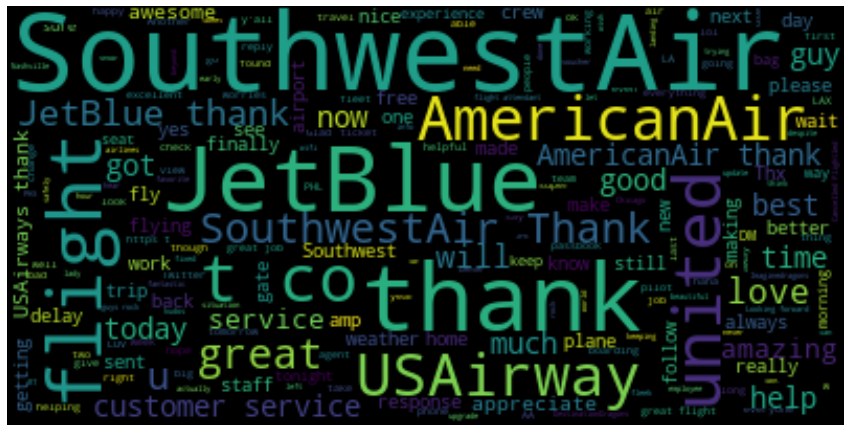

In [ ]:
# Import the word cloud function
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image
my_cloud = WordCloud (background_color='black').generate(text_tweet)

# Display the generated wordcloud image
plt.figure(figsize=(15, 12))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()

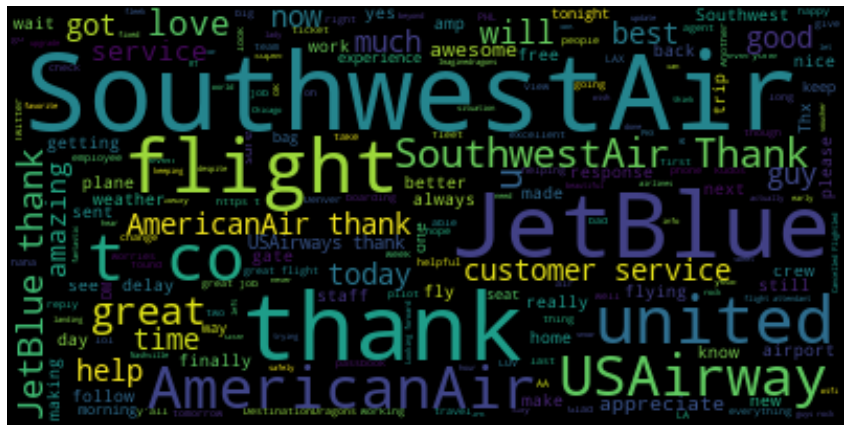

In [ ]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS

# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.figure(figsize=(15, 12))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")
# Don't forget to show the final image
plt.show()

#**Sentiment de la compagnie aérienne avec mots vides**
+ Vous recevez un ensemble de données, appelé tweets, qui contient les avis et les opinions des clients sur les compagnies aériennes.

+ Il se compose de deux colonnes : airline_sentiment et text où le sentiment peut être positif, négatif ou neutre, et le text est le texte du tweet.

+ Dans cet exercice, vous créerez une représentation BOW mais vous prendrez en compte les mots vides.

+ N'oubliez pas que les mots vides ne sont pas informatifs et que vous voudrez peut-être les supprimer.

+ Cela se traduira par un vocabulaire plus petit et, éventuellement, moins de fonctionnalités.

+ Gardez à l'esprit que nous pouvons enrichir une liste par défaut de mots vides avec ceux qui sont spécifiques à notre contexte.

####**Des instructions**

+ Importez la liste par défaut des mots vides en anglais.
+ Mettez à jour la liste par défaut des mots vides avec la liste donnée ['airline', 'airlines', '@']à créer my_stop_words.
+ Spécifiez l'argument des mots vides dans le vectoriseur.

In [ ]:
tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  000  000114  000419  000ft  000lbs  0011  0016  00a  00am  ...  \
0   0    0       0       0      0       0     0     0    0     0  ...   
1   0    0       0       0      0       0     0     0    0     0  ...   
2   0    0       0       0      0       0     0     0    0     0  ...   
3   0    0       0       0      0       0     0     0    0     0  ...   
4   0    0       0       0      0       0     0     0    0     0  ...   

   zrh_airport  zsdgzydnde  zsuztnaijq  ztrdwv0n4l  zukes  zurich  zv2pt6trk9  \
0            0           0           0           0      0       0           0   
1            0           0           0           0      0       0           0   
2            0           0           0           0      0       0           0   
3            0           0           0           0      0       0           0   
4            0           0           0           0      0       0           0   

   zv6cfpohl5  zvfmxnuelj  zzps5ywve2  
0           0           0         

####**Plusieurs colonnes de texte**

+ Dans cet exercice, vous continuerez à travailler avec les données Twitter de la compagnie aérienne. Un ensemble de données tweets a été importé pour vous.

+ Dans certaines situations, vous pouvez avoir plusieurs colonnes de texte dans un jeu de données et vous pouvez créer une représentation numérique pour chacune des colonnes de texte.

+ Ici, outre la textcolonne, qui contient le corps du tweet, il y a une deuxième colonne de texte, appelée negativereason.

+ Il contient la raison pour laquelle le client a laissé un avis négatif.

+ Votre tâche consiste à créer des représentations BOW pour les deux colonnes et à spécifier les mots vides requis.

####**Des instructions**

+ Importez le package vectorizer et la liste par défaut des mots vides en anglais.
+ Mettez à jour la liste par défaut des mots vides en anglais et créez l' my_stop_wordsensemble.
+ Spécifiez l'argument des mots vides dans le premier vectoriseur pour l'ensemble mis à jour, et dans le deuxième vectoriseur - le jeu par défaut de mots vides en anglais.

In [ ]:
tweets = pd.read_csv("/content/Tweets.csv")

In [ ]:
tweets.rename(columns= {"negativereason":"negative_reason"}, inplace=True)

In [ ]:
# Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])

# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
vect1.fit(tweets.text)
vect2.fit(tweets.negative_reason.values.astype('U'))

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names_out()[-15:])
print("*****"*10)
print(vect2.get_feature_names_out())

['zoom' 'zouowgv3q6' 'zpz78poeon' 'zqutus7epw' 'zrh' 'zrh_airport'
 'zsdgzydnde' 'zsuztnaijq' 'ztrdwv0n4l' 'zukes' 'zurich' 'zv2pt6trk9'
 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']
**************************************************
['attendant' 'bad' 'booking' 'cancelled' 'complaints' 'customer' 'damaged'
 'flight' 'issue' 'late' 'longlines' 'lost' 'luggage' 'nan' 'problems'
 'service' 'tell']


###**1. Capturer un modèle de jeton**
+ Vous avez peut-être remarqué en travaillant avec les données de sentiment des compagnies aériennes de Twitter que le texte contient de nombreux chiffres et autres caractères.

+ Parfois, nous pouvons vouloir les exclure de notre représentation numérique.

###**2. Opérateurs de chaîne et comparaisons**

+ Si nous travaillons avec une chaîne, comment pouvons-nous être sûrs de n'extraire que certains caractères ?

+ Il y a quelques fonctionnalités utiles que nous allons passer en revue ici.

+ Nous pouvons utiliser des opérateurs de comparaison de chaînes, tels que
  + **.isaplha()**, qui renvoie true si une chaîne est composée uniquement de lettres et false sinon ;
  + **.isdigits()** renvoie vrai si une chaîne est composée uniquement de chiffres ;
  + et enfin **.isalnum()** renvoie true si une chaîne est composée uniquement de caractères alphanumériques, c'est-à-dire des lettres et des chiffres.




In [ ]:
my_string = '#Wonderfulday'
# Checks if a string is composed only of letters
print("***"*10)
print(my_string.isalpha())
print("***"*10)
# Checks if a string is composed only of digits
print(my_string.isdigit())
print("***"*10)
# Checks if a string is composed only of alphanumeric characters
print(my_string.isalnum())
print("***"*10)

******************************
False
******************************
False
******************************
False
******************************


####**3. Opérateurs de chaîne avec compréhension de liste**

+ Les opérateurs de chaîne peuvent améliorer certaines des fonctionnalités que nous avons créées précédemment.

+ Pour rappel, dans une vidéo précédente, nous avons utilisé une compréhension de liste pour parcourir chaque avis de l'ensemble de données d'avis de produits et créer des jetons de mots à partir de chaque avis.

+ Nous pouvons ajuster notre code d'origine. Si l'on souhaite ne retenir que les jetons constitués de lettres par exemple, on peut utiliser l'opérateur **.isaplha() dans une deuxième compréhension de liste**.

+ Étant donné que le résultat de la première compréhension de liste est une liste de listes, nous devons d'abord parcourir les éléments de chaque liste interne, en filtrant les jetons qui ne sont pas des lettres.

+ C'est ce qui se passe dans la première partie de la liste de compréhension, entre parenthèses intérieures.

+ Dans la deuxième partie, nous parcourons les listes, en disant essentiellement que nous voulons effectuer ce filtrage sur toutes les listes de la liste word_tokens.



In [ ]:
import pandas as pd
reviews = pd.read_csv("/content/amazon_reviews_sample.csv")

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize
# Original word tokenization
word_tokens = [word_tokenize(review) for review in reviews.review]
# Keeping only tokens composed of letters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
len(word_tokens[0])

87

In [ ]:
len(cleaned_tokens[0])

78

####**4. Expressions régulières**
+ **Les expressions régulières sont un moyen standard d'extraire certains caractères d'une chaîne**.

+ Python a un package intégré, appelé **re, qui vous permet de travailler avec des expressions régulières**.

+ Nous n'aborderons pas les expressions régulières en profondeur ici mais, un petit rappel sur la syntaxe. Nous importons le package re.

+ Imaginez ensuite que nous ayons une chaîne #Wonderfulday et que nous voulions extraire un hachage (#) suivi de n'importe quelle lettre, majuscule ou minuscule.

+ Une méthode standard consiste à appeler la fonction de recherche sur notre chaîne, en spécifiant l'expression régulière.

+ Dans notre cas, il commence par un # et est suivi d'une lettre majuscule ou minuscule.

+ Lorsque nous imprimons le résultat, nous voyons qu'il s'agit d'un objet de correspondance, indiquant la taille de la correspondance - dans notre cas, l'étendue est de 2, ainsi que les caractères exacts qui ont été mis en correspondance.



In [ ]:
import re
my_string = '#Wonderfulday'
# Extract #, followed by any letter, small or capital
x = re.search('#[A-Za-z]', my_string)

In [ ]:
x

<re.Match object; span=(0, 2), match='#W'>

####**5. Modèle de jeton avec un BOW**
+ Notre **CountVectorizer** familier prend une expression régulière comme argument.

+ Le modèle par défaut utilisé correspond aux mots composés d'au moins deux lettres ou chiffres (\w) et séparés par des limites de mots (\b).

+ Il ignorera les mots à une seule lettre et divisera les mots tels que "ne pas" et "n'ai pas".

+ Si nous sommes d'accord avec ce modèle par défaut, nous n'avons pas besoin de modifier les arguments dans le CountVectorizer.

+ Si nous voulons le changer, nous pouvons spécifier l'argument token_pattern.

+ Si nous voulons que le vectoriseur ignore les chiffres et autres caractères et ne considère que les mots de deux lettres ou plus, nous pouvons utiliser le modèle de jeton spécifié.

+ En fait, il existe plusieurs façons de le spécifier. Cela ne signifie pas que celui spécifié ici est le seul moyen correct ou le meilleur pour y parvenir. N'hésitez pas à expérimenter cela. Notez, cependant,




In [ ]:
# Default token pattern in CountVectorizer
'\b\w\w+\b'
# Specify a particular token pattern
CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b')


CountVectorizer(token_pattern='\\b[^\\d\\W][^\\d\\W]+\\b')

####**6. Entraînons-nous !**
+ Passons aux exercices où vous pouvez appliquer les choses que vous avez apprises ici !

#**EXERCICE**
####**Spécifiez le modèle de jeton**

+ Dans cet exercice, vous travaillerez avec la textcolonne du jeu de données tweets.

+ Votre tâche consiste à vectoriser la colonne d'objet à l'aide de CountVectorizer.

+ Vous appliquerez différents modèles de jetons dans le vectoriseur.

+ N'oubliez pas qu'en spécifiant le modèle de jeton, vous pouvez filtrer les caractères.

+ Le CountVectorizer a été importé pour vous.

####**Consignes**

+ Construisez un vectoriseur à partir de la textcolonne en utilisant les valeurs par défaut des arguments de la fonction.
+ Construisez un deuxième vectoriseur, en spécifiant le modèle de jetons égal à **r'\b[^\d\W][^\d\W]'**.




In [ ]:
# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names_out()))

Length of vectorizer:  11893


+ Construisez un vectoriseur à partir de la textcolonne en utilisant les valeurs par défaut des arguments de la fonction.
+ Construisez un deuxième vectoriseur, en spécifiant le modèle de jetons égal à **r'\b[^\d\W][^\d\W]'**.

In [ ]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names_out()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names_out()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


####**Opérateurs de chaîne avec les données Twitter**
+ Vous continuez à travailler avec les données où la colonne stocke le contenu de chaque tweet. tweetstext

+ Votre tâche consiste à transformer la colonne en une liste de jetons. Ensuite, à l’aide d’opérateurs de chaîne, supprimez tous les caractères non alphabétiques de la liste de jetons créée.text

####**Instructions**

+ Importez la fonction de tokenisation de mots.
+ Créez des jetons de mots à partir de chaque tweet.
+ Filtrez tous les caractères non alphabétiques de la liste créée, c’est-à-dire ne conservez que les lettres.




In [ ]:
tweets = pd.read_csv("/content/Tweets.csv")

In [ ]:
# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


####**Plus d’opérateurs de chaînes et Twitter**
+ Dans cet exercice, vous allez appliquer différents opérateurs de chaîne à trois chaînes, sélectionnées dans le jeu de données. A a été créé pour vous.tweetstweets_list

Vous devez créer trois nouvelles listes en appliquant différents opérateurs de chaîne :

  + une liste ne conservant que des lettres
  + une liste ne conservant que des caractères
  + une liste ne conservant que des chiffres
  + Les fonctions requises ont été importées pour vous à partir de .nltk

####**Instructions**

+ Créez une liste des jetons à partir de .tweets_list
Dans la liste, supprimez tous les chiffres et autres caractères, c’est-à-dire ne conservez que les lettres.letters
+ Conservez les caractères alphanumériques, mais supprimez tous les autres caractères dans .let_digits
+ Créez en supprimant les lettres et les caractères et en ne conservant que des chiffres.digits

In [ ]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']



In [ ]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


###**Égrappage et lemmatisation**

####**1. Égrappage et lemmatisation**
>+ Dans une langue, **les mots sont souvent dérivés d’autres mots, ce qui signifie que les mots peuvent partager la même racine**. Lorsque nous créons une transformation numérique d’une fonction de texte, **nous pouvons souhaiter réduire un mot à sa racine**. C’est le sujet de cette leçon.

###**2. Qu’est-ce que le stemming?**
>+ **Ce processus s’appelle l’endiguement**. Plus formellement, **le stemming peut être défini comme la transformation des mots en leurs formes racines, même si la tige elle-même n’est pas un mot valide dans la langue**. Par exemple,  staying, stays, stayed sera mappé à la racine «stay», et house, houses, housing  seront mappés à la racine «hous». En général, le stemming aura tendance à couper les suffixes tels que '-ed', '-ing', '-er', ainsi que les formes plurielles ou possessives.

####**3. Qu’est-ce que la lemmatisation?**
>+ **La lemmatisation est un processus assez similaire à la stemming, à la principale différence qu’avec la lemmatisation, les racines résultantes sont des mots valides dans la langue**. Pour en revenir à nos exemples de mots dérivés de «stay», la lemmatisation les réduit à «stay» ; et les mots dérivés de «house» sont réduits au substantif «house».

####**4. Stemming vs lemmatisation**
>+ **Vous vous demandez peut-être quand utiliser le stemming et quand la lemmatisation. La principale différence réside dans les racines obtenues**. Avec la lemmatisation, ce sont des mots réels et avec la tige, ils pourraient ne pas l’être. **Donc, si dans votre problème, il est important de retenir les mots, pas seulement les racines, la lemmatisation serait plus appropriée**. Cependant, si vous utilisez nltk - ce que nous utiliserons dans ce cours - **le stemming suit un algorithme qui le rend plus rapide que le processus de lemmatisation dans nltk**. De plus, la lemmatisation dépend de la connaissance de la partie du discours du mot que vous voulez lemmatiser. Par exemple, si nous voulons transformer un nom, un verbe, un adjectif, etc.

####**5. Dérivation des cordes(Stemming of strings)**
>+ **Une bibliothèque de stemming populaire est le PorterStemmer dans le package nltk.stem**. **Le PorterStemmer n’est pas le seul stemmer en nltk**, mais il est assez rapide et facile à utiliser, c’est donc souvent un choix standard. Nous appelons la fonction PorterStemmer et la stockons sous le nom de porter. Nous pouvons alors appeler porter.stem sur une corde, par exemple, « merveilleux ». Le résultat est «merveille ».



In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('wonderful')

'wonder'

####**6. Stemmers non anglais (Non-English stemmers)**
>+ **Le stemming est également possible en utilisant d’autres langues, telles que le danois, le néerlandais, le Français, l’espagnol, l’allemand, etc**.

>+ **Pour utiliser des stemmers en langue étrangère, nous devons utiliser le package SnowballStemmer**. Nous pouvons spécifier dans le stemmer la langue étrangère que nous voulons utiliser. Ensuite, nous appliquons la fonction stem sur notre chaîne. Par exemple, nous avons importé un stemmer néerlandais et lui avons donné un verbe néerlandais. Le résultat est la racine du verbe.



**SnowballStemmer**:
+ Danish,
+ Dutch,
+ English,
+ Finnish,
+ French,
+ German,
+ Hungarian,
+ Italian,
+ Norwegian,
+ Portuguese,
+ Romanian,
+ Russian,
+ Spanish,
+ Swedish

In [ ]:
from nltk.stem.snowball import SnowballStemmer
DutchStemmer = SnowballStemmer("dutch")
DutchStemmer.stem("beginnen")

'beginn'

####**7. Comment endiguer une phrase? (How to stem a sentence?)**
>+ **Si vous appliquez le PorterStemmer sur une phrase, le résultat est la phrase d’origine**. Nous voyons que rien n’a changé dans notre phrase « Aujourd’hui est un jour merveilleux ! ».

>+ Nous devons endiguer chaque mot de la phrase séparément. **Par conséquent, dans un premier temps, nous devons transformer la phrase en jetons en utilisant la fonction familière word_tokenize**.

>+ Dans la deuxième étape, **nous appliquons la fonction stemming sur chaque mot de la phrase, en utilisant une compréhension de liste.**



In [ ]:
porter.stem('Today is a wonderful day!')

'today is a wonderful day!'

In [ ]:
tokens = word_tokenize('Today is a wonderful day!')
stemmed_tokens = [porter.stem(token) for token in tokens]
stemmed_tokens

['today', 'is', 'a', 'wonder', 'day', '!']

####**8. Lemmatisation d’une chaîne**
>+ **La lemmatisation des cordes est similaire à la tige**.

>+ **Nous importons WordNetLemmatizer à partir de la bibliothèque nltk.stem**.

>+ Il utilise la base de données WordNet pour rechercher des lemmes de mots.

>+ Nous appelons la ***fonction WordNetLemmatizer et la stockons sous le nom de WNlemmatizer**.

>+ Nous pouvons alors appeler **WNlemmatizer.lemmatize()** sur 'merveilleux'.

>+ Notez que nous avons spécifié une partie du discours, donnée par l’argument « pos ». Le pos par défaut est nom, ou 'n'. Ici, nous spécifions un adjectif, c’est pourquoi pos = 'a'. Le résultat est « merveilleux ». Si vous vous en souvenez, l’endiguement a renvoyé « merveille » en conséquence.



In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
WNlemmatizer = WordNetLemmatizer()
WNlemmatizer.lemmatize('wonderful', pos='a')


'wonderful'

####**9. Pratiquons!**
+ Résolvons quelques exercices et renforçons les concepts liés à l’endiguement et à la lemmatisation.

##**Exercice**

####**Tiges et lemmes de GoT**

+ Dans cet exercice, on vous donne quelques phrases de Game of Thrones de George R.R. Martin.

+ Votre tâche consiste à créer des tiges et des lemmes à partir de la chaîne donnée.GoT

+ Rappelez-vous que les tiges réduisent un mot à sa racine alors que les lemmes produisent un mot réel.

+ Cependant, la vitesse peut différer considérablement entre les méthodes, l’endiguement étant beaucoup plus rapide.

+ Dans les étapes 2 et 3, faites attention au temps total qu’il faut pour effectuer chaque opération.

+ Nous utilisons la méthode pour mesurer le temps nécessaire pour effectuer l’égrappage et la lemmatisation.

          time.time()

####**Instructions**

+ Importez les fonctions de stemming et de lemmatisation.
+
Créez une liste de jetons à partir de la chaîne.GoT

In [ ]:
GoT = """
Never forget what you are, for surely the world will not.
Make it your strength. Then it can never be your weakness.
Armour yourself in it, and it will never be used to hurt you.
"""


In [ ]:
# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the GoT string
tokens = word_tokenize(GoT)
tokens

['Never',
 'forget',
 'what',
 'you',
 'are',
 ',',
 'for',
 'surely',
 'the',
 'world',
 'will',
 'not',
 '.',
 'Make',
 'it',
 'your',
 'strength',
 '.',
 'Then',
 'it',
 'can',
 'never',
 'be',
 'your',
 'weakness',
 '.',
 'Armour',
 'yourself',
 'in',
 'it',
 ',',
 'and',
 'it',
 'will',
 'never',
 'be',
 'used',
 'to',
 'hurt',
 'you',
 '.']

+ À l’aide de la compréhension de liste et du stemmer que vous avez importé, créez la liste.porterstemmed_tokens

In [ ]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens)

Time taken for stemming in seconds:  0.001355886459350586
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


+ À l’aide de la compréhension de liste et de l’importation que vous avez importée, créez la liste.
      WNlemmatizerlem_tokens

In [ ]:
import time

# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens)

Time taken for lemmatizing in seconds:  0.0005893707275390625
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


####**Avis sur Stem Spanish**
+ Vous vous souviendrez que dans un chapitre précédent, nous avons utilisé un package de détection de langue pour déterminer la langue des différents avis sur les produits Amazon. Dans cet exercice, vous allez d’abord détecter les langues dans le fichier .

+ Les avis sont en plusieurs langues mais vous sélectionnerez UNIQUEMENT ceux en espagnol.

+ N’hésitez pas à revenir à la vidéo traitant de la détection des langues étrangères si vous avez oublié certains des concepts. **non_english_reviews**

+ Dans la deuxième étape, vous créerez des jetons de mots à partir des critiques espagnoles et les stemer en utilisant un stemmer SnowBall pour la langue espagnole. Le package de détection de langue n’est malheureusement pas parfait. Par conséquent, il est possible que parfois la langue détectée ne soit pas correcte.

###**Instructions**

+ Importez le package.langdetect
+ Itérez sur les lignes de la à l’aide de la méthode et de la fonction.non_english_reviewslen()range()
+ Permet de détecter la langue de chaque avis dans la boucle.detect_langs()for

In [ ]:
# Import the language detection package
import langdetect

# Loop over the rows of the dataset and append
languages = []
for i in range(len(non_english_reviews)):
    languages.append(langdetect.detect_langs(non_english_reviews.iloc[i, 1]))

# Clean the list by splitting
languages = [str(lang).split(':')[0][1:] for lang in languages]
# Assign the list to a new feature
non_english_reviews['language'] = languages

# Select the Spanish ones
filtered_reviews = non_english_reviews[non_english_reviews.language == 'es']
filtered_reviews.head()

,score,review,language
1259,1,La reencarnación vista por un científico: El ...,es
1260,1,Excelente Libro / Amazing book!!: Este libro ...,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,es
1639,1,El libro mas completo que existe para nosotra...,es
1745,1,Excelente!: Una excelente guía para todos aqu...,es


+ Importez le à partir du package respectif.SnowballStemmer
+ Créez des jetons de mots à partir de la colonne de l’étape précédente.
      filtered_reviews
+ Utilisez le stemmer espagnol que vous avez importé pour extraire la liste de jetons créée.

In [ ]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

# Create a list of tokens
tokens = [word_tokenize(review) for review in filtered_reviews.review]
# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokenss
print(stemmed_tokens[0])

['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']


####**Découle des tweets**

+ Dans cet exercice, vous allez travailler avec un tableau appelé . Il contient le texte des données de sentiment des compagnies aériennes collectées sur Twitter. tweets

+ Votre tâche consiste à travailler avec ce tableau et à le transformer en une liste de jetons à l’aide de la compréhension de liste. Après cela, itérez sur la liste des jetons et créez une tige à partir de chaque jeton. N’oubliez pas que les compréhensions de liste sont une alternative d’une ligne aux boucles.

####**Instructions**

+ Importez la fonction que nous avons utilisée pour transformer des chaînes en tiges.
+ Appelez la fonction Porter stemmer que vous venez d’importer.
+ À l’aide d’une compréhension de liste, créez la liste . Il doit contenir tous les jetons de mots du tableau.

      tokenstweets
+ Itérez sur la liste et appliquez la fonction de dérivation à chaque élément de la liste.tokens

In [ ]:
data = pd.read_csv("/content/Tweets.csv")
tweets = data.text

In [ ]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(word) for word in tweets]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens]
# Print the first element of the list
print(stemmed_tokens[0])

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


##**TfIdf : Plus de façons de transformer du texte**

####**1. TfIdf: Plus de façons de transformer le texte**

+ Nous avons beaucoup travaillé avec un BOW et l’avons appliqué à l’aide d’un **CountVectorizer en Python**.

+ Aussi puissant que BOW puisse être, nous pourrions parfois vouloir essayer des approches légèrement plus sophistiquées.

+ Dans cette vidéo, nous parlerons de l’un d’entre eux, une approche appelée **TfIdf - terme fréquence inverse fréquence du document**.

####**2. Quels sont les composants de TfIdf?**

+ **Le terme fréquence nous indique la fréquence à laquelle un mot donné apparaît dans un document du corpus**.

+ Chaque mot d’un document a sa propre fréquence de terme.

+ ***La fréquence inverse des documents est généralement définie comme le rapport journalaire entre le nombre total de documents et le nombre de documents contenant un mot spécifique. Ce que signifie la fréquence inverse des documents, c’est que les mots rares auront une fréquence de document inverse élevée.***

####**3. Score TfIdf d’un mot**
+ **Lorsque nous multiplions les scores tf et idf**, nous obtenons **le score TfIdf d’un mot dans un corpus**.

+ ***Avec BOW, les mots pouvaient avoir des nombres de fréquence différents d’un document à l’autre, mais nous n’avons pas tenu compte de la longueur d’un document; alors que la partition TfIdf d’un mot incorpore la longueur d’un document***.

+ **TfIdf mettra également en évidence les mots qui sont plus intéressants, c’est-à-dire les mots qui sont communs dans un document mais pas dans tous les documents.***

+ Cependant, notez qu’intéressant n’a pas à se rapporter à une critique positive ou négative. Il s’agit purement d’une approche non supervisée.

####**4. En quoi TfIdf est-il utile?**

+ **Dans notre analyse des sentiments twitter, les noms de compagnies aériennes telles que United et Virgin America sont susceptibles d’avoir de faibles scores TfIdf car ils se produisent plusieurs fois et sur de nombreux documents, c’est-à-dire des tweets**.

+ Si un tweet parle beaucoup du service d’enregistrement d’une entreprise et qu’il n’y a pas beaucoup d’autres tweets discutant du sujet, les mots de ce tweet sont susceptibles d’avoir un score TfIdf élevé.

+ **Notez que puisque TfIdf pénalise les mots fréquents**, il est moins nécessaire de définir explicitement les mots stop.

+ Nous pouvons toujours supprimer les mots d’arrêt, bien sûr, pour restreindre la taille de notre vocabulaire.

+ Même si TfIdf est relativement simple, il est assez couramment utilisé dans la recherche d’informations et les moteurs de recherche comme un moyen de classer la pertinence des requêtes renvoyées.

####**5. TfIdf en Python**
+ **En Python, vous pouvez appliquer TfIdf en important le TfidfVectorizer à partir de sklearn.feature_extraction.text.**

+ **Le TfIdfVectorizer est similaire au CountVectorizer, tout comme les arguments qu’il prend**.

+ Nous pouvons définir **le nombre maximal d’entités par max_feature**s, **le type de n-grammes à utiliser en spécifiant ngram_range**, **l’argument stop_words**, **token_pattern, max_df et min_df**.

+ Nous adaptons le TfidfVectorizer à la colonne de texte du jeu de données tweets. Ensuite, nous le transformons, de la même manière que nous l’avons fait avec le CountVectorizer.



In [ ]:
# import dataset
tweets = pd.read_csv("/content/Tweets.csv")

# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(tweets.text)
X = vect.transform(tweets.text)


####**6. TfidfVectorizer**
+ **Le Tfidfvectorizer renvoie également une matrice clairsemée**.

+ Si vous vous souvenez, **une matrice clairsemée est une matrice avec des valeurs principalement nulles, stockant uniquement les valeurs non nulles**.

+ Nous devons transformer la matrice clairsemée en tableau et spécifier les noms des entités, en utilisant la même syntaxe qu’avec le CountVectorizer.

+ En inspectant les 5 premières lignes du jeu de données nouvellement créé, nous constatons que la sortie est assez similaire à un BOW.

+ Chaque colonne est une fonctionnalité et chaque ligne contient le score TfIdf de la fonctionnalité dans un tweet donné. Les valeurs sont des nombres flottants, et beaucoup d’entre eux sont nuls.



In [ ]:
X

<14640x100 sparse matrix of type '<class 'numpy.float64'>'
	with 119182 stored elements in Compressed Sparse Row format>

In [ ]:
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
X_df.head()

,about,after,again,airline,all,am,americanair,amp,an,and,...,was,we,what,when,why,will,with,would,you,your
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.668165,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.32904,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.431149,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.332355
4,0.494872,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.279754,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000


####**7. Pratiquons!**
+ Terminons notre discussion sur la transformation numérique des données textuelles en résolvant quelques exercices à l’aide de TfIdf.

+ Rendez-vous dans la prochaine vidéo !

#**Exercice**

####**Votre premier TfIdf**

+ Dans cet exercice, vous appliquerez la méthode TfIdf au petit jeu de données contenant la première phrase d'Anna Karénine de Léon Tolstoï.annak.

+ Votre tâche consistera à travailler avec ce jeu de données et à appliquer la fonction.

+ Rappelez-vous qu'effectuer une transformation numérique du texte est la première étape pour pouvoir comprendre le sentiment du texte.

+ Le vectoriseur Tfidf est une autre façon de construire un vocabulaire à partir de notre colonne de sentiments.
      TfidfVectorizer()

####**Instructions**

+ Importez la fonction pour construire un vectoriseur TfIdf de **.sklearn.feature_extraction.text**.
+ Appelez la fonction et ajustez-la sur le jeu de données annak.
      TfidfVectorizer()
+ Transformer le vectoriseur.



In [ ]:
# Import the required function
from sklearn.feature_extraction.text import TfidfVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer(max_features=100).fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result
print(anna_tfidf.toarray())

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


####**TfIdf sur Twitter données de sentiment des compagnies aériennes**
+ Vous allez maintenant créer des fonctionnalités à l’aide de la méthode TfIdf. Vous continuerez à travailler avec le jeu de données.
      tweets

+ Dans cet exercice, vous utiliserez ce que vous avez appris dans les leçons précédentes et supprimerez les mots d’arrêt, utiliserez un modèle de jeton et spécifierez les n-grammes.

+ La sortie finale sera un DataFrame, dont les colonnes sont créées à l’aide du fichier . Un tel DataFrame peut être directement transmis à un modèle d’apprentissage supervisé, ce que nous aborderons dans le chapitre suivant.
      TfidfVectorizer()

####**Instructions**

+ Importez le package requis pour créer un TfidfVectorizer et le fichier .ENGLISH_STOP_WORDS

+ Construisez un vectoriseur TfIdf à partir de la colonne du jeu de données, en spécifiant des uni- et bi-grammes comme un choix de n-grammes, des jetons qui incluent uniquement des caractères alphanumériques en utilisant le modèle de jeton donné, et les mots stop correspondant au .
        tweets.text
        ENGLISH_STOP_WORDS
+ Transformez le vectoriseur en spécifiant la même colonne que celle que vous ajustez.
+ Spécifiez les noms des colonnes dans la fonction.
        DataFrame()

In [ ]:
help(TfidfVectorizer)

Help on class TfidfVectorizer in module sklearn.feature_extraction.text:

class TfidfVectorizer(CountVectorizer)
 |  TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
 |  
 |  Convert a collection of raw documents to a matrix of TF-IDF features.
 |  
 |  Equivalent to :class:`CountVectorizer` followed by
 |  :class:`TfidfTransformer`.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : {'filename', 'file', 'content'}, default='content'
 |      - If `'filename'`, the sequence passed as an argument to fit is
 |        expected to be a list of filenames that need reading to fetc

In [ ]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:      aa  agent  airline  airport  americanair       amp  bag  baggage  bags  \
0  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
3  0.0    0.0      0.0      0.0          0.0  0.537247  0.0      0.0   0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   

   cancelled  ...        ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0  ...  0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0  ...  0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0  ...  0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0  ...  0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0  ...  0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst

####**Tfidf et un BOW sur les mêmes données**
+ Dans cet exercice, vous allez transformer la colonne du produit Amazon à l’aide d’un sac de mots et d’une transformation tfidf.

      reviews.review

+ Construisez les deux vectoriseurs, en spécifiant uniquement le nombre maximal d’entités à égaler à . Créez des DataFrames après la transformation et imprimez les 5 premières lignes de chacune.

+ Faites attention à la façon dont vous spécifiez le nombre maximal de fonctionnalités dans le vocabulaire. Une grande taille de vocabulaire peut entraîner la déconnexion de votre session.

####**Instructions**

+ Importez les vectoriseurs BOW et Tfidf.
+ Créez et ajustez un vectoriseur BOW et Tfidf à partir de la colonne et limitez le nombre de fonctions créées à 100.
      review
+ Créez des DataFrames à partir des représentations vectorielles transformées.

In [ ]:
# Import the required packages
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review)

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)
# Create DataFrames from the vectorizers
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names_out())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using BOW: 
    about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all  also   am       an       and       any  \
0    0.0  0.000000  0.138970   0.0  0.0  0.00000  0.140823  0.000000   
1    0.0  0.000000  0.000

####**Prédisons le sentiment!**

####**1. Prédisons le sentiment!**
Dans ce dernier chapitre, nous utiliserons un modèle d’apprentissage supervisé pour prédire le sentiment.

####**2. Problèmes de classification**

+ Imaginez que nous travaillons avec les critiques de produits.
+ **Une tâche d’apprentissage supervisé tentera de classer tout nouvel avis comme positif ou négatif en fonction des avis déjà étiquetés**.

+ C’est ce que nous appelons un problème de **classification**.

+ Dans le cas des critiques de produits et de films, nous avons deux classes - positives et négatives.

+ Il s’agit d’un problème de classification binaire. Les données Twitter sur le sentiment des compagnies aériennes ont trois catégories de sentiments: **positif, neutre et négatif**. Il s’agit d’un problème de **classification multi-classes**.

####**3. Régressions linéaires et logistiques**

+ Un algorithme couramment appliqué dans les tâches de classification est une **régression logistique**.

+ Vous connaissez peut-être une régression linéaire, où nous ajustons une ligne droite pour approximer une relation, illustrée dans le graphique de gauche.

+ Avec une régression logistique, au lieu d’ajuster une ligne, nous ajustons une courbe en forme de S, appelée fonction sigmoïde. Une propriété de cette fonction est que pour toute valeur de x, y sera compris entre 0 et 1.



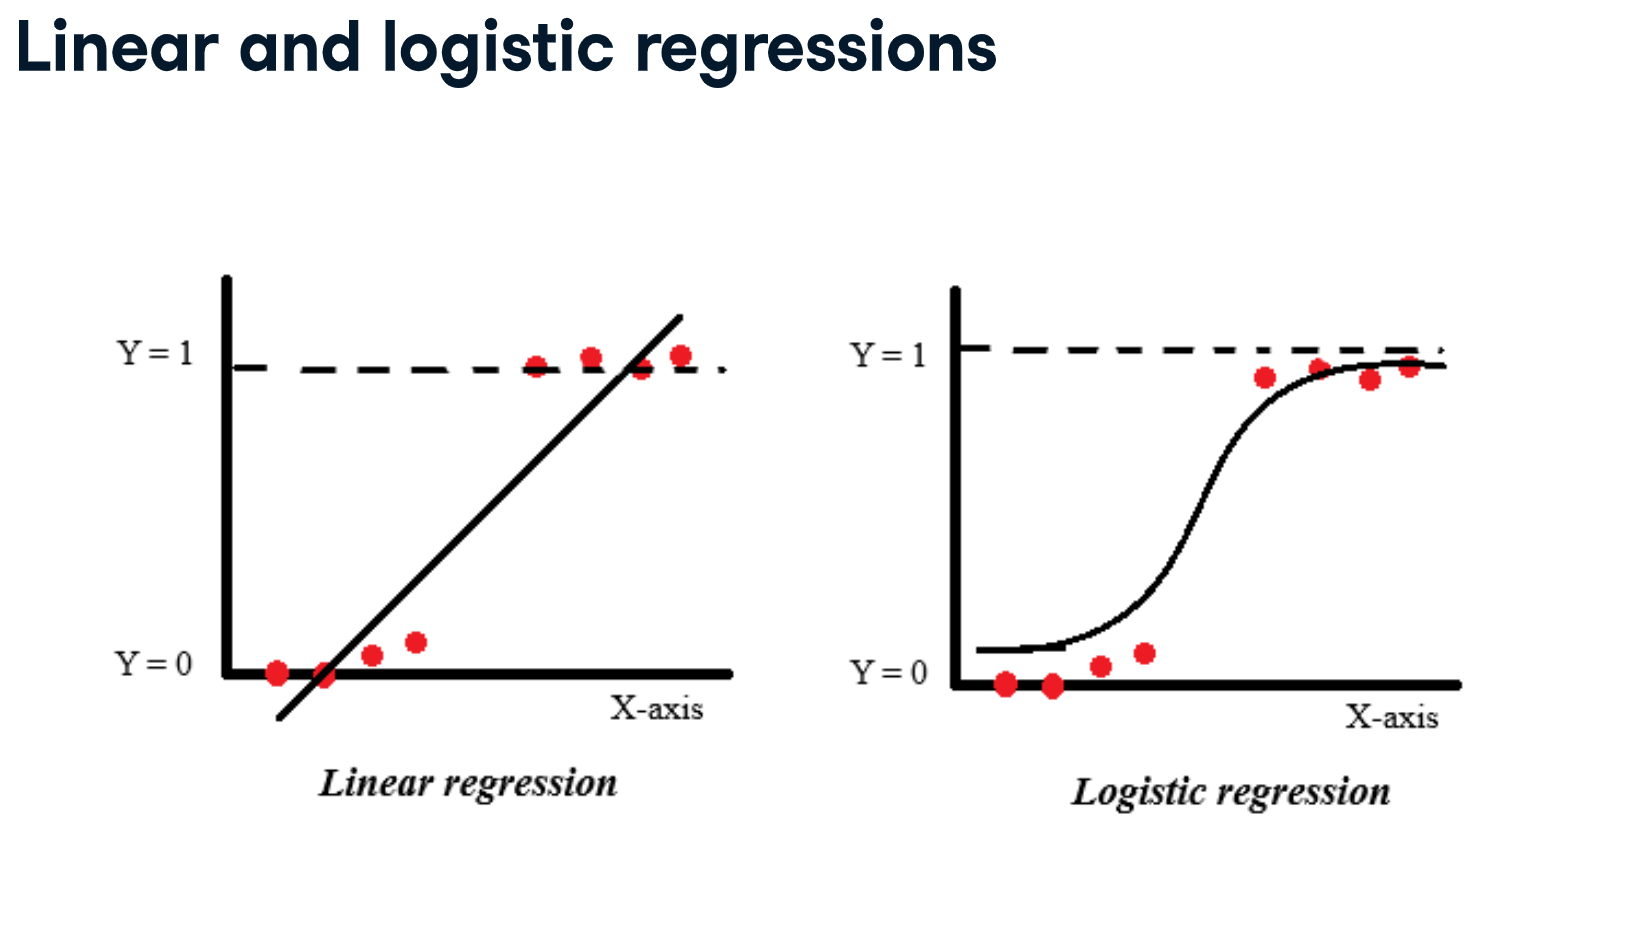

####**4. Fonction logistique**
+ **Lorsque nous effectuons une régression linéaire, nous prédisons un résultat numérique (disons le prix de vente d’une maison)**.

+ ***Avec la régression logistique, nous estimons la probabilité que le résultat (sentiment) appartienne à une catégorie particulière (positive ou négative) compte tenu de la revue***.

+ Puisque nous estimons une probabilité et que nous voulons **une sortie comprise entre 0 et 1, nous modélisons les valeurs X en utilisant la fonction sigmoïde/logistique, comme indiqué sur le graphique**.


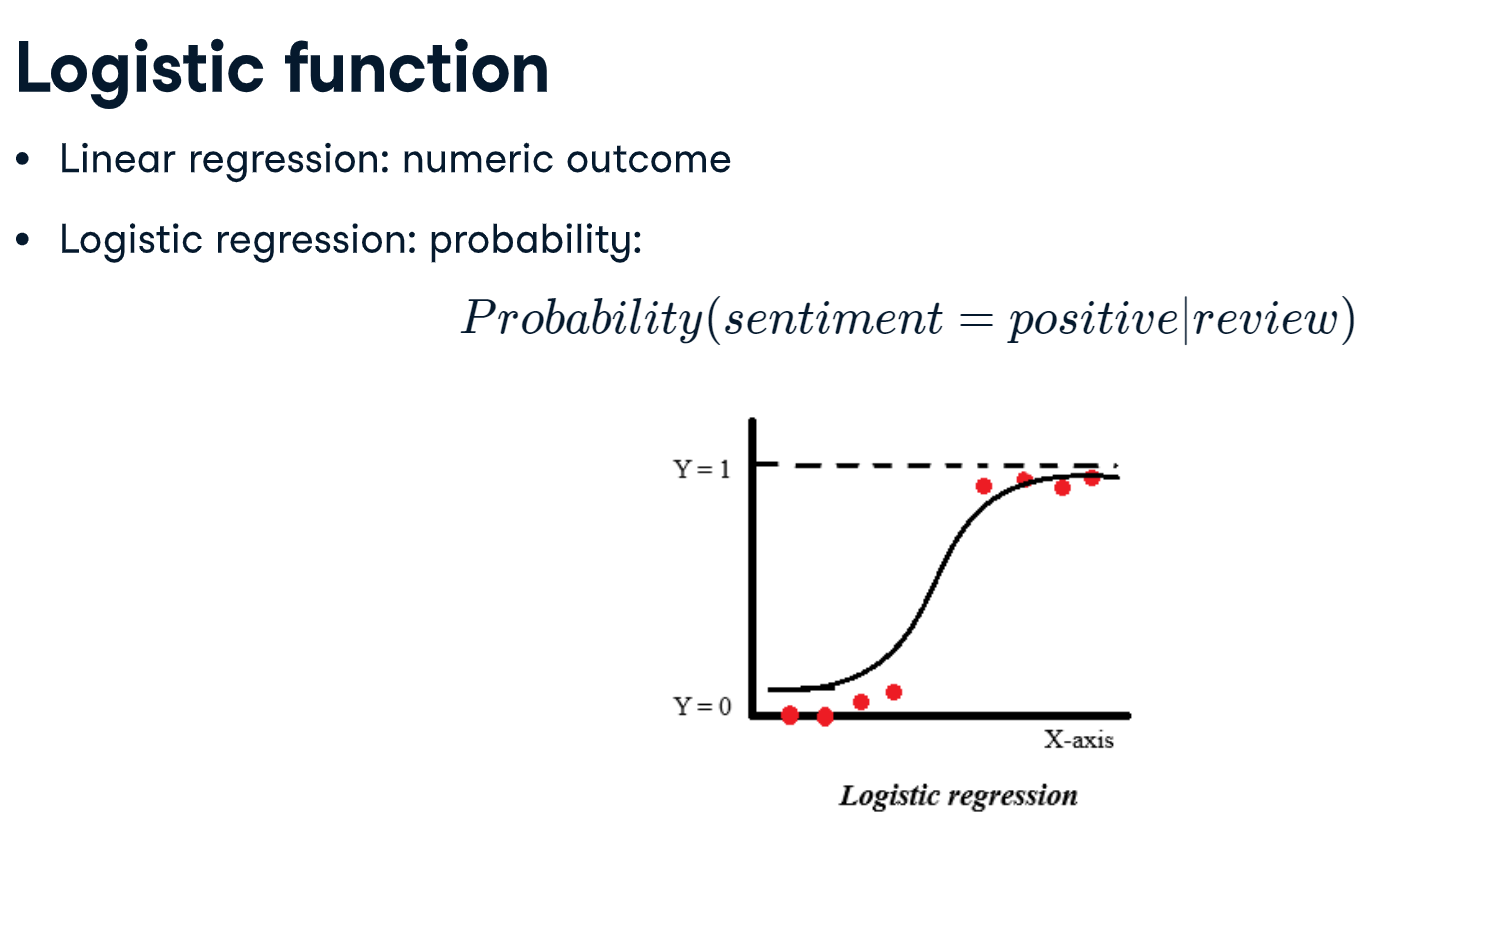

####**5. Régression logistique en Python**
+ **En Python, nous importons la LogisticRegression à partir de la bibliothèque sklearn.linear_model**.

+ Gardez à l’esprit que l’API sklearn ne fonctionne qu’avec des variables continues.

+ Il nécessite également un DataFrame ou un tableau comme arguments et ne peut pas gérer les données manquantes.

+ Par conséquent, toute transformation des données doit être achevée au préalable.

+ Nous appelons la fonction de régression logistique et créons un objet classificateur logistique.

+ Nous l’adaptons en spécifiant la matrice X, qui est un tableau numpy de nos fonctionnalités ou un DataFrame pandas, et le vecteur des cibles y.

In [ ]:
# import dataset
tweets = pd.read_csv("/content/Tweets.csv")
tweets.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [ ]:
# import dataset
tweets = pd.read_csv("/content/Tweets.csv")

# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(tweets.text)
X = vect.transform(tweets.text)
y = tweets["airline_sentiment"]

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X,y)


In [ ]:
log_reg.get_params()
help(log_reg)

####**6. Mesurer la performance du modèle**
+ Comment savons-nous si le modèle est bon? Nous examinons **l’écart entre l’étiquette prédite et l’étiquette réelle pour chaque instance (observation) de notre ensemble de données**.

+ Une mesure courante à utiliser est le score de précision. Bien qu’il ne soit pas approprié dans tous les contextes, il est toujours utile.

+ La précision nous donne la fraction des prédictions que notre modèle a correctement obtenues.

+ Plus il est élevé et proche de 1, mieux c’est.

+ Une façon de calculer le score de précision d’un modèle de régression logistique consiste à appeler la méthode de score sur l’objet de régression logistique. Il prend comme arguments **la matrice X et le vecteur y**.



In [ ]:
# Accuracy using score
score = log_reg.score(X, y)
print(score)

0.7389344262295082


####**7. Utilisation du score de précision**

+ Alternativement, nous pouvons utiliser la fonction **accuracy_score de sklearn.metrics**.

+ Il existe une fonction accuracy_score en dehors de la fonction de score car différents modèles ont des métriques de score par défaut différentes.

+ Ainsi, la fonction accuracy_score renvoie toujours la précision, mais la fonction score peut renvoyer d’autres métriques si nous l’utilisons pour évaluer d’autres modèles.

+ Ici, nous devons calculer explicitement les prédictions du modèle, en appelant prédire sur la matrice des entités.

+ Le score de précision prend comme arguments le vecteur des vraies étiquettes et des étiquettes prédites.

+ Nous voyons dans le cas de la régression logistique, le score et la précision du score renvoient une valeur de 0,9009.


In [ ]:
# Accuracy using accuracy_score
from sklearn.metrics import accuracy_score
y_predicted = log_reg.predict(X)
acurracy = accuracy_score(y, y_predicted)
acurracy

0.7389344262295082


####**8. Pratiquons!**

+ Pouvons-nous faire confiance à une telle précision ? Nous devrions être prudents lorsque nous tirons des conclusions solides pour l’instant.

+ Dans la partie suivante, nous verrons comment vérifier la robustesse des performances du modèle, mais avant cela, résolvons quelques exercices!

####**Régression logistique des critiques de films**

+ Dans la partie ci-dessus, nous avons appris que la régression logistique est un moyen courant de modéliser une tâche de classification, telle que la classification du sentiment comme positif ou négatif.

+ Dans cet exercice, vous allez travailler avec le jeu de données de révisions.

+ La colonne stocke le sentiment, c’est-à-dire lorsque l’avis est positif et lorsqu’il est négatif. La révision du texte a été transformée, à l’aide de BOW, en colonnes numériques.

      movieslabel10

+ Votre tâche consiste à créer un modèle de régression logistique à l’aide du jeu de données et à calculer sa précision.

      movies

####**Instructions**

+ Importez la fonction de régression logistique.
+ Créez et ajustez une régression logistique sur les étiquettes et les fonctions.
+ Calculez la précision du modèle de régression logistique à l’aide de la méthode par défaut.
      .score()

In [ ]:
data = pd.read_csv("/content/IMDB_sample.csv")
movies = data[["review", "label"]]
movies.head()

,review,label
0,This short spoof can be found on Elite's Mille...,0
1,A singularly unfunny musical comedy that artif...,0
2,"An excellent series, masterfully acted and dir...",1
3,The master of movie spectacle Cecil B. De Mill...,1
4,I was gifted with this movie as it had such a ...,0


+ Define the vector of targets and matrix of features
      y = movies.label
      X = movies.drop('label', axis=1)

In [ ]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(movies.review)
X = vect.transform(movies.review)
y = movies.label

In [ ]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  0.739234768697507


####**Régression logistique à l’aide des données Twitter**

+ Dans cet exercice, vous allez créer un modèle de régression logistique à l’aide du jeu de données.

+ La cible est donnée par le , qui est pour les tweets négatifs, pour les tweets neutres et pour les tweets positifs.

+ Donc, dans ce cas, vous recevez une tâche de classification multi-classes.

+  Tout ce que nous avons appris sur les problèmes binaires s’applique également aux problèmes de classification multi-classes.

        tweetsairline_sentiment012

+ Vous évaluerez la précision du modèle en utilisant les deux approches différentes des diapositives.

+ La fonction de régression logistique et le score de précision ont été importés pour vous.

####**Instructions**

+ Créez et ajustez un modèle de régression logistique à l’aide des arguments définis et en tant qu’arguments.
           X et y
+ Calculer la précision du modèle de régression logistique.
+ Prédisez les étiquettes.
+ Calculez le score de précision à l’aide des étiquettes prédites et vraies.

In [ ]:
# import dataset
tweets = pd.read_csv("/content/Tweets.csv")

# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(tweets.text)
X = vect.transform(tweets.text)
y = tweets["airline_sentiment"]

In [ ]:
# Define the vector of targets and matrix of features
X = vect.transform(tweets.text)
y = tweets["airline_sentiment"]

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X,y)
print('Accuracy of logistic regression: ', log_reg.score(X,y))

# Create an array of prediction
y_predict = log_reg.predict(X)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y_predict, y))

Accuracy of logistic regression:  0.7389344262295082
Accuracy of logistic regression:  0.7389344262295082


###**Avons-nous vraiment bien prédit le sentiment?**

####**1. Avons-nous vraiment bien prédit le sentiment?**

+ Dans la vidéo précédente, nous avons utilisé toutes les données disponibles pour construire un modèle de régression logistique et évaluer sa précision.

+ Cependant, nous voulons nous assurer que notre modèle d’apprentissage automatique généralise et fonctionne bien sur des données invisibles. **Comment faire ?**

####**2. Fractionnement train/test**

+ Pour avoir une idée de la performance d’un modèle sur des données invisibles, nous divisons aléatoirement l’ensemble de données en 2 parties:
  + **une utilisée pour la formation** (construction du modèle)
  + **une pour les tests** (évaluer les performances du modèle).

+ Dans certains cas, lorsque nous voulons régler les paramètres de notre algorithme, nous pouvons avoir 3 ensembles:
  + formation
  + test
  + validation

mais cela est hors de portée de notre cours.

+ L’ensemble d’entraînement représente généralement environ 70 ou 80% de l’ensemble de données, et le reste est utilisé pour les tests.



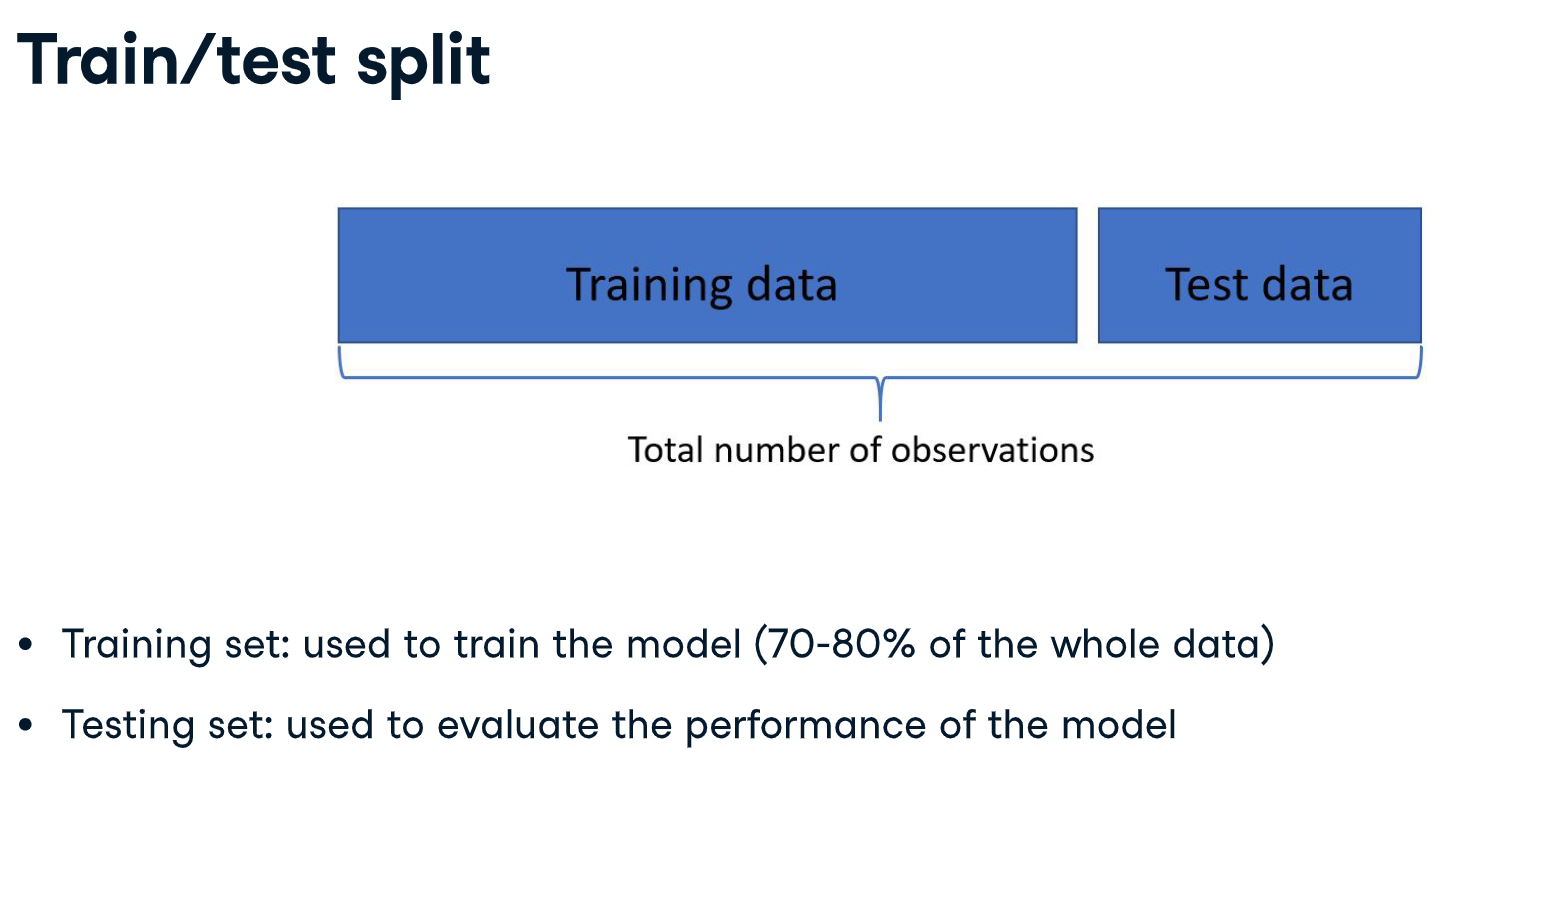

####**3. S’entraîner/tester en Python**

+ En Python, nous pouvons effectuer un fractionnement aléatoire train-test à l’aide de la fonction **train_test_split du package sklearn.model_selection**.

+ Il prend comme arguments des tableaux, des listes ou des DataFrames.

+ Les matrices **X-train et test et y-train et les vecteurs test sont la sortie de la train_test_split**.

+ Les premiers arguments que nous fournissons dans la fonction sont la matrice de caractéristiques X et le vecteur d’étiquettes y.

+ Nous pouvons spécifier la proportion des données destinées aux tests; ici, il est égal à 0,2.

+ Un autre paramètre est l’état aléatoire, qui est le générateur de graines utilisé pour effectuer la division aléatoire.

+ Il garantit que chaque fois que vous effectuez le fractionnement train-test sur les mêmes données, vous obtiendrez les mêmes instances dans chaque ensemble.

+ Nous pouvons également spécifier l’argument stratifier.

+ Si nous voulons nous assurer que le train et l’ensemble d’essai ont des proportions similaires des deux classes, nous pouvons le faire en spécifiant que la stratification est égale à y.



+ **X**:caractéristiques
+ **y**:étiquettes
+ **test_size** : proportion de données utilisées dans l'essai
+ **random_state**:générateur de graines utilisé pour effectuer le fractionnement
+ **stratify**:proportion de classes dans l'échantillon produit sera la même que la proportion de valeurs fournies pour ce paramètre.

In [ ]:
# import dataset
tweets = pd.read_csv("/content/Tweets.csv")

# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(tweets.text)
X = vect.transform(tweets.text)
y = tweets["airline_sentiment"]

In [ ]:
X.shape, y.shape

((14640, 100), (14640,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123, stratify=y)

####**4. Régression logistique avec fractionnement train/test**

+ Revenons sur notre exemple de régression logistique, exécuté après une scission train-test.

+ Nous créons l’objet LogisticRegression et l’intégrons sur le set d’entraînement.

+ Nous pouvons calculer la précision sur les données d’entraînement, en appelant le score sur la régression logistique avec des arguments X_train et y_train.

+ Nous pouvons également calculer le score de précision du modèle à l’aide de l’ensemble de tests
    - **X_test et y_test**.

+ Il est légèrement inférieur à la précision des données d’entraînement, ce qui est généralement le cas.



In [ ]:
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on training data: ', log_reg.score(X_train, y_train))
print('Accuracy on testing data: ', log_reg.score(X_test, y_test))

Accuracy on training data:  0.7399248633879781
Accuracy on testing data:  0.726775956284153


####**5. Score de précision avec fractionnement train/test**

+ Vous vous souvenez peut-être qu’une autre façon de calculer la précision consistait à utiliser **la fonction accuracy_score à partir de sklearn.metrics**.

+ Après avoir construit le modèle de régression logistique, nous appliquons la prédiction à la régression logistique en spécifiant X_test comme argument.

+ Dans la dernière étape, nous appelons le score de précision sur les étiquettes vraies et prédites.

+ La valeur est identique à la précision produite par la fonction de score.



In [ ]:
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression().fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)
print('Accuracy score on test data: ', accuracy_score(y_test, y_predicted))


Accuracy score on test data:  0.726775956284153


####**6. Matrice de confusion**

+ **La précision est une mesure utile des performances d’un modèle, mais ce n’est pas toujours la plus informative**.

+ Nous pouvons plutôt utiliser ce qu’on appelle **une « matrice de confusion »**.

+ Il affiche le nombre de valeurs prédites et réelles de chacune des classes, comme indiqué dans le tableau.

+ Une matrice de confusion nous permettra de calculer les valeurs dans chaque cellule et de dire combien d’observations de chaque classe nous avons prédit correctement.

####**7. Matrice de confusion en Python**
+ En Python, nous importons les confusion_matrix à partir du module sklearn.metrics.

+ Après avoir construit notre régression logistique et prédit les étiquettes des ensembles de tests, nous appelons la matrice de confusion où nous donnons comme arguments les étiquettes vraies et prédites.

+ Nous avons divisé la matrice par la longueur du vecteur y afin d’obtenir des proportions dans les cellules de la matrice.


In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression().fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_predicted)/len(y_test))

[[0.57377049 0.03551913 0.01741803]
 [0.1147541  0.0829918  0.01400273]
 [0.06454918 0.02698087 0.07001366]]


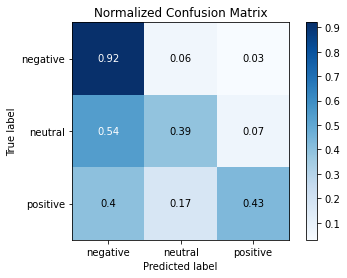

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_predicted, normalize=True)
plt.show()


####**8. Pratiquons!**

+ Maintenant, résolvons quelques exercices!

###**Exercice**
+ Construire et évaluer un modèle : critiques de films
Dans ce problème, vous allez créer un modèle de régression logistique à l’aide du jeu de données.

+ Le score est stocké dans la colonne et correspond au moment où l’avis est positif et lorsqu’il est négatif. La révision du texte a été transformée, à l’aide de BOW, en colonnes numériques.

      movieslabel10

+ Vous avez déjà créé un classificateur, mais vous l’avez évalué à l’aide des mêmes données que celles utilisées lors de l’étape de formation.

+ Assurez-vous maintenant d’évaluer le modèle à l’aide d’un jeu de données de test invisible.

+ Comment les performances du modèle changent-elles lorsqu’elles sont évaluées sur l’ensemble de test ?

####**Instructions**

+ Importez la fonction requise pour un fractionnement train/test.
+ Effectuer le fractionnement train/test, en spécifiant que 20 % des données doivent être utilisées comme ensemble de tests.
+ Entraînez un modèle de régression logistique.
+ Imprimez la précision du modèle sur la formation et sur les données de test.

In [ ]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(movies.review)
X = vect.transform(movies.review)
y = movies.label

In [ ]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.742
Accuracy on test set:  0.7255163224516988


####**Mesures de performance des données Twitter**

+ Vous entraînerez un modèle de régression logistique qui prédit le sentiment des tweets et évaluera ses performances sur l’ensemble de tests à l’aide de différentes mesures.

+ Une matrice a été créée pour vous. Il contient des entités créées avec un BOW sur la colonne.

        Xtext

+ Les étiquettes sont stockées dans un vecteur appelé . Vector est pour les tweets négatifs, pour les tweets neutres et pour les positifs.
+ Notez que bien que nous ayons 3 classes, c’est toujours un problème de classification.

+ La précision mesure toujours la proportion d’instances correctement prédites.

+ La matrice de confusion sera maintenant de taille 3x3, chaque ligne donnera le nombre de cas prévus pour les classes 2, 1 et 0, et chaque colonne - le nombre réel de cas dans les classes 2, 1 et 0.

      yy012

Tous les packages requis ont été importés pour vous.

####**Instructions**

+ Effectuez le fractionnement train/test et stratifiez par .y
+ Entraînez un classificateur de régression logistique.
+ Prédisez les performances sur l’ensemble de tests.
+ Imprimez le score de précision et la matrice de confusion obtenus sur le jeu de test.

In [ ]:
# import dataset
tweets = pd.read_csv("/content/Tweets.csv")

# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(tweets.text)
X = vect.transform(tweets.text)
y = tweets["airline_sentiment"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.726775956284153
Confusion matrix test set: 
 [[0.57422587 0.03620219 0.01639344]
 [0.11498179 0.08196721 0.01479964]
 [0.0651184  0.0257286  0.07058288]]


####**Construire et évaluer un modèle : données d’évaluation des produits**
+ Dans cet exercice, vous allez créer une régression logistique à l’aide du jeu de données, contenant les avis des clients sur les produits Amazon.

+ Le tableau contient le sentiment : s’il est positif et autre.

+ Le tableau contient toutes les fonctions numériques créées à l’aide d’une approche BOW.

+ N’hésitez pas à les explorer dans l’IPython Shell.
        reviewsy10X

+ Votre tâche consiste à créer un modèle de régression logistique et à calculer la matrice de précision et de confusion à l’aide du jeu de données de test.

+ Les fonctions de régression logistique et de fractionnement train/test ont été importées pour vous.

####**Instructions**

+ Importez les fonctions de score de précision et de matrice de confusion.
+ Divisez les données en formation et en tests, en utilisant 30% de celles-ci comme ensemble de tests et définissez la graine aléatoire sur . 42
+ Entraînez un modèle de régression logistique.
+ Imprimez le score de précision et la matrice de confusion à l’aide des données de test.

https://guide.allennlp.org/reading-data#3

#**Régression logistique : revisitée**

####**1. Régression logistique : revisitée**

+ Avant de créer une régression logistique à l’aide de fonctions de texte, nous avons transformé les champs de texte en colonnes numériques.

+ En conséquence, nous pourrions finir par avoir des centaines, voire des milliers de fonctionnalités, ce qui peut rendre le modèle assez complexe.

####**2. Modèles complexes et régularisation**

+ Un modèle complexe peut se produire dans quelques scénarios.

+ Si nous utilisons une fonction très compliquée pour expliquer la relation d’intérêt, nous adapterons inévitablement le bruit dans les données.

+ Un tel modèle ne fonctionnera pas bien lorsqu’il sera utilisé pour noter des données invisibles.

+ **C’est ce qu’on appelle aussi le surajustement**.

+ Un modèle complexe pourrait découler de l’inclusion d’un trop grand nombre de caractéristiques et de paramètres inutiles; en particulier avec des données textuelles transformées, où nous pourrions créer des milliers de colonnes numériques supplémentaires.

+ Ces deux sources de complexité vont souvent de pair.

+ Une façon de décourager artificiellement les modèles complexes est l’utilisation de la régularisation. Lorsque nous utilisons la régularisation, nous pénalisons ou restreignons la fonction du modèle.

####**3. Régularisation dans une régression logistique**
+ La régularisation est appliquée par défaut dans la fonction de régression logistique de sklearn.

+ **Il utilise ce qu’on appelle la pénalité L2**; les détails de celui-ci sont en dehors de la portée de ce cours, mais intuitivement, il est bon de savoir que **la pénalité L2 réduit tous les coefficients vers zéro, réduisant efficacement l’impact de chaque fonctionnalité**.

+ **Le paramètre qui détermine la force de régularisation est donné par C, qui prend une valeur par défaut de 1**.

+ Des valeurs plus élevées de C correspondent à moins de régularisation, en d’autres termes, le modèle essaiera de s’adapter au mieux aux données.

+ De petites valeurs de C correspondent à une pénalisation (ou régularisation) élevée, ce qui signifie que les coefficients de la régression logistique seront plus proches de zéro; le modèle sera moins flexible car il ne s’adaptera pas si bien aux données d’entraînement.

+ Comment trouver la valeur la plus appropriée de C? Habituellement, nous devons tester différentes valeurs et voir laquelle nous donne les meilleures performances sur les données de test.



In [ ]:
# import dataset
tweets = pd.read_csv("/content/Tweets.csv")

# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(tweets.text)
X = vect.transform(tweets.text)
y = tweets["airline_sentiment"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Regularization arguments
LogisticRegression(penalty='l2', C=1.0)

####**4. Prédire une probabilité vs prédire une classe**
+ Rappelez-vous que lorsque nous avons formé un modèle de régression logistique, nous avons appliqué la fonction de prédiction à l’ensemble de tests pour prédire les étiquettes.

+ La fonction predict prédit une classe : 0 ou 1 si nous travaillons avec un classificateur binaire.

+ Cependant, au lieu d’une classe, nous pouvons prédire une probabilité en utilisant la fonction **predict_proba**.

+ Nous passons à nouveau comme argument le jeu de données de test.

####**5. Prédire une probabilité vs prédire une classe**

+ **Cela renvoie un tableau de probabilités, ordonnées par l’étiquette des classes - d’abord la classe 0 puis la classe 1**.

+ Les probabilités pour chaque observation sont affichées sur une ligne distincte.

+ La première valeur est la probabilité que l’instance soit de classe 0 et la seconde de classe 1.

+ Par conséquent, il est courant lors de la prédiction des probabilités de spécifier déjà que nous voulons extraire les probabilités de la classe 1.



In [ ]:
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict labels
y_predicted = log_reg.predict(X_test)
# Predict probability
y_probab = log_reg.predict_proba(X_test)

####**6. Modéliser les métriques avec les probabilités prédites**
+ Une chose importante à savoir est que nous ne pouvons pas appliquer directement le score de précision ou la matrice de confusion aux probabilités prédites.

+ Si vous faites cela dans sklearn, vous obtiendrez une ValueError.

+ La raison en est que la précision et la matrice de confusion fonctionnent directement avec les classes.

+ Si nous avons prédit des probabilités, nous devons les encoder en tant que classes.

+ **La valeur par défaut est que toute probabilité supérieure ou égale à 0,5 est traduite en classe 1, sinon en classe 0**.

+ Toutefois, vous pouvez modifier ce seuil en fonction de votre problème.

+ Imaginez que seulement 1% des avis sont positifs et que vous ayez construit un modèle pour prédire si un nouvel avis est positif ou négatif.

+ Dans ce contexte, vous ne voulez pas traduire une probabilité prédite supérieure à 0,5 en classe 1, ce seuil devrait être beaucoup plus bas.


In [ ]:
# Select the probabilities of class 1
y_probab = log_reg.predict_proba(X_test)[:, 1]
y_probab

array([0.1180192 , 0.29536317, 0.13976562, ..., 0.63559109, 0.44281921,
       0.01223294])


####**7. Pratiquons!**
+ Appliquons ce que nous avons appris dans les exercices!


####**Prédire les probabilités des critiques de films**
+ Dans ce problème, vous allez générer une régression logistique à l’aide du jeu de données.

+ Les étiquettes sont stockées dans le tableau et les fonctions dans .

      movies, y, X

+ Entraînez le modèle sur les données d’entraînement. Au lieu de prédire les classes, prédisez les probabilités que chaque instance de l’ensemble de tests appartienne à chacune des deux classes.

+ Les fonctions de régression logistique et de fractionnement train/test ont été importées pour vous.

####**Instructions**

+ Divisez les données en ensemble d’entraînement et de test.
+ Entraînez un modèle de régression logistique.
+ Prédire les probabilités pour la classe 0 et pour la classe 1 des données de test. La classe 0 est située comme la première colonne dans les probabilités prédites, et la classe 1 est la deuxième.

In [ ]:
import pandas as pd
movies = pd.read_csv("/content/IMDB_sample.csv")
movies.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [ ]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(movies.review)
X = vect.transform(movies.review)
y = movies.label

In [ ]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("*****"*20)
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [0.7724442  0.65440957 0.58288378 0.33946333 0.92987012 0.80410385
 0.35080326 0.69703295 0.5267362  0.20877056]
****************************************************************************************************
First 10 predicted probabilities of class 1:  [0.2275558  0.34559043 0.41711622 0.66053667 0.07012988 0.19589615
 0.64919674 0.30296705 0.4732638  0.79122944]


####**Revues de produits avec régularisation**

+ Dans cet exercice, vous travaillerez une fois de plus avec l’ensemble de données des critiques de produits **Amazon**.

+ Un vecteur d’étiquettes contient le sentiment :

  + s’il est positif ou non.
  + La matrice contient toutes les fonctions numériques créées à l’aide d’une approche BOW.

        reviews, y, 10, X

+ Vous devrez former deux modèles de régression logistique avec différents niveaux de régularisation et comparer leurs performances sur les données de test.

+ Rappelez-vous que la régularisation est un moyen de contrôler la complexité du modèle.

+ Plus un modèle est régularisé, moins il est flexible, mais mieux il peut généraliser.

+ Les modèles avec un niveau de régularisation plus élevé sont souvent moins précis que les modèles non régularisés.

####**Instructions**

+ Divisez les données en un train et des ensembles de tests.

+ Entraîner une régression logistique avec le paramètre de régularisation de .

+ Entraîner une deuxième régression logistique avec un paramètre de régularisation égal à .10000.001

+ Imprimez les scores de précision des deux modèles sur le jeu de tests.

In [ ]:
import pandas as pd
reviews = pd.read_csv("/content/amazon_reviews_sample.csv")
reviews.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [ ]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(reviews.review)
X = vect.transform(reviews.review)
y = reviews.score.ravel()

In [ ]:
X.shape, y.shape

((10000, 100), (10000,))

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.732
Accuracy of model 2:  0.6075


####**Régularisation des modèles avec les données Twitter**
+ Vous travaillerez avec les données Twitter exprimant le sentiment des clients sur les compagnies aériennes.
+ La matrice des entités et le vecteur des étiquettes ont été créés pour vous.
+ En outre, la répartition de la formation et des tests a été effectuée. Vous pouvez travailler directement avec le , et les tableaux.

        X, y, X_train, X_test, y_train, y_test

+ Vous formerez des modèles régularisés et plus flexibles et les évaluerez à l’aide de différentes mesures de performance du modèle.

+ Tous les packages requis ont été importés pour vous.

####**Instructions**

+ Entraînez deux régressions logistiques : une avec un paramètre de régularisation de 100 et une seconde de 0,1.
+ Imprimez les scores de précision des deux modèles.
+ Imprimez la matrice de confusion de chaque modèle.

In [ ]:
# import dataset
tweets = pd.read_csv("/content/Tweets.csv")

# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
#Arguments of TdfVectorizer:
      #max_features,ngrams_range,stop_words,token_paern,max_df,min_df

vect = TfidfVectorizer(max_features=100).fit(tweets.text)
X = vect.transform(tweets.text)
y = tweets["airline_sentiment"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(penalty='l2', C=100, solver="saga", max_iter=100).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(penalty='l2', C=0.1).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', accuracy_score(y_predict1, y_test))
print('Accuracy of model 2: ', accuracy_score(y_predict2, y_test))
print('Confusion matrix of model 1: \n' , confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

Accuracy of model 1:  0.7272313296903461
Accuracy of model 2:  0.7197176684881603
Confusion matrix of model 1: 
 [[0.56876138 0.03916211 0.018898  ]
 [0.10860656 0.08629326 0.01684882]
 [0.06238616 0.02686703 0.07217668]]
Confusion matrix of model 2: 
 [[0.59175774 0.02481785 0.0102459 ]
 [0.13296903 0.06762295 0.01115665]
 [0.07923497 0.02185792 0.06033698]]


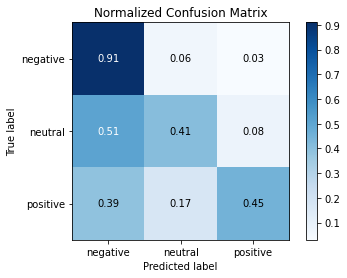

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_predict1, normalize=True)
plt.show()

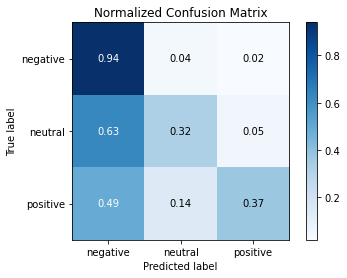

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_predict2, normalize=True)
plt.show()

###**Rassembler tout cela**

####**1. Rassembler tout cela**
+ Nous allons rassembler toutes les étapes que nous avons appliquées dans ce cours sur l’analyse des sentiments.

+ Je me retrouve à appliquer ces mêmes étapes dans mon travail de data scientist.

####**2. Le problème de l’analyse des sentiments**

+ Nous avons défini l’analyse des sentiments comme le processus de compréhension de l’opinion d’un auteur sur un sujet.

+ Tout au long du cours, nous avons travaillé avec des exemples de critiques de films et de produits Amazon, des données sur les sentiments des compagnies aériennes Twitter et différents exemples littéraires chargés d’émotion.

+ Nous avons suivi différentes étapes pour transformer la colonne de texte, qui contenait la révision, en fonctions numériques.

+ Nous avons terminé notre analyse en formant un modèle de régression logistique et en prédisant le sentiment d’une nouvelle revue en fonction des mots du texte.

+ Passons en revue ces étapes plus en détail.

####**3. Exploration des avis**

+ Nous avons commencé par explorer la colonne de révision dans l’ensemble de données des critiques de films.

+ Nous avons trouvé quelles étaient les critiques les plus courtes et les plus longues.

+ Nous avons également tracé des nuages de mots à partir des critiques de films, ce qui nous a permis de voir rapidement quels sont les mots les plus fréquemment mentionnés dans les critiques positives ou négatives.

+ De plus, nous avons créé des fonctionnalités pour la durée d’une révision en termes de nombre de mots et de phrases, et nous avons appris à détecter la langue d’un document.

####**4. Transformations numériques des colonnes porteuses de sentiments**

+ Nous avons poursuivi avec des transformations numériques des fonctionnalités de révision.

+ **Nous avons transformé le texte à l’aide d’une approche de sac de mots et d’un vectoriseur Tfidf**.

+ **Le sac de mots créé comporte des caractéristiques correspondant au nombre de fréquences d’un mot dans une critique ou un tweet respectif (également appelé document dans NLP problèmes)**.

+ **L’approche de fréquence inverse de la fréquence des documents est similaire au sac de mots, mais elle tient compte de la fréquence à laquelle un mot apparaît dans un document par rapport au reste des documents**.

+ Ainsi, nous pouvons capturer des mots « importants », alors que les mots qui se produisent fréquemment ont un score tfidf inférieur.

+ **Nous avons utilisé countVectorizer et TfidfVectorizer de sklearn.feature_extraction.text pour construire chacun des vecteurs**.

+ Pour rappeler la syntaxe, nous avons appelé la fonction vectoriseur et l’avons ajustée, puis nous l’avons transformée en colonne de texte dans nos données.

####**5. Arguments des vectorisateurs**

+ Il y a beaucoup d’arguments que nous avons spécifiés dans les vectoriseurs.

+ Nous avons traité des mots d’arrêt : **ces mots fréquents et non informatifs**.

+ Nous avions une vidéo sur n-grammes, ce qui nous permettait d’utiliser différentes longueurs de phrases au lieu d’un seul mot.

+ Nous avons appris à limiter la taille du vocabulaire en définissant l’un des nombreux paramètres suivants:

  + **max_features (pour le nombre maximal de caractéristiques)**,
  + **max et min_df (qui indique au vectorisateur d’ignorer les termes supérieurs ou inférieurs à la fréquence spécifiée, respectivement)**.

+ Nous ne pouvions capturer que certains personnages en utilisant l’argument **token_pattern**.

+ **Enfin, nous avons appris les lemmes et les tiges et pratiqué le lemmatizing et le stemming des jetons et des cordes**.

+ Nous pourrions ajuster tous ces arguments - à l’exception des lemmes et des tiges - à la fois dans les compteurs et les tfidfvectoriseurs.

####**6. Modèle d’apprentissage supervisé**

+ Dans la dernière étape, nous avons utilisé une régression logistique pour former un classificateur prédisant le sentiment.

+ Nous avons évalué les performances du modèle à l’aide de mesures telles que le score de précision et une matrice de confusion.

+ Étant donné que l’objectif est que notre modèle fonctionne bien sur des données invisibles, nous divisons aléatoirement les données en un ensemble d’entraînement et de test; nous avons utilisé l’ensemble de formation pour construire le modèle et l’ensemble de test pour évaluer ses performances.

####**7. Pratiquons!**
+ Ce sont toutes des compétences très précieuses et essentielles pour effectuer une tâche d’analyse des sentiments.

+ Effectuons certaines de ces étapes dans les exercices.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorizer syntax
vect = CountVectorizer().fit(data.text_column)
X = vect.transform(data.text_column)

##**Exercice**

####**Étape 1 : Cloud Word et création de fonctionnalités**
+ Vous travaillerez avec un échantillon du jeu de données tout au long de cet exercice.

+ Il contient les colonnes et. N’hésitez pas à l’explorer dans le shell IPython.

      reviews de review.score

+ Dans la première étape, vous construirez un nuage de mots en utilisant uniquement des critiques positives.

+ La chaîne a été créée pour vous en concaténant les 100 meilleures critiques positives. **positive_reviews**

+ Dans la deuxième étape, vous allez créer une nouvelle fonctionnalité pour la durée de chaque révision et ajouter cette nouvelle fonctionnalité au jeu de données.

+ Toutes les fonctions nécessaires pour tracer un nuage de mots ont été importées pour vous, ainsi que la fonction du module.

      word_tokenize nltk

####**Instructions**

+ Appelez et créez une image de nuage de mots à l’aide du fichier. **positive_reviews**
+ Affichez l’image générée.

In [ ]:
positive_reviews = """
Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\r\n  10 stars: This is one of the best video concerts ever. The sound, visuals and performances are top notch. It is a real joy. I have owned it a week and watched it 3 times already. Every performance is good. There are no dead spots during this concert and you get quite a number of them. A keeper. Memorable.\r\n  Informative: The book, although hard to get excited about in the begining, offers insight into confrontations that you experience any given day during your life. It\'s thorough and offers helpful ideas.\r\n  Book: Armed Response: A good book for Self-Defense folks. I was hoping for something new but it pretty much reiterated what we already know (preaching to the choir). Not a bad evening read.\r\n  Armed Response: This is a very good book for the person who plans to carry concealed firearms. The logic is clear and the recommendations are sound. Unfortunately, the proof reading is atrocious. In the early chapters paragraphs are repeated and there are other other problems. I lined out several sentences that were misplaced and had to tape in a loose page that came with the book. The book is sound and I would have given it a 5 if the proof reader had not messed it up.\r\n  EXCELLENT FOR NOVICE OR EXPERT: For 36 years I have instructed a wide variety of novices, experts and "so-called" experts. This book will take you from nothing - to all you really need to know (unless you are into "one-upsmanship" or trying to prove something about your masculinity or lack of it). For those (who are using this forum to display their resumes) if you are insecure then you will take your stack of books and your ego and look for anything that might have been left out. You might even list all the books you have, but the truth is, if you are really good at real-life situations, whether actual military combat, law enforcement or the usual combat games, ....all the book-learning in the world is no replacement. This book is well worth what you pay for it, and that\'s the point of these reviews, not better-than-thou cynicism from would be intellectuals.\r\n  Armed Response: is essential: If your looking for a great book that addresses the use of lethal force than this is it. A great place to start be it a beginner or old timer this is a must read. David Kenik not only wrote well but put it in a format that is understandable. Well thought out! This is a must have book for anyone who wants to understand what is needed to justify an armed response. It does not replace personal training or what can be learned in a class (interaction). It does however build a great foundation for what is needed to to understand in responding with lethal force. If you own a firearm for personal protection than you need to own this book.\r\n  A "must read" for any handgun owner: I ordered this on a recommendation from a coworker. He is a former Sheriff\'s Deputy and is thoughtful and level-headed. The information in the book is well reasoned and clearly explained and should be required reading for any new handgun owner or those considering a gun purchase for self-protection.\r\n  Read this if you carry concealed: This is an in-your-face, tell it like it is, discussion of the good and bad of carrying a concealed weapon. The snap decisions you might make under extreme pressure may have dire consequences unless you understand what you can and cannot do to defend yourself.Very enlightening. A quick read on a very serious matter.\r\n  Boring but useful: I must admit, this book is pretty lame in its organization and all. But there was still a load of stuff that I wouldn\'t have known, so there is some useful content here. (Heh...I couldn\'t have passed my test without it...)\r\n  Great for drivers awareness: I have read some of the reviews and it appears to me that the ones who don\'t like this book are the children who had to read it. First of all this book is not written for each state, so you will have to check on your own state or county laws along with this book. As for this book not helping you pass the "TEST". Responsible drivers know that their is much much more to driving then passing the "TEST", which this book goes into great detail letting its readers know. I\'ve been A police officer for almost 9 years and now work at a school and deal with children all the time and a lot of thing seem boring to them. But we as adults must continue the teach, and hope that some of what they read sinks in. When dealing with driving a vehicle, learning by experience a lot of times ends up to late. This book doesn\'t teach you how to pass the "TEST" it teaches you how to be a better driver, something we all need to be...\r\n  Difficult, but all-around enjoyable: Count Dracula has married Queen Victoria, and vampirism is the hip new trend for anyone who wants to be anyone. A mysterious killer is cutting down young vampire prostitutes in the streets, and the police have received a letter claiming credit from someone who calls himself Jack the Ripper. If you enjoy classic vampire stories, mysteries, Victorian London, or just a really good story, it\'s worth taking a look.My only complaint is that the tangled threads of multiple viewpoint characters get confusing. There are quite a few characters to keep track of, each with their own agendas. Most of them are familiar from other works (the good Dr. Jekyll inspects a recent murder victim; when he is visited for further questioning, he\'s consulting with his friend Dr. Moreau), and there\'s a healthy appendix at the end that lists historical and fictional references by chapter, but it\'s still a lot to keep track of.\r\n  Alternate History meets Classic Horror: Kim Newman\'s gothic horror novel, "Anno Dracula" is a fine riff of Bram Stoker\'s original masterpiece. Newman asks the reader a simple question: What if Dracula had won in his confrontation with van Helsing and the other protagonists from Stoker\'s novel? His ultimate objective, it appears, was to marry Queen Victoria and claim the British throne for himself. To cement his rule, the vampire spreads his curse to create a whole new class of subject, the undead. Within this mess Dr. Seward finds himself cast in the role of Jack the Ripper as he seeks to destroy the undead in his quest for vengeance. With a fine eye for literary satire Newman throws in plenty of Victorian characters from other great works just for kicks. If you liked Dracula and don\'t mind the occasional "What If" scenario then you might want grab a copy of this hard to find gem.\r\n  Enthralling: I\'m very glad to have discovered this original, complicated but enthralling book by Kim Newman. In this take-off of Bram Stokers Dracula, the Count survived execution and went on to become the consort of Queen Victoria in 1888. England is made up of the "un-dead" and the "warm," and when a killer \'Silver Knife\' begins murdering vampire prostitutes, they must work together to track him down. Many names from the original Dracula, as well as other literary works find this way into the story, which is fun.I had a little trouble sticking with this book at first--it is quite complex and with many characters--but once I got pulled in, I could not put the book down. I highly recommend this for fans of the original Dracula.\r\n  So glad Titan Books Reprinted this!!: It is 1888 and vampires are everywhere! From holding elite positions in the government to overwhelming the slums of Whitechapel, vampires have integrated into society. How would the presence of vampires change Victorian, England? This is exactly what Mr. Kim Newman tackles in his thriller novel \'Anno Dracula\'. Not only is Newman spot on in his depiction of London in 1888, but he also brings in a wide range of fictional characters from Victorian novels including their authors!Characters Charles Beauregard and Genevieve Dieudonne team up to be an unstoppable duo in search of Jack the Ripper. It is hard to put the book down once you\'ve started reading. So glad Titan Books reprinted this! I hope they continue with the sequel Anno Dracula: The Bloody Red Baron, which takes place in 1918, or I will have to get crafty and find an old copy myself!\r\n  Please make a reprint of this book.: For me, Steampunk started with this book. It brought to me the beauty and anachronisms of the Victorian culture mixed with the surprises and action of modern sci/fi. My wife, who loves vampire stories probably even more than I do, had never read the book and when I went about trying to find a copy of it for her, it seemed impossible. Thank god for the internet (and to a lesser extent, Amazon). I was finally able to get a used hardback for a sum that wasn\'t too insulting. My wife tore through it and loved the weirdness as much as I do. It is crazy that this book has not had a recent reprint. Who ever is responsible for that should be slapped once or twice.\r\n  Unique presentation of the vampire genre: This is a truly unique novel. Newman presents us with a London virtually taken over by the undead. Vampires have come out of hiding and are now fully "out". Living people (referred to as "warm") flock to be turned, and vampires are now found in every walk of life from government to shop keeper to prostitute. Newman is extremely detailed, and he introduces numerous characters while weaving in actual historical occurrences into the story. We get a glimpse of this London at the time of the Whitechapel murders; only this time, the Ripper preys on vamp prostitutes, and his identity harkens back to Stoker\'s DRACULA.All in all, this is a delightful and creative novel. It is a breath of fresh air amidst the Lestat wannabes. Keeping up with all the different characters can be a task, but if you give this novel a chance, you most definitely won\'t be disappointed. This is the first novel of a trilogy, and I\'m rushing to read the next in the series (BLOODY RED BARON).\r\n  Riveting: One of the best suspense books I have had the pleasure to read. The characters are a dynamic mix that make the story had to put down. You develop and understanding for the villian were you empathize with him while at the same time you feel for the hero and heroine to catch him. A must read for those who like suspense novels.\r\n  Aids in hands-free phone usage: I use this phone holder every day on my commute, in conjunction with an auto charger and hands-free earset. I find it indispensable in securely fastening the phone in place, yet easily removable. It makes one-hand dialing easy, and I don\'t have to worry about the phone sliding around because of sudden turns or stops. One word of note: it doesn\'t accept the use of oversize extended-life batteries.\r\n  Inside a Secret Nation: I bought this book on ebay, as it\'s been out-of-print for years. Don\'t bother with the movie; not only is the casting all wrong, but the reality was 100 times worse. Caranza Tene looked nothing like Judd Hirsch and was unbelievable violent. Steven Tene grew up in a culture where kids weren\'t allowed to go to school and had to beg and steal for their families. Girls were married off at age 11 and had to work, while their husbands did nothing. Loyalty meant giving all your earnings to your husband or father. If you made your fellow Gypsies angry, they\'d lie to the police to get you in trouble.I\'d like to see this book reissued, with a chapter on where they are now. Caranza Tene is definitely dead, and Steve Tene must be in his 60\'s. The telephone psychic industry probably cut into the market for fortune-tellers, so I wonder if the women now have regular jobs?\r\n  a new king: Steve Tene Bimbo was 25yrs old when his grandfather King Tene died. The grand father skipped over his son (a fat gross slob) to give Steve the medallion and the ring of kingship. This set off a war.Gypsies are mostly known for their grift, scams and cons but when called upon they can fight and kill too. Several attempts are made on his life but he survives. Read this book and see what happens.Steve tells author Peter Maas that he wants to change and he wants to change the way the gypsies live. The book ends there and we do not know if he was successful. The book is very very short. You can read it almost in 1 sitting. Some of the reviews are longer than the book.bbp okc ok2009\r\n  C\'est magnifique! il y a du vrai dans ce qui\'l dit.: Il y a des temps que Mr. Coello nous avons donné une histoire de honor et de mystère. Cet histoire étre publié en different langues. Je l\'ai li en anglais et en franais seulement. La histoire rendu étai fidèle, excellent, et grand. Il raconte du rve de un bon garon que cherche le monde pour trouver un inconnu trésor. Il l\'a réussi...mais... Je suis certain qui il a trouvé deux trésors... voila! vous devez lire la histoire maintenant pour découvrir le mystére; s\'il vous plait.\r\n  FRUSTRATING OMMISIONS: IT IS VERY DIFFICULT TO ACKNOWLEDGE THIS VIDEO COMPILATION AS PERFECT DUE TO A NUMBER OF INCREDIBLE OMMISIONS. ALONG WITH IGNORING THE TELEVISION PERFORMANCES FOR \'STARMAN\' AND \'REBEL REBEL\', THERE ARE NO VIDEOS BETWEEN THE YEARS 1973 AND 1977, A TIME IN WHICH BOWIE HAD MANY FANTASTIC SINGLES INCLUDING \'FAME\', TVC15\', \'GOLDEN YEARS\' AND \'SOUND AND VISION\'. HOWEVER, IT REMAINS A MUST FOR BOWIE FANS. HIGHLIGHTS: \'LIFE ON MARS\', BE MY WIFE\', BOYS KEEP SWINGING\', \'CHINA GIRL\' AND THE BEST VIDEO OF THE LOT- \'ASHES TO ASHES\'.\r\n  TRUE WORSHIP: Nomatter what I am going through, Darien and LW\'s music is always able to bring my back into focus. If you are looking for a true worship album, this is the ONE!! There are lots of "worshippers" and commercialized gospel singers out there doing the best they can, but you can tell when the focus goes away from the Lord. Darien\'s writing stays true to the reason we sing, and that is the Almighty King. You will fall down on your knees. You will dance and shout in praise! BUY THIS ALBUM - IT WILL BE THE BEST SPIRITUAL INVESTMENT YOU EVER MAKE (AFTER ACCEPTING CHRIST)!\r\n  Great CD: Love Regina\'s work, love Jazz. I am a violinist and love hearing the violin played in different genre\'s love what she does\r\n  LIFE CHANGINGING BOOK: THIS BOOK WILL CHANGE YOUR LIFE ( WORK,RELATIONSHIPS AT HOME,FRIENDS),IF YOU UNDERSTAND AND PRACTICE THE SKILLS DESCRIBED IN THE BOOK.IT CHANGED MY LIFE.MANY THANKS TO THE AUTHORS.\r\n  Crucial Confrontations: A must read for supervisors and managers. With outstanding proven approaches to knowing what you want from a conversaton, what the other wants, and watching out for the relationship. Found it useful at work as a reference book, plus a great read for personal relationship communications as well. Would suggest reading Crucial Conversations first to really get the full view.\r\n  TERRIFIC BOOK: I saved my job by reading this book. One of my co-workers and I were having a difficult time getting along. I loved my job, but this friction between the two of us was really starting to bug me and although the job market is tight right now, I had decided to float my resume around and see what was out there.BUt, I went to the bookstore and saw CRUCIAL CONFRONTATIONS. It had so much great advice on how to deal with confrontation in a positive way. By using the books advice, I was able to "confront" my co-worker and I realized we really were not that far apart in opinions...we just expressed them differently. It would be a stretch to say that we will be best friends, but I do think we have reached a common ground and I no longer feel the need to leave my job.Go buy this book if you are have difficulty in your job. marriage or family...It is worth every penny.\r\n  Cute book and a fast read: Absolutely charming book, great for all grade levels. I usually run for the gory, werewolfie or anne boleynesque books, but it was refreshing to pick up something sweet AND interesting for a change. Buy this for the MG reader in your life, but read it for yourself first!\r\n  Great if you have the RIGHT sound setup: I almost sent this item back because the sound was so uneven going back and forth between loud and soft for no reason. luckily I ran across a comment by someone who mentioned you had to use 5.1 or DTS in the sound setup to get it to work right. Sure enough, Doby sounds awful, but when I selected 5.1 the sound was perfect. After that I enjoyed a really great concert with some excellent cuts from Eric Clapton, Mark Knopfler-Dire Straits, Sting, Paul McCartney and many others. Brothers in Arms, Money for Nothing, Layla, Hey Jude and a great rendition of Kansas City with everyone joining in. If you think you might like this DVD you will, so buy it, just be sure you use 5.1 or DTS!\r\n  Great Music: This is a great music DVD I love it. Lot\'s of rock stars and loads of songs, I am very pleased. Money well spent, If you like this DVD you will love "A Concert For George" that was a ten plus+++++\r\n  Outstanding content: I have a $20,000 stereo with DTS, SACD 3100 watts. This is far and away one of the best content, musicians, songs etc... that I own. The sound quality is a 4 out of 5 but the songs and musicians more than make up for it. A definite must for any audiophile.\r\n  rare concert, awesome audio: I recently watched this at a friend\'s house. He has an excellent surround sound setup and this DVD has DTS. amazing.as a habit I don\'t like live concert video - rarely buy them.the guest artists are phenomenal - Paul McCartney at the end is lots of fun/great songs.How many times are you going to see Clapton and Knopfler playing together, filmed well and in DTS?you just can\'t go wrong with this DVD.\r\n  Excellent DVD: Music for Montserrat is an exceptional DVD. Every artist, Eric Clapton, Paul Mc Cartney, Elton John, just to name a few are wonderful and the sound is amazing. A great addition to anyone\'s DVD collection.\r\n  An Excellent DVD Concert: As a survivor of the Woodstock generation these artists play the music I love to hear. The musicians are in excellent shape, the line-up is superb, the selections are well-chosen and the DDS 5.1 mix is a showroom example of a proper live concert mix. Ambient and live but clear and focused. All in all an excellent sounding DVD of some top-flight musicians and songwriters strutting their finest stuff with Sir George Martin adding some very fine string embellishments to many of the songs. If you like these artists and their music this DVD will not disappoint you.\r\n  Excellent overview: This overview of the trio\'s songs is excellent, although if you own the Motown Hits anthologies, you already own 75% of the songs. Has rare mono mixes of Freda Payne\'s "Band Of Gold" and the Chairmen Of The Board\'s "Give Me Just A Little More Time." Informative liners notes.\r\n  THE CREAM OF THE CROP!!!!!!!!!!: The finest pop songwriters get a piece of their due with this three disc set. There were no finer writers than HDH during the second half of the twentieth century and this set is testimony to that. Sadly, most of these songs are available elsewhere and avid Motown fans will find this redundant. Great mono versions of a good chunk of their biggest hits but a second volume is called for with more of the post Motown output and a deeper look into the vaults for demos of some of the literally hundreds of top shelf songs these guys wrote. How did they do it? Don\'t have a clue but I sure do love these songs...\r\n  Riding in Cars or Boats with Kids: .Tom Bodett - the "We\'ll leave the light on" Motel 6 guy - wrote and performs this cautionary tale of respect for the whims of Nature for kids and their parents. Part "slice of life" in the Alaskan "bush," part sociology - can "bush" and "town" kids find common ground and interests? and also a warning on why kids should listen to grown-ups (all these years and we really HAVE learned something ;-), this captivating adventure will while away the hours whilst travelling.\r\n  Good book for young teens: Ok, the kids accused me of reading it because its full of boats, dories, fishing boats, rowboats, skiffs, mailboats etc and they are right. But I liked it most because it showed the kids thinking and the dangers of not trusting your brain when you are in trouble and the way out is not by getting into more trouble.The kids, before committing to read it, also wanted to know that no dogs die, and no one dies in the story. They are sick of stories where the main character or their dog dies. So there are dead people mentioned in the book, a dead mother, but she\'s long gone by the time the story starts.Anyway I liked it. The depiction of being out in the storm was very true to life, as was the actions of the kids.\r\n  Overall Good Book: Book was great and a nice read... but the cover was dirty, don\'t know why Amazon would sell a dirty book.\r\n  conversation tools: I liked the book and definitely picked up on tools for working thru violated expectations. Everyone could take away and use something from this book. Well worth the $s spent.\r\n  Great resource: I loved looking at this book. It covered a lot of variety of types of chests and provided interesting historical and culture facts, as well as personal stories for specific chests. The pictures to text ratio is perfect. I wish there was a little more information on consrtuction--there was some useful information on types of construction for the wood itself, but I would have liked to see information on materials/woods used, latches, locks, handles, and strapping/corners. Still, I am very happy with my purchase.\r\n  Admirable!: Based on her theosophic and new thought principles, these poems had tremendous influence on helping people to come into a sense of personal power and independence. Truly a most inspirational woman!\r\n  Uncovering the rage about Bettie Page: After years of seclusion, most of the secrets of, by and about Bettie Page are revealed in this well-composed and long overdue profile of the most photographed model in history.Ms. Page may still wonder at the inspiration and sensation (and consternation from members of Congress) she caused in the mid-1950\'s...what this book clearly does, is testify as to why her image is still sought after by fans and collectors.Easy, lively reading and plenty of pictures rates this as the best book available on the Page rage.\r\n  GREAT BOOK IN EVERY WAY: This is the ultimate book on Bettie Page. This book is for every true Bettie fan. Even contains an introduction from Bettie herself.If you really want to follow the history of legend, this is the ultimate book on Betty Mae Page!\r\n  4,5 stars Amazing album: If you like Slayer then this is a must album. The drums with Dave Lombardo are once again simply perfect. The songs are very rhytmic and aggressive. The sound of the guitars and the vocals are really great. Just buy this album .\r\n  great accessary: recently,I purchased a nikon camera.this is a great addition for my camera.I am able to see my pictures immediatly on the television.\r\n  NIkon EG-D2 Audio Video Cable for Nikon: This item is very well built, and works great with the Nikon Camera it was purchased to support. I recommend this item.\r\n  Can\'t get too much of a good thing.: In Crucial Confrontations these 4 author/practitioners continue on the Crucial Conversation path. They begin with definitions of terms, move to concrete examples and provide useful tools for improving dialogue in tough situations, in all aspects of life and work.The ability to have a tool for measuring your abilities in holding crucial confrontations is appealing as we all like to know where we stand. They also offer lots of tools on their website that supports this current work - www.crucialconfrontations.comThere are no absolutes for how we hold crucial confrontations and these 4 authors provide a template from which to work so that anyone can be successful. Authentic, Credible and great to know you are not alone in this navigation toward improved communications.\r\n  An excellent approach to interacting management: I had a wonderful time reading the book (and taking notes). It reminded me of the multiple occasions in which I have failed for lack of skills, but also showed me that there is a methodology to follow next time I have to confront a violated expectation (probably within the next five minutes)\r\n  Great job: I appreciate the books a great deal. They are wonderful tools for improving communication, which is something we all need, and especially when the stakes are high. Great book.\r\n  Regina Carter., Motor City Moments, I\'ll Be Seeing You, Paganini After A Dream.: I\'m reviewing all three Albums together as they are by the same artist; Regina Carter. Again I purchased these Albums on the basis of a 30 sec listen. They all lived up to my expectations. If anyone is familiar with Stephane Grapelli, Regina Carter\'s style is very similar. She really swings. I love these albums and play them over and over again.\r\n  amazing: "Motor City Moments" is Regina Carter\'s 4th CD and it is amazing to listen to. It opens with an uptempo, improvisational-like, number, "Don\'t Git Sassy" then settles into a contemplative, salsa tune "For Somoeone I Love," where Carter plucks her violin then make it laugh, weep and glide all in one song. I haven\'t heard the Milt Jackson version, but it would be interesting to hear the original to see how this interpretation is different. There also some interesting selections like "The Love Theme from Spartacus." Carter\'s lamenteous violin is softly accompanied by Marcus Belgrave\'s flugelhorn. In some instances, the two instruments merge into one sound. But the ultimate gem in this CD is Carter\'s version of Chattanooga Choo Choo. It should be a standard violin piece much like Mozart\'s Sonatas. It sounds like it was written for the violin and Carter is in absolute command here, with such fire and fluidity, I\'m definetly impress! One should buy this CD just for this number alone.\r\n  An Unfound Gem: This band has a straight forward approach to music that is sturdy, simple, aggressive and a little annoying, in a good way. The often frenetic lead guitar is right up front to create a classic rustic American sound. This band must like Blind Willie McTell as they cover Dying Crapshooters Blues and mention Mctell in their original track Down at Danny\'s. If you are looking for something different with a classic American roots music sound - this is a nice find.\r\n  Zelia Duncan: This is an excellent DVD. The music is fantastic, the singer is great and the musicians are the best. I highly recommend it!\r\n  good value: if you are a construction guy a straight edge is critical, they are sometimes hard to find at a good price/quality. this one fit the bill and fits [tightly] in my stabilla 8\' case with a level.\r\n  best book I\'ve read in past 5 years: scholarly, well-researched, often humorous look at development of human notions of what is sacred and how it became so.\r\n  Godd film for when you\'re in the mood for hotties!: No one in this film would ever win an academy award for anything, no would the film itself. That aside, you\'d have to look long and hard to find a film with more T&A (good stuff) than this ones got. The movie itself and the dumb plot are childishly enjoyable. One of the most hillarious elements is the carwash owner who seems to be immune to any type of testosterone attacks despite the fact that he\'s got scantily clad(or not!) women running around all over the place waiting for the chance to have sex! One hillarious film.\r\n  Great CD!: I think that this is a great album. My personal favorite song on it is "Like I Love You." Probably the most popular song on it is "Takes a little time." My friend is crazy about that song! You should buy this CD!\r\n  Odd that this is my favorite...so you know it has to be good: I\'ll keep it short since I want to go eat my lunch. Out of the hundreds (at least) of CDs I\'ve listened to, this is my favorite of ALL TIME. Which is weird, because I don\'t have any other Amy Grant albums, and I\'m actually not interested in any other albums by her. So you know there has to be something great about it. I heard this album, and promptly went out to buy it. I went on a cross-country train trip by myself last summer, and this CD was a great one to have while I looked out at America flying past my window and thought about life. I don\'t mean to sound dramatic or over-the-top, but this CD affects me in a way that VERY few other albums do. It trancends the normal music world.\r\n  Refreshing new material by Amy Grant: Behind the Eyes is slightly different from Amy\'s two previous releases; BTE is more mature and it gets better and better the more one listens to it. "Turn This World Around" is my favorite on the CD, but the rest of the material is also great.\r\n  One of Amy\'s best pop albums...: This is a sad and thoughtful album, indeed, and Amy writes one of the saddest songs on this album (Missing you). Many of the songs are about unrequited love, marriage, and hardships in life. This album def. reflects Amy\'s feelings on her marriage to Gary Chapman, and her love for Vince Gill. It is a beautiful, heartfelt album from a beautiful singer. Buy it if you like Amy\'s previous pop albums, or if you like sad songs (Which I do!)Choice tracks:Nobody homeCry a river,Leave it all behind,Missing you,The feeling that I had,Somewhere down the road.\r\n  Behind the Eyes Amy Grant: Hello, this CD has some good songs on it too. I like she sounds on this one. It has some happy songs on it.\r\n  Behind the Eyes: A darker side of Amy. Probably written and recorded when her marriage was falling apart. Very insiteful.\r\n  Bike Basket: Good quality overall. The braket for the stem didn\'t fit my application, so I improvised, and mounted it behind the seat over the rear fender and low. Holds stuff.\r\n  Stunning!: Zelia and her crack band celebrate a yearlong alliance by recording one of their "rehearsals" at the Cultural Center in Rio. Beautifully filmed and edited (except for some frontal shots of Zelia where the camera seems to shake), this DVD was recorded one years after the CD of the same name. It\'s fascinating to hear how the songs evolved after a year of working together. So many highlights, I can\'t even begin...but will simply mention that Zelia is in top form and wearing a beautiful dress!Just check it out--you\'ll be glad you did! Maravilhosa!!!Beleza, Zelia!!!!!\r\n  Dell E207WFP Monitor: This monitor, when it first came out, received rave reviews and I have not been disappointed. Since first buying it a few years ago, I have since added two additional ones as well. I would recommend this monitor to anyone looking for a older model that performs well.\r\n  Fantastic. Up close and personal. Scripturally accurate.: Doesn\'t get much better than this. What a blessing I have recieved from Pink\'s expositional approach to this great King\'s life.\r\n  David: In this unique conbination of biography, commentary, & devotional, Arthur Pink offers an intimate view of the many sides of David. The shepherd, the soldier, the king and the sinner are revealed in a way that cuts to the heart of life\'s greatest problems.\r\n  POID review: The book was new and in perfect condition. The price was well below that of many competitors. It was sent in a timely manner. I would gladly buy from this company again.\r\n  Quality Product: Pro - Product is of the highest quality. Con - I\'m looking for rivets to fit this unit and can\'t find them!! Amazon do not carry them.\r\n  magic under a microscope: After reading Schoemperlen\'s Language of Love I couldn\'t wait to read her new book. I was NOT disappointed. All of the magic and insight and wonder and irony is there. Later when I took a walk on the beach, everything seemed magnified. The sun and a grain of sand were suddenly about the same size and equally amazing.\r\n  cuts to the heart: It seems the earned province of Canadian women writers to cut to the heart of gender, race, and class privilege. In the title piece (I would not call it a story in the traditional character/plot sense) Schoemperlen explores a series of intangibles, among them faith, prayer, and hope, and very subtly weaves them into an indictment of middle class privilege. In a later story, "Count Your Blessings (a Fairy Tale)" Schoemperlen, in a twist reminiscent of the best Roald Dahl stories, cuts the heart out of the woman who has everything and is still unhappy. These stories are well-written, and are accompanied by clever old woodcut clip art. But unlike many short story collections, this is not an "easy" book, for the reader, and I suspect, for the author as well. The book jacket describes her work as "electric"--the prospective reader would do well to remember that electricity can shock as well as enlighten.\r\n  A must read for barn lovers....: I was enchanted with this fascinating book on barn conversions. Barns are great relics from our past, conveying a sense of history, but many have been ruined by weather, time, and neglect. I didn\'t realize how many creative architects and owners have made barns useful for both residential and commercial use through renovation and restoration. The intrinsic character of these old barns brings an integrity and charm rarely seen in new construction. In many gorgeous illustrations, Rooney describes the history of barns, their adornment (who knew that it was all because of a 9th century pope that there are so many roosters on weathervanes?), and their use as gorgeous residences and fascinating commercial and establishments - including an architectural office, inns, and even a funeral chapel. One entrepreneur even used several to develop an office complex. If you love barns and if you like to see the past preserved in the present, you will love this book.\r\n  FABULOUS! A MUST FOR ANASTACIA FANS!: FABULOUS FABULOUS FABULOUS!! This CD has all the songs I love from miss Anastacia. She is so fantastic and deserves more recognition in the US. SPROCK ON ANA!!any USA Anastacia fans please contact me at Anastacia.The_Voice@yahoo.com\r\n  Anastasia Rocks: The CD is great. Every song has its own personality and that makes the entire CD very diverse. I especially love the mixes on the second disc.\r\n  the best of anastacia: this would be a good time for america to wake up and embrace this tremendously talented singer. how this woman is not as successful in the usa as she is in europe is beyond me. so many great songs here. from the dance/pop/r+b of her first two albums, to the rock influenced hits from her third album. this is a great way to catch up if you\'ve missed out on anastacia.also includes "everything burns" with ben moody from evanesence and her gorgeous duet with italian superstar eros romazotti, "i belong to you"\r\n  DELL E207WFP 20.1" Digital/Analog TFT Flat Panel Monitor: Just a grea product from Dell! I never regret purchasing this lcd monitor though my 17 inch CRT which this replaced was truly sharp. This lcd is totally comparable in sharpness which is a plus when editing your digital pictures. It being flat makes you take back very much needed space, of course. If you only have analog connector on your pc you will still find this lcd okay. I installed a pc card with digital connector on my pc thus allowing its signal to stay digital (versus the pc converting its signal to analog so you could use your crt monitor which is of course analog). With this size, I tend to watch my dvds here than on my 50 inch Regza flat TV.\r\n  The King sits on his 70\'s Throne and I LOVE IT!!!: I\'ve always LOVED this LP and it is one of my All Time Favorites! Lots of Great Soul Music: In The Name, Green Power (MUST HEAR), Dancing In The Street. Some Solid Rockers: Title Track, Midnight Special. Plus a couple of Richard\'s Over The Top Monologues: Joy To The World (++MUST HEAR++)and Born On a Bayou. In addition, ther is a couple nifty covers: The Way You Do The Things You Do, Brown Sugar, and the magnificent - I\'m So Lonesome I Could Cry -. I just think this album is FUN. "King Of Rock and Roll" gets alot of medicore/negative reviews and I think folks just miss the boat... Would I start my LR Collection here? No. Is it over-produced? Yes. Does it at time sound "cartoony"? Yes, but if you dig the wild/crazy Little Richard of the 70\'s - you will eat this album up!!!\r\n  Colorful Overview of the Islands: What a pleasure to read such a high-quality book... It introduces each of the islands in a colorful and vivid way. The book includes many pictures, and provides a fine insight into the culture and character of the islands and touches on history, people, travel, activities, sights, nature, and a lot more.However, if you are looking for a book with accurate travel information, e.g. hotels, restaurants, prices/dates, how to get there, etc., this book is on the weaker side. Use it together with the Frommer\'s Caribbean guide for a combination that is hard to beat. Despite this weakness, it\'s still a five star on my bookshelf.\r\n  The Safe Place: This story broke my heart. I could not put this book down until I read the whole story. I am amazed at what this child had to go through before someone recognized that she was dyslexic and needed help in order to learn to read. It made me wish that every child had a place they could go where they felt safe and cared about, where no one would make fun of them because they could not read or write or do math, skills that most children take for granted. It made me realize that schools should provide every child a place to go where they felt safe and cared about, a place such as the resource room and teacher as described in this story. It also made me realize how important it is that teachers learn to recognize signs of dyslexia in children in their classrooms and bring it to the attention of appropriate school personnel. This is a wonderful book that I would highly recommend for teachers, parents, and educational/school psychologists to read.\r\n  In Nomine Patris et Filii: I love everything on this album. Every song is perfect, the guitars are raw like a rusty chainsaw, and Vikernes sings like he was about to kill someone the second after. Standout tracks: the first song and the 25 mins atmospheric one.If you\'re a catholic or a believer this is a must.5/5\r\n  The sinking of the Carl D. Bradley (SHIPWRECK ON LAKE MICHIGAN: I notice the other reviews of this double book ( two books under one title) concern the FIRE AT PESHTIGO. Just is important is the SHIPWRECK ON LAKE MICHIGAN portion. Essentialy this is one of the better accounts of the sinking of the Carl D. Bradley limestone carrier in Northern Lake Michigan November 18, 1958.Author Davenport picks up the story and moves towards the climax from different angles. One aboard a nearby salty freighter, another on board the soon to be doomed ship and still another in the home port of Rogers City Michigan.As a reader of Great Lakes History this accoount is one of the very best. It may be hard to find a copy as it had been over 25 years since it was in print.\r\n  Egyptian technique: This is a wonderful video. Teachings egyptian technique and combos- I love it. It has helped me become a better dancer.\r\n  Outstanding movie!: This is an excellent film, with more twists and turns in the plot than a snake in a pretzel factory. Highly recommended!\r\n  A tight, interesting thriller.: Timothy Hutton plays a Science Fiction author who, although he has written many novels, is best known for his first book about a song that haunted him. The song returns with a vengeance in the film and it is up to him to find a way to stop it from killing others. This was a nice tight thriller with fine acting by Hutton and David Kelly who may be familiar from Charlie and the Chocolate factory or Waking Ned Devine. It kept me guessing until the end (which is fairly hard to do). The background of beautiful Mediterranian locations make this a great movie to help escape from the summer heat.\r\n  Cool, man!: My friend had a PET except it was blue. It is unbelievable!!! The only bad thing about it is that u have to shake it 15 minutes to even fight a virus! I want red which is the "#2" PET. U should get it. My friend said that he made up a chip called the "sinqule chip." He made this "dementional area" to do this special power. It\'s called "down fusion." He says that it wastes all off your energy, but in one shot... it defeats the guy your versing! He says only one guy has it. HIM!!!!!! I think he\'s lieing. But remember... get it!\r\n  cool!!!!!!!!: the pet is preety cool its a nice sise and also if u want great game exp. buy more battlechips i cant give this toy 5 stars becuse when u die u need to shake it which is retadrded when i bought it at first i thought it would be a load of crap now i know that and if u buy it i want u to know\r\n  Megaman PET: This toy is so cool its the best toy I have ever had and i\'m 11I think evryone should get one so there would be alot of kids you could battle with\r\n  Possibilities in the Future: Although the PET\'s are an interesting concept, perhaps you (the customer) should wait until something more hi-tech such as one with a laser pointer acsess and the Net Nabby actually communicates with you. There would also de much better graphics. This computing power isn\'t feesable now, but if you wait it\'ll be worth it.\r\n  A delighted Teen: Hey,Jake here. I\'ve watch all the Megaman series from the time I was 6. When the new Megaman NT Worrior series came out I had to watch at least one episode. After that I was hooked. Ever since then I\'ve been waiting for a PET to come out. This toy is the coolest. It lookes exactly like the ones on the show. The battle chips are great too. The only thing I can say is bad is that it olny comes with three chips and as of now there is no way of getting any, unless u buy a figure (...), you can get 1 battle chip per figure. Other than that this is one of the best toys I\'ve seen in a while.\r\n  Real Tight: A real tight C.D. In my opinion two times better than his original with better production and better lyrics. A couple of tracks were sleepers but without a doubt worth picking up when you see it.\r\n  Dark and rich: Dickens\' shortest novel is an attack on utilitarianism, the squelching power of schools and factories to eliminate joy from life among the rich and poor alike. (Dickens perhaps prefigures Orwell with his Coketown of horror.) While some of the business about labor unions is unsuccessful, the love/despair story of Louisa Gradgrind is superbly rendered. A very good novel for those unsure of themselves in life!\r\n  Alittle More Of This and Alittle less of That: Bad Azz is dope and getting better everytime i hear him, however in my opinion its his beats and track selection that will halt his progress in terms of album sales and flava. His first album was good but suffered the same as this album in the fact that there are too many tracks that sound the same because they are so laid back and really lacking alittle liveness or crunkness even though this maybe the style of beat Bad Azz chose because he describes ghetto struggle so well. The best tracks are \'Streetz Illustrated\', \'Wrong Idea\' and \'How We Do It\' with afew others close behind. If Bad Azz can include afew more tracks like these on his albums then he will start to really shine. Buy this album still, because the good tracks are Phat!!!\r\n  Nice Album from West Coast!: Good Production,With tons of most loved West Coast Gangsta Rapper support,Snoop Dogg, DPG, RBX, Ras Kass, Kokane, Suga Free Ice Cube....etcStrong West Coast Line up!!!All songs is very good!One of the album that you should purchase for you west coast collections!\r\n  Great!: This game is awesome! If you are looking for a really nice and very addicting playstation 2 game that will never make you bored! I would highly recommend this game! The 3d action, and great quality makes this game outstanding, and for Amazon\'s very low price, this is a must have!\r\n  Better then the last.: It had more challenges and characters then the 1st Maximum Impact. The original Japanese language makes it better for the fans of the series.\r\n  Beautiful blouse!: I love this blouse! It\'s nicely cut and quality material. Unfortunately for me I ordered the wrong size and mine isn\'t available so I have to return it. I\'m usually very disappointed in quality when I order clothing online, but risked it and took another chance. I was happily pleased! Plus this is made in the USA, which is very hard to find. I received a little National catalog with the blouse, that I plan to use. Just sad I can\'t keep this beautiful red blouse...\r\n  Hard Times...: I liked the service and it got here very quickly, but the book itself really needs to be laminated almost if you actually want to use it, otherwise it looks very used, very soon.\r\n  A good, clean book: For my English class, I read Charles Dickens\' "Hard Times." I chose this book because I have read several of Dickens\' works, and I have enjoyed them. I find his works good, thought-provoking books that are free of cuss words, violence, and lusts. I think this book was a realistic account of what life was like in the early nineteen hundreds. I was glad that Mr. Gragrind came around in his thinking and realized it is okay to have fun. I am also glad of how the book ended. I was glad to see that justice was preserved. Overall, I think this is a good book, and I would suggest that you read it. I enjoyed it.\r\n
"""



In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

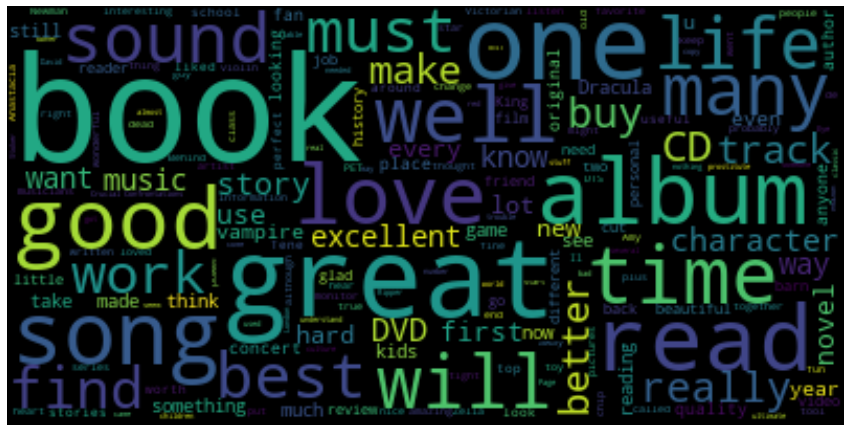

In [ ]:
# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='black').generate(positive_reviews)

# Display the generated wordcloud image
plt.figure(figsize=(15,12))
plt.imshow(cloud_positives, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [ ]:
import nltk


In [ ]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens

####**Étape 2 : Construire un vectoriseur**

+ Dans cet exercice, vous êtes invité à créer une transformation TfIDf de la colonne dans le jeu de données.

+ Il vous est demandé de spécifier les n-grammes, les mots d’arrêt, le modèle de jetons et la taille des arguments de vocabulaire.

      reviews.review

+ C’est la dernière étape avant de former un classificateur pour prédire le sentiment d’un avis.

+ Assurez-vous de spécifier correctement le nombre maximal de fonctionnalités, car une très grande taille de vocabulaire pourrait déconnecter votre session.

####**Instructions**

+ Importez le vectoriseur Tfidf et la liste par défaut des mots stop anglais.
+ Construisez le vectoriseur Tfidf, en spécifiant - dans cet ordre - les arguments suivants:

  + utilisez comme mots stop la liste par défaut des mots stop anglais;
    + comme n-grammes utilisent uni- et bi-grammes;
    + le nombre maximum de caractéristiques devrait être de 200; capturer uniquement les mots à l’aide du modèle spécifié.
+ Créez un DataFrame à l’aide du vectoriseur Tfidf.

In [ ]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)
# Create sparse matrix from the vectorizer
X = vect.transform(reviews.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

###**Étape 3 : Création d’un classificateur**

+ C’est la dernière étape de la prédiction de l’analyse des sentiments.
+ Nous avons exploré et enrichi notre ensemble de données avec des fonctionnalités liées au sentiment, et créé des vecteurs numériques à partir de celui-ci.

+ Vous utiliserez le jeu de données que vous avez créé dans les étapes précédentes.

+ À savoir, il contient une fonctionnalité pour la longueur des critiques, et 200 fonctionnalités créées avec le vectoriseur Tfidf.

+ Votre tâche consiste à entraîner une régression logistique pour prédire le sentiment.

+ Les données ont été importées pour vous et sont appelées.
+ La cible est appelée et est binaire : lorsque l’avis produit est positif et non.
      reviews_transformedscore10

+ Entraînez un modèle de régression logistique et évaluez ses performances sur les données de test.

+ Dans quelle mesure le modèle fonctionne-t-il bien?

+ Tous les packages requis ont été importés pour vous.

####**Instructions**

+ Effectuer le fractionnement train/test, en allouant 20 % des données aux tests et en définissant l’amorçage aléatoire sur .

      456
+ Entraînez un modèle de régression logistique.
+ Prédisez la classe.
+ Imprimez le score de précision et la matrice de confusion sur le jeu de test.



In [ ]:
# Define X and y
y = reviews_transformed.score
X = reviews_transformed.drop('score', axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))